# Í∏∞Î≥∏ ÏÑ∏ÌåÖ

In [ ]:
#! pip install gcsfs

In [ ]:
#! pip install koreanize_matplotlib

In [ ]:
#!pip install seaborn

In [40]:
#!pip install scikit-learn

In [ ]:

# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import os

# GCS ÌååÏùº Í≤ΩÎ°úÏóêÏÑú Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨
from google.cloud import storage
from google.oauth2 import service_account


# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
# Í∞ÄÏÑ§ Í≤ÄÏ†ï
from scipy.stats import chi2_contingency

In [3]:
# Pandas Î≥¥Í∏∞ ÏòµÏÖò
# pd.set_option('display.max_columns',100)
# pd.set_option('display.max_rows',100)

In [2]:

# Í∏∞Î≥∏ Ï†ïÎ≥¥ ÌôïÏù∏ Ìï®Ïàò 
def show_df_info(df, df_name):
    """
    DataFrameÏùò Í∏∞Î≥∏ Ï†ïÎ≥¥ÏôÄ ÌÜµÍ≥Ñ ÏöîÏïΩÏùÑ Ï∂úÎ†•ÌïòÎäî Ìï®Ïàò
    """
    print(f"\n{df_name} ÌòïÌÉú:")
    display(df.shape)
    print(f"\n{df_name} Ï≤´ 5Ìñâ:")
    display(df.head())
    print(f"\n{df_name} Ï†ïÎ≥¥:")
    df.info()
    print(f"\n{df_name} ÌÜµÍ≥Ñ ÏöîÏïΩ:")
    display(df.describe())
    print(f"\n{df_name} ÌÜµÍ≥Ñ ÏöîÏïΩ:")
    display(df.describe(include = 'O'))
    print(f"\n{df_name} Í≤∞Ï∏°Ïπò ÌôïÏù∏:")
    display(df.isnull().sum())
    # print(f"\n{df_name} Ï§ëÎ≥µÍ∞í ÌôïÏù∏:")
    # print(df.iloc[:,1:].duplicated().sum())

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ Î∞è ÌôïÏù∏

In [12]:
# Ïù∏Ï¶ù
key_path = "../config/codeit_project_vm_key.json"
credentials = service_account.Credentials.from_service_account_file(key_path)

# GCS ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏ ÏÉùÏÑ±
client = storage.Client(credentials=credentials)
bucket = client.bucket("part4_project")

# 'hackle/' Í≤ΩÎ°úÏóê ÏûàÎäî .parquet ÌååÏùº Î¶¨Ïä§Ìä∏ Í∞ÄÏ†∏Ïò§Í∏∞
blobs = bucket.list_blobs(prefix="hackle/")
hackle_file_list = [f"gs://part4_project/{blob.name}" for blob in blobs if blob.name.endswith(".parquet")]

# Í≤∞Í≥º ÌôïÏù∏
hackle_file_list

['gs://part4_project/hackle/device_properties.parquet',
 'gs://part4_project/hackle/final.parquet',
 'gs://part4_project/hackle/final_hackle.parquet',
 'gs://part4_project/hackle/hackle_events.parquet',
 'gs://part4_project/hackle/hackle_properties.parquet',
 'gs://part4_project/hackle/user_properties.parquet']

In [15]:
# ÌååÏùºÎì§ÏùÑ Í∞ÅÍ∞Å Î≥ÄÏàòÎ°ú Î∂àÎü¨Ïò§Í∏∞
# 'final'Ïù¥ ÌååÏùºÎ™ÖÏóê Ìè¨Ìï®ÎêòÏßÄ ÏïäÏùÄ ÌååÏùºÎßå ÌïÑÌÑ∞ÎßÅ
non_final_files = [title for title in hackle_file_list if 'final' not in title]

for title in non_final_files:
    # GCS Í≤ΩÎ°úÏóêÏÑú ÌååÏùºÎ™Ö Ï∂îÏ∂ú
    file_name = title.split('/')[-1].replace('.parquet', '')
    
    # Parquet ÌååÏùº ÏùΩÍ∏∞
    df = pd.read_parquet(title, storage_options={"token": key_path})
    
    # Í∞ÅÍ∞ÅÏùò Ïù¥Î¶Ñ_dfÎ°ú Ï†ÄÏû• (ex. device_properties_df)
    globals()[f"{file_name}_df"] = df
    
    # ÏÑ†ÌÉùÏ†ÅÏúºÎ°ú Ï∂úÎ†• ÌôïÏù∏
    print(f"{file_name}_df Î∂àÎü¨Ïò§Í∏∞ ÏôÑÎ£å, shape: {df.shape}")


device_properties_df Î∂àÎü¨Ïò§Í∏∞ ÏôÑÎ£å, shape: (252380, 4)
hackle_events_df Î∂àÎü¨Ïò§Í∏∞ ÏôÑÎ£å, shape: (11441319, 11)
hackle_properties_df Î∂àÎü¨Ïò§Í∏∞ ÏôÑÎ£å, shape: (525350, 8)
user_properties_df Î∂àÎü¨Ïò§Í∏∞ ÏôÑÎ£å, shape: (230819, 5)


# EDA

## 1. hackle_properties

|ÌÖåÏù¥Î∏îÎ™Ö|	Ïª¨ÎüºÎ™Ö	|Ïª¨Îüº ÏÑ§Î™Ö|
|-------|----------|--------|
|hackle_properties|	session_id|	ÏÑ∏ÏÖò ÏãùÎ≥ÑÏûê|
|		|user_id|	ÏÇ¨Ïö©Ïûê ID|
|		|language|	ÏÇ¨Ïö© Ïñ∏Ïñ¥|
|		|osname|	Ïö¥ÏòÅ Ï≤¥Ï†ú Ïù¥Î¶Ñ|
|		|osversion|	Ïö¥ÏòÅ Ï≤¥Ï†ú Î≤ÑÏ†Ñ|
|		|versionname|	Ïï± Î≤ÑÏ†Ñ Ïù¥Î¶Ñ|
|		|device_id|	Ïû•Ïπò ID|

In [27]:
show_df_info(hackle_properties_df, 'hackle_properties_df')


hackle_properties_df ÌòïÌÉú:


(525350, 8)


hackle_properties_df Ï≤´ 5Ìñâ:


id                            session_id  user_id language   osname  \
0   1          4OzYh3seq3VKytpSn5pvQkZNQii1             ko-KR      iOS   
1   2          8QXy31PQxbW9qLzq0Y1dhR8Ypm52  1046711    ko-KR      iOS   
2   3  6bcea65d-9f40-46fc-888c-700fe707483f  1545130       ko  Android   
3   4          XVYNT6zfhFWqIg9omwg2AHDjTLx2  1224793       ko  Android   
4   5          XFB2SPiGfjbVhvJ3Q3DBsaT3m2B3  1329450    ko-US      iOS   

  osversion versionname                             device_id  
0      16.0       2.0.0  590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74  
1    16.5.1       2.0.3  D5417226-F71B-4A9E-A180-CD072F2AB279  
2        13       2.0.5  6bcea65d-9f40-46fc-888c-700fe707483f  
3        13       2.0.5  a05c1595-3e05-434b-8684-218b528bd725  
4    16.5.1       2.0.5  EAC6C0B3-7CE8-40EA-8A91-9977C0BA5EF3


hackle_properties_df Ï†ïÎ≥¥:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525350 entries, 0 to 525349
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           525350 non-null  int64 
 1   session_id   525350 non-null  object
 2   user_id      525350 non-null  object
 3   language     525350 non-null  object
 4   osname       525350 non-null  object
 5   osversion    525350 non-null  object
 6   versionname  525350 non-null  object
 7   device_id    525350 non-null  object
dtypes: int64(1), object(7)
memory usage: 32.1+ MB

hackle_properties_df ÌÜµÍ≥Ñ ÏöîÏïΩ:


id
count  525350.000000
mean   262675.500000
std    151655.626297
min         1.000000
25%    131338.250000
50%    262675.500000
75%    394012.750000
max    525350.000000


hackle_properties_df ÌÜµÍ≥Ñ ÏöîÏïΩ:


session_id user_id language  osname  \
count                                 525350  525350   525350  525350   
unique                                253616  327381      151       2   
top     040914e1-61ac-40ef-b76a-718066d880dc            ko-KR     iOS   
freq                                       9   82255   340900  359479   

       osversion versionname                             device_id  
count     525350      525350                                525350  
unique        74          16                                251720  
top       16.5.1       2.0.5  040914e1-61ac-40ef-b76a-718066d880dc  
freq      218699      309644                                     9


hackle_properties_df Í≤∞Ï∏°Ïπò ÌôïÏù∏:


id             0
session_id     0
user_id        0
language       0
osname         0
osversion      0
versionname    0
device_id      0
dtype: int64

In [ ]:
# id Ïª¨Îüº Ï†úÏô∏ÌïòÍ≥† Ï§ëÎ≥µ ÌôïÏù∏ - ÏóÜÏùå
hackle_properties_df.iloc[:,1:].duplicated().sum()

0

In [28]:
# user_id Í∞Ä Í≥µÎ∞±??
hackle_properties_df[hackle_properties_df['user_id'] == ''].shape

(82255, 8)

- user_idÍ∞Ä Í≥µÎ∞±ÏúºÎ°ú ÏûÖÎ†•ÎêòÏñ¥ ÏûàÎäî Í≤ΩÏö∞ 82255 Í∞ú 
- Ìï¥Îãπ Í≤ΩÏö∞ 'unknown' ÏúºÎ°ú Î≥ÄÍ≤Ω

In [29]:
# user_idÏóê Í≥µÎ∞±Îßå ÏûÖÎ†•Îêú Í≤ΩÏö∞ 'unknown'ÏúºÎ°ú Î≥ÄÍ≤Ω
hackle_properties_df['user_id'] = hackle_properties_df['user_id'].apply(lambda x: 'unknown' if isinstance(x, str) and x.strip() == '' else x)
hackle_properties_df['user_id'].value_counts()

user_id
unknown    82255
1578652       17
1459833       13
1571506       13
1239584       12
           ...  
1085617        1
1499469        1
1075954        1
1021052        1
1043127        1
Name: count, Length: 327381, dtype: int64

- Í≥µÎ∞±Îßå unknownÏúºÎ°ú Î≥ÄÍ≤ΩÎêú Í≤É ÌôïÏù∏! (Í∞úÏàò ÎèôÏùºÌïòÍ≤å 82255Í∞ú)

In [41]:
# session_idÎßàÎã§ user_idÎäî Î™á Í∞ú? (hackle_eventsÏóêÏÑú session_idÎ•º user_idÏôÄ ÎèôÏùº Ï∑®Í∏â Í∞ÄÎä•ÌïúÍ∞Ä?)
session_user_cnt_df = hackle_properties_df.groupby('session_id')['user_id'].nunique().reset_index(name = 'user_id_count').sort_values(by ='user_id_count', ascending = False)
session_user_cnt_df

session_id  user_id_count
1129    040914e1-61ac-40ef-b76a-718066d880dc              6
3209    0CC53548-EB9A-4AE5-A72E-5D765B3BB1F9              4
75081   B941F9F9-CF53-4DAE-A204-75E666B5D277              4
14354   23235867-49A8-4240-8B34-6342357440F9              4
56337   87046FBA-B84B-4124-ADE9-EA03DF95E7B8              4
...                                      ...            ...
56361   871DDDB5-20CC-4076-8CEC-A5087B69C72A              1
161330          ZRKVAinfU8NVuLTBKnlrsT7P9453              1
161329          ZRJnnLID7XUiXzlNnQEXywhpNWl2              1
56362   871E5518-6794-43AD-923F-2465934E709F              1
0       000137bc-80de-4bb5-b61d-df7f217a4501              1

[253616 rows x 2 columns]

In [45]:
print(session_user_cnt_df['user_id_count'].value_counts())
print(session_user_cnt_df['user_id_count'].value_counts(normalize = True))

user_id_count
2    148802
1    101802
3      3007
4         4
6         1
Name: count, dtype: int64
user_id_count
2    0.586722
1    0.401402
3    0.011857
4    0.000016
6    0.000004
Name: proportion, dtype: float64


In [40]:
# user_idÎßàÎã§ session_idÎäî Î™á Í∞ú? (hackle_eventsÏóêÏÑú session_idÎ•º user_idÏôÄ ÎèôÏùº Ï∑®Í∏â Í∞ÄÎä•ÌïúÍ∞Ä?)
user_session_cnt_df = hackle_properties_df.groupby('user_id')['session_id'].nunique().reset_index(name='session_id_count').sort_values(by='session_id_count', ascending=False)
user_session_cnt_df

user_id  session_id_count
319303                       unknown             78197
158764                       1459833                13
195272                       1578652                13
192533                       1571506                13
210229                        855879                12
...                              ...               ...
109620                       1302497                 1
109619                       1302488                 1
109618                       1302487                 1
109617                       1302485                 1
327380  zzzYYwN42NdbhcyXHgyeAxyNH7J2                 1

[327381 rows x 2 columns]

- user_id ÌòïÌÉúÍ∞Ä Îã§Î•∏ Ïà´ÏûêÌòï(ÏúºÎ°ú Î≥¥Ïù¥ÏßÄÎßå object)Í≥ºÎäî Îã§Î•¥Í≤å zzzYYwN42NdbhcyXHgyeAxyNH7J2 ÏôÄ Í∞ôÏùÄÍ≤å ÏûàÏùå...!

In [44]:
print(user_session_cnt_df['session_id_count'].value_counts())
print(user_session_cnt_df['session_id_count'].value_counts(normalize = True))

session_id_count
1        325065
2          2062
3           146
4            44
5            19
6            15
7             8
8             7
9             5
13            3
12            3
11            2
78197         1
10            1
Name: count, dtype: int64
session_id_count
1        0.992926
2        0.006298
3        0.000446
4        0.000134
5        0.000058
6        0.000046
7        0.000024
8        0.000021
9        0.000015
13       0.000009
12       0.000009
11       0.000006
78197    0.000003
10       0.000003
Name: proportion, dtype: float64


In [118]:
# ÏÉòÌîå ÏïÑÎ¨¥Í±∞ÎÇò ÌôïÏù∏ 
hackle_properties_df[hackle_properties_df['user_id'].apply(len) > 7]['user_id'].nunique()

96527

- user_idÍ∞Ä ÎààÏúºÎ°ú Î≥¥Í∏∞ÏóêÎèÑ Ï∞ê Î¨∏ÏûêÏó¥Ïù∏ Í≤ÉÎì§Ïù¥ ÏûàÏùå 
- session_idÏôÄ user_idÍ∞Ä Í∞ôÏùÄ Í≤ΩÏö∞ÎèÑ ÏûàÏùå

In [ ]:
96527 / 327381 * 100 # ÏïΩ 30%Í∞Ä ÌóàÏàò ? 

29.484606620420855

In [32]:
# Ìïú user_idÏóê session_id Í∞ØÏàò 13Í∞úÏù∏ Í≤É ÏÉòÌîå ÌôïÏù∏ 
hackle_properties_df[hackle_properties_df['user_id'] == '1459833']

id                            session_id  user_id language osname  \
2255      2256  E7291C7D-54D9-459B-B93D-EB3DB0B5EB54  1459833    ko-KR    iOS   
24115    24116  EF35B630-C9C9-4CEF-B70A-C5EB2703C17F  1459833    ko-KR    iOS   
30217    30218  3CF3AF75-ECF6-4A07-A4F3-66EE0D114428  1459833    ko-KR    iOS   
61146    61147  91AC528E-4CE9-4E3E-9283-98DD3F0E40C1  1459833    ko-KR    iOS   
64455    64456  4BC78F41-A9F2-400E-AEC6-1C9449163BC2  1459833    ko-KR    iOS   
106580  106581  09BE6E5A-527E-4B50-AD7F-AC1680BD569D  1459833    ko-KR    iOS   
109773  109774  44A0482C-3668-432A-A367-6545D06EE753  1459833    ko-KR    iOS   
129211  129212  9C58E582-94AB-40E4-A77F-6044F43322E1  1459833    ko-KR    iOS   
160205  160206  09D832EA-FAEF-460D-9612-62B8795EC54F  1459833    ko-KR    iOS   
162316  162317  7033EC1F-1684-4887-8204-092EBEC2253A  1459833    ko-KR    iOS   
207145  207146  C5579B1B-4C43-4533-A41C-35A703DC0686  1459833    ko-KR    iOS   
226658  226659  8D43E3FC-37C9-4C9C-8BC9-6FF620D3638E  1459833    ko-KR    iOS   
255528  255529  D0E9E79F-BD36-48D6-A719-559C4E06C8A6  1459833    ko-KR    iOS   

       osversion versionname                             device_id  
2255      16.3.1       2.0.5  E7291C7D-54D9-459B-B93D-EB3DB0B5EB54  
24115     16.3.1       2.0.5  EF35B630-C9C9-4CEF-B70A-C5EB2703C17F  
30217     16.3.1       2.0.5  3CF3AF75-ECF6-4A07-A4F3-66EE0D114428  
61146     16.3.1       2.0.5  91AC528E-4CE9-4E3E-9283-98DD3F0E40C1  
64455     16.3.1       2.0.3  4BC78F41-A9F2-400E-AEC6-1C9449163BC2  
106580    16.3.1       2.0.5  09BE6E5A-527E-4B50-AD7F-AC1680BD569D  
109773    16.3.1       2.0.5  44A0482C-3668-432A-A367-6545D06EE753  
129211    16.3.1       2.0.5  9C58E582-94AB-40E4-A77F-6044F43322E1  
160205    16.3.1       2.0.5  09D832EA-FAEF-460D-9612-62B8795EC54F  
162316    16.3.1       2.0.3  7033EC1F-1684-4887-8204-092EBEC2253A  
207145    16.3.1       2.0.5  C5579B1B-4C43-4533-A41C-35A703DC0686  
226658    16.3.1       2.0.5  8D43E3FC-37C9-4C9C-8BC9-6FF620D3638E  
255528    16.3.1       2.0.5  D0E9E79F-BD36-48D6-A719-559C4E06C8A6

- Î≠êÏßÄ...? ÏïÑÍπå ÌôîÎ©¥ Í≥µÏú†Î°ú Î¥§ÏùÑ Îïå user_idÏóê session_idÎèÑ Îã§ 1Í∞úÏî© Ïù¥ÏóàÎçò Í±∞ Í∞ôÏùÄÎç∞?
- Í∑∏Î†áÎã§Î©¥ hackle_events ÌÖåÏù¥Î∏îÏóêÏÑú session_idÎ•º user_idÎ°ú Î¥êÎèÑ ÎêòÎäîÍ≤å ÎßûÎÇò..?

In [1]:
## Ïó¨Í∏∞ÏÑú Ï≤òÎ¶¨ÌïòÍ≥† hackle_evnetsÏôÄ merge???
'''
python
# user_idÍ∞Ä ''Ïù∏ Í≤ΩÏö∞Îäî Í≤∞Ï∏°ÏπòÎ°ú Ï≤òÎ¶¨
df['user_id'] = df['user_id'].replace('', pd.NA)

# ÎèôÏùºÌïú session_id + device_id Ï°∞Ìï©ÏúºÎ°ú user_idÍ∞Ä ÏûàÎäî Í∞í Ï∂îÏ∂ú
lookup = (
    df[df['user_id'].notna()]
    .groupby(['session_id', 'device_id'])['user_id']
    .first()
    .reset_index()
)

# ÏõêÎûò dfÏóê joinÌï¥ÏÑú Îπà user_id Ï±ÑÏö∞Í∏∞
df = df.merge(lookup, on=['session_id', 'device_id'], how='left', suffixes=('', '_fill'))

# user_idÍ∞Ä ÎπÑÏñ¥ÏûàÎçò Í≤ΩÏö∞ÏóêÎßå fillÎêú Í∞íÏúºÎ°ú ÎåÄÏ≤¥
df['user_id'] = df['user_id'].combine_first(df['user_id_fill'])

# Î≥¥Ï°∞ Ïª¨Îüº ÏÇ≠Ï†ú
df.drop(columns=['user_id_fill'], inplace=True)
print(df.isnull().sum())
'''

"\npython\n# user_idÍ∞Ä ''Ïù∏ Í≤ΩÏö∞Îäî Í≤∞Ï∏°ÏπòÎ°ú Ï≤òÎ¶¨\ndf['user_id'] = df['user_id'].replace('', pd.NA)\n\n# ÎèôÏùºÌïú session_id + device_id Ï°∞Ìï©ÏúºÎ°ú user_idÍ∞Ä ÏûàÎäî Í∞í Ï∂îÏ∂ú\nlookup = (\n    df[df['user_id'].notna()]\n    .groupby(['session_id', 'device_id'])['user_id']\n    .first()\n    .reset_index()\n)\n\n# ÏõêÎûò dfÏóê joinÌï¥ÏÑú Îπà user_id Ï±ÑÏö∞Í∏∞\ndf = df.merge(lookup, on=['session_id', 'device_id'], how='left', suffixes=('', '_fill'))\n\n# user_idÍ∞Ä ÎπÑÏñ¥ÏûàÎçò Í≤ΩÏö∞ÏóêÎßå fillÎêú Í∞íÏúºÎ°ú ÎåÄÏ≤¥\ndf['user_id'] = df['user_id'].combine_first(df['user_id_fill'])\n\n# Î≥¥Ï°∞ Ïª¨Îüº ÏÇ≠Ï†ú\ndf.drop(columns=['user_id_fill'], inplace=True)\nprint(df.isnull().sum())\n"

### user_id & session_id ÌôïÏù∏ : 
- ÏÇ¨Ïö©ÏûêÏùò OS Î≤ÑÏ†Ñ(os_version)Ïù¥ Î∞îÎÄåÎ©¥ session_idÎèÑ Î∞îÎÄåÎäîÍ∞Ä?

In [33]:
hackle_properties_df.head()

id                            session_id  user_id language   osname  \
0   1          4OzYh3seq3VKytpSn5pvQkZNQii1  unknown    ko-KR      iOS   
1   2          8QXy31PQxbW9qLzq0Y1dhR8Ypm52  1046711    ko-KR      iOS   
2   3  6bcea65d-9f40-46fc-888c-700fe707483f  1545130       ko  Android   
3   4          XVYNT6zfhFWqIg9omwg2AHDjTLx2  1224793       ko  Android   
4   5          XFB2SPiGfjbVhvJ3Q3DBsaT3m2B3  1329450    ko-US      iOS   

  osversion versionname                             device_id  
0      16.0       2.0.0  590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74  
1    16.5.1       2.0.3  D5417226-F71B-4A9E-A180-CD072F2AB279  
2        13       2.0.5  6bcea65d-9f40-46fc-888c-700fe707483f  
3        13       2.0.5  a05c1595-3e05-434b-8684-218b528bd725  
4    16.5.1       2.0.5  EAC6C0B3-7CE8-40EA-8A91-9977C0BA5EF3

In [34]:
# id Ïª¨Îüº Ï†úÏô∏ÌïòÍ≥† Ï§ëÎ≥µ ÌôïÏù∏ - ÏóÜÏùå
hackle_properties_df.iloc[:,1:].duplicated().sum()

0

In [63]:
# user_idÎ≥ÑÎ°ú ÌñâÏù¥ 2Í∞ú Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞ ÌïÑÌÑ∞
# 1. user_idÎ≥Ñ row Ïàò Í≥ÑÏÇ∞
user_counts = df_not_sorted['user_id'].value_counts()

# 2. 2Í∞ú Ïù¥ÏÉÅÏù∏ userÎßå ÌïÑÌÑ∞ÎßÅ
multi_user_ids = user_counts[user_counts >= 2].index

# 3. Ìï¥Îãπ userÎßå ÌïÑÌÑ∞ÎßÅ
target_df = hackle_properties_df[hackle_properties_df['user_id'].isin(multi_user_ids)].copy()

In [65]:
# groupby ÌõÑ shiftÎ•º ÏÇ¨Ïö©Ìï¥ÏÑú Ïù¥Ï†Ñ Í∞íÍ≥º ÎπÑÍµê
target_df['prev_osversion'] = target_df.groupby('user_id')['osversion'].shift(1)
target_df['prev_session_id'] = target_df.groupby('user_id')['session_id'].shift(1)

# osversionÏù¥ Î∞îÎÄê Í≤ΩÏö∞
target_df['osversion_changed'] = target_df['osversion'] != target_df['prev_osversion']

# session_idÎèÑ Î∞îÎÄê Í≤ΩÏö∞
target_df['session_id_changed'] = target_df['session_id'] != target_df['prev_session_id']

# Îëò Îã§ Î∞îÎÄê Í≤ΩÏö∞
target_df['both_changed'] = target_df['osversion_changed'] & target_df['session_id_changed']

target_df.head()

id                            session_id  user_id language   osname  \
0   1          4OzYh3seq3VKytpSn5pvQkZNQii1  unknown    ko-KR      iOS   
1   2          8QXy31PQxbW9qLzq0Y1dhR8Ypm52  1046711    ko-KR      iOS   
6   7  d2b3ca43-4716-4852-b0e2-334848eb66f4  1018001       ko  Android   
7   8  414540BA-1980-4371-BF37-5BFA71158C4D  1475326    ko-KR      iOS   
9  10  94860349-d46f-4e98-8505-e96877376cee  1537177       ko  Android   

  osversion versionname                             device_id prev_osversion  \
0      16.0       2.0.0  590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74            NaN   
1    16.5.1       2.0.3  D5417226-F71B-4A9E-A180-CD072F2AB279            NaN   
6        13       2.0.5  d2b3ca43-4716-4852-b0e2-334848eb66f4            NaN   
7    16.5.1       2.0.5  414540BA-1980-4371-BF37-5BFA71158C4D            NaN   
9        13       2.0.3  94860349-d46f-4e98-8505-e96877376cee            NaN   

  prev_session_id  osversion_changed  session_id_changed  both_changed  
0             NaN               True                True          True  
1             NaN               True                True          True  
6             NaN               True                True          True  
7             NaN               True                True          True  
9             NaN               True                True          True

In [67]:
# osversion Î≥ÄÍ≤ΩÏù¥ ÏûàÏóàÎçò rowÎßå Ï∂îÏ∂ú
df_multi_with_change = target_df[target_df['osversion_changed']]

# ÌïÑÏöîÌïú Ïª¨ÎüºÎßå Î≥¥Í∏∞ Ï¢ãÍ≤å Ï†ïÎ¶¨
result = df_multi_with_change[[
    'user_id', 'osversion', 'prev_osversion', 'session_id', 'prev_session_id', 'osversion_changed','session_id_changed','both_changed'
]]

result

user_id osversion prev_osversion  \
0       unknown      16.0            NaN   
1       1046711    16.5.1            NaN   
6       1018001        13            NaN   
7       1475326    16.5.1            NaN   
9       1537177        13            NaN   
...         ...       ...            ...   
525316  unknown      16.3             13   
525317  1424487    16.5.1           16.6   
525319  unknown    16.5.1           16.3   
525336  unknown      16.1         16.5.1   
525347  unknown    16.3.1           16.1   

                                  session_id  \
0               4OzYh3seq3VKytpSn5pvQkZNQii1   
1               8QXy31PQxbW9qLzq0Y1dhR8Ypm52   
6       d2b3ca43-4716-4852-b0e2-334848eb66f4   
7       414540BA-1980-4371-BF37-5BFA71158C4D   
9       94860349-d46f-4e98-8505-e96877376cee   
...                                      ...   
525316  C59904D1-2B1A-4B3A-8318-B00B69C55045   
525317          FjYimz1xTmZjMQmL1HGdifT8Ct53   
525319  1A54B0B9-5FEC-4999-B51B-7349F6B14FB6   
525336          IZUKxswvnIWkNW1JzNE7gBZJGiy2   
525347  F9EA195C-862F-4572-80A5-C3AE06F83310   

                             prev_session_id  osversion_changed  \
0                                        NaN               True   
1                                        NaN               True   
6                                        NaN               True   
7                                        NaN               True   
9                                        NaN               True   
...                                      ...                ...   
525316  ded338e7-ee48-47b9-aa0f-767d18e6b2f1               True   
525317          FjYimz1xTmZjMQmL1HGdifT8Ct53               True   
525319  C59904D1-2B1A-4B3A-8318-B00B69C55045               True   
525336  D02C5530-AC9F-46F4-A2A2-D0B3DFB62C01               True   
525347          IZUKxswvnIWkNW1JzNE7gBZJGiy2               True   

        session_id_changed  both_changed  
0                     True          True  
1                     True          True  
6                     True          True  
7                     True          True  
9                     True          True  
...                    ...           ...  
525316                True          True  
525317               False         False  
525319                True          True  
525336                True          True  
525347                True          True  

[177541 rows x 8 columns]

In [115]:
result.describe()

user_id osversion prev_osversion                    session_id  \
count    177541    177541          82339                        177541   
unique    95202        73             71                        141863   
top     unknown    16.5.1         16.5.1  vheiXNIAkbRNz8OPRfItfkKxm1A2   
freq      63520     65269          28960                             8   

                     prev_session_id osversion_changed session_id_changed  \
count                          82339            177541             177541   
unique                         74532                 1                  2   
top     vheiXNIAkbRNz8OPRfItfkKxm1A2              True               True   
freq                               6            177541             159889   

       both_changed  
count        177541  
unique            2  
top            True  
freq         159889

In [ ]:
result['user_id'].nunique() # 95202 Ïú†Ï†ÄÍ∞Ä os version Î≥ÄÌôî ÏûàÏóàÏùå

95202

In [ ]:
# 177541Í∞úÏùò os_version Î≥ÄÌôî Ï§ë 159889Í∞úÎßå session_idÎèÑ Î≥ÄÌôîÌï®

In [ ]:
159889 / 177541 * 100 # ÏïΩ 90% Ìñâ 

90.05750784325875

In [ ]:
target_df['both_changed'].value_counts() 

both_changed
True     159889
False    133282
Name: count, dtype: int64

In [74]:
# osversion, session_idÏùò Ïú†ÏùºÌïú Í∞úÏàòÎ•º user_idÎ≥ÑÎ°ú ÏÑ∏Í∏∞
check_df = (
    hackle_properties_df
    .groupby('user_id')
    .agg(
        osversion_nunique=('osversion', 'nunique'),
        session_id_nunique=('session_id', 'nunique'),
        count=('user_id', 'count')
    )
    .reset_index()
)

# osversionÏù¥ 2Í∞ú Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞ (Ï¶â, Î≥ÄÌôîÍ∞Ä ÏûàÏóàÎçò Ïú†Ï†Ä)
check_df['osversion_changed'] = check_df['osversion_nunique'] > 1

# session_idÎèÑ Î∞îÎÄåÏóàÎäîÏßÄ Ïó¨Î∂Ä
check_df['session_changed'] = check_df['session_id_nunique'] > 1

# Îëò Îã§ Î∞îÎÄê Í≤ΩÏö∞
check_df['both_changed'] = check_df['osversion_changed'] & check_df['session_changed']

check_df


user_id  osversion_nunique  session_id_nunique  \
0       001zjRPEGWWVou4CbhLU7JQ9K9W2                  1                   1   
1       002KHtytQcVvLzOzvprOv0sxVTM2                  1                   1   
2       002r3iOqdkTogNK959c80mHZpIz2                  1                   1   
3       008tC2rC0BaMMbCssEPu71R8kGm1                  1                   1   
4       008z44k3maMuxmjuEes7csnOpei2                  1                   1   
...                              ...                ...                 ...   
327376  zzggGjI3IrcP5CslbG9WlzgouC42                  1                   1   
327377  zzmejla6kTSFw2iDl00M44BPRMb2                  1                   1   
327378  zzmuHNWHEdfyEezUX9zbngaerZC3                  1                   1   
327379  zzzPTZp5ttgt5M0gs6R5B4NNKbC3                  1                   1   
327380  zzzYYwN42NdbhcyXHgyeAxyNH7J2                  1                   1   

        count  osversion_changed  session_changed  both_changed  
0           1              False            False         False  
1           1              False            False         False  
2           1              False            False         False  
3           1              False            False         False  
4           1              False            False         False  
...       ...                ...              ...           ...  
327376      1              False            False         False  
327377      2              False            False         False  
327378      1              False            False         False  
327379      1              False            False         False  
327380      1              False            False         False  

[327381 rows x 7 columns]

In [ ]:
check_df['user_id'].nunique() # 327381Ïùò Ïú†Ï†Ä 

327381

In [ ]:
check_df[check_df['both_changed'] == True]['user_id'].nunique() # 927Ïú†Ï†ÄÎßå os, session Î≥ÄÌôî Î™®Îëê Í≤™Ïùå 

927

In [ ]:
check_df['osversion_changed'].value_counts() # 311993ÏùÄ os Î≥ÄÌôî ÏóÜÏùå 

osversion_changed
False    311993
True      15388
Name: count, dtype: int64

In [96]:
check_df['session_changed'].value_counts()

session_changed
False    325065
True       2316
Name: count, dtype: int64

In [ ]:
check_df[(check_df['osversion_changed']) & (~check_df['session_changed'])]['user_id'].nunique() # 14461 Ïú†Ï†ÄÎäî os Î≥ÄÌôîÎßå 


14461

In [ ]:
15388 / 327381 * 100 # Ï†ÑÏ≤¥ Ïú†Ï†Ä Ï§ë 4.7%Îßå Î≥ÄÌôî Ï°¥Ïû¨

4.70033386176962

In [ ]:
print(927 / 327381 * 100)
print(927 / 15388 * 100) #os Î≥ÄÌôîÍ∞Ä ÏûàÎäî Ïú†Ï†Ä Ï§ë 6%Îäî session_idÎèÑ Î≥ÄÌï®

0.28315632244998945
6.024174681570055


In [ ]:
print(14461 / 327381 * 100)
print(14461 / 15388 * 100) # os Î≥ÄÌôîÍ∞Ä ÏûàÎçò Í±∞ Ï§ëÏóêÎäî 94% Ï†ïÎèÑÎäî sessionÏùÄ Ïïà Î≥ÄÌï® 

4.41717753931963
93.97582531842995


## 2. device_properties

| # |      ÌÖåÏù¥Î∏îÎ™Ö     |     Ïª¨ÎüºÎ™Ö    |  Ïª¨Îüº ÏÑ§Î™Ö  |
|:-:|:-----------------:|:-------------:|:-----------:|
| 2 | device_properties | device_id     | Ïû•Ïπò ID     |
|   |                   | device_model  | Ïû•Ïπò Î™®Îç∏Î™Ö |
|   |                   | device_vendor | Ïû•Ïπò Ï†úÏ°∞ÏÇ¨ |

In [82]:
show_df_info(device_properties_df, 'device_properties_df')


device_properties_df ÌòïÌÉú:


(252380, 4)


device_properties_df Ï≤´ 5Ìñâ:


id                             device_id device_model device_vendor
0   1  000007C9-E103-4EB5-9777-A9084D4952DF   iPhone14,7         Apple
1   2  00002245-458F-4CDD-8533-B448CD43DBD2   iPhone14,7         Apple
2   3  00012620-313A-4502-9F8D-8DAB7443215B   iPhone14,5         Apple
3   4  000137bc-80de-4bb5-b61d-df7f217a4501     SM-F711N       samsung
4   5  000227D6-B782-4367-91C4-486B76DF9E37   iPhone12,3         Apple


device_properties_df Ï†ïÎ≥¥:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252380 entries, 0 to 252379
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             252380 non-null  int64 
 1   device_id      252380 non-null  object
 2   device_model   252380 non-null  object
 3   device_vendor  252380 non-null  object
dtypes: int64(1), object(3)
memory usage: 7.7+ MB

device_properties_df ÌÜµÍ≥Ñ ÏöîÏïΩ:


id
count  252380.000000
mean   126190.500000
std     72855.974806
min         1.000000
25%     63095.750000
50%    126190.500000
75%    189285.250000
max    252380.000000


device_properties_df ÌÜµÍ≥Ñ ÏöîÏïΩ:


device_id device_model device_vendor
count                                 252380       252380        252380
unique                                251720          522            36
top     5dab2e2f-54fd-4c4d-9996-1cccfa6c7428   iPhone14,5         Apple
freq                                       2        27656        174444


device_properties_df Í≤∞Ï∏°Ïπò ÌôïÏù∏:


id               0
device_id        0
device_model     0
device_vendor    0
dtype: int64

In [83]:
# id Ïª¨Îüº Ï†úÏô∏ÌïòÍ≥† Ï§ëÎ≥µ ÌôïÏù∏ - ÏóÜÏùå
device_properties_df.iloc[:,1:].duplicated().sum()

0

In [ ]:
# Ï†úÏ°∞ÏÇ¨Î≥Ñ Í∞ØÏàò ÌôïÏù∏ 
device_properties_df['device_vendor'].value_counts()

device_vendor
Apple            174444
samsung           75887
LGE                1578
Xiaomi              284
OnePlus              49
Google               31
LENOVO               24
Chinoe               19
FYD                   7
motorola              6
Lenovo                5
Nothing               4
Samsung               4
HUAWEI                3
Amazon                3
ZTE                   3
vivo                  3
blackshark            3
Sony                  2
APEX                  2
Teclast               2
incar                 2
asus                  2
Shanling              1
E-dong                1
IMUZ                  1
HXY                   1
Razer                 1
realme                1
Alldocube             1
Teclast_korea         1
bnd                   1
Digital               1
vsmart                1
Foxconn               1
iMUZ                  1
Name: count, dtype: int64

- AppleÏù¥ Ï†úÏùº ÎßéÏùå
- Í∑∏ Îã§Ïùå samsung, Samsung 
- Ï†úÏ°∞ÏÇ¨Í∞Ä 'nothing' Ïù∏ Í≤ΩÏö∞ 4Í∞ú ÏûàÏùå 

## 3. hackle_events

| # |    ÌÖåÏù¥Î∏îÎ™Ö   |     Ïª¨ÎüºÎ™Ö     |        Ïª¨Îüº ÏÑ§Î™Ö        |
|:-:|:-------------:|:--------------:|:-----------------------:|
| 3 | hackle_events | event_id       | Í≥†Ïú† Ïù¥Î≤§Ìä∏ ID          |
|   |               | event_datetime | Ïù¥Î≤§Ìä∏ Î∞úÏÉù ÏãúÍ∞Ñ        |
|   |               | event_key      | Ïù¥Î≤§Ìä∏ ÌÇ§               |
|   |               | session_id     | ÏÑ∏ÏÖò ID                 |
|   |               | item_name      | Ïù¥Î≤§Ìä∏ Í¥ÄÎ†® ÏïÑÏù¥ÌÖú Ïù¥Î¶Ñ |
|   |               | page_name      | Ïù¥Î≤§Ìä∏ Î∞úÏÉù ÌéòÏù¥ÏßÄ Ïù¥Î¶Ñ |
|   |               | friend_count   | ÏπúÍµ¨ Ïàò                 |
|   |               | votes_count    | Î∞õÏùÄ Ìà¨Ìëú Ïàò            |
|   |               | heart_balance  | ÏûîÏó¨ ÌïòÌä∏               |
|   |               | question_id    | Í≥†Ïú† ÏßàÎ¨∏ ID            |

In [5]:
show_df_info(hackle_events_df, 'hackle_events_df')


hackle_events_df ÌòïÌÉú:


(11441319, 11)


hackle_events_df Ï≤´ 5Ìñâ:


event_id      event_datetime  \
0  00000533-3f1c-4b3b-81f1-0c8f35754b4e 2023-07-18 19:40:17   
1  00000716-27e9-4e72-a602-d0ce61784b06 2023-07-18 21:07:24   
2  000007c8-68ce-40e6-9b1e-f0e34e8ff9cc 2023-08-06 20:18:03   
3  00000981-5e2a-4111-993e-4f1891ad9a53 2023-08-05 01:46:10   
4  00000a7a-ba72-4332-b4a9-7910670aaeb2 2023-07-24 15:03:37   

                         event_key                            session_id  \
0                   $session_start          4OzYh3seq3VKytpSn5pvQkZNQii1   
1              click_question_open          8QXy31PQxbW9qLzq0Y1dhR8Ypm52   
2  click_bottom_navigation_profile  6bcea65d-9f40-46fc-888c-700fe707483f   
3                        view_shop          XVYNT6zfhFWqIg9omwg2AHDjTLx2   
4      click_bottom_navigation_lab          XFB2SPiGfjbVhvJ3Q3DBsaT3m2B3   

                                     id item_name page_name  friend_count  \
0  00000533-3f1c-4b3b-81f1-0c8f35754b4e                               NaN   
1  00000716-27e9-4e72-a602-d0ce61784b06                              64.0   
2  000007c8-68ce-40e6-9b1e-f0e34e8ff9cc                              26.0   
3  00000981-5e2a-4111-993e-4f1891ad9a53                              61.0   
4  00000a7a-ba72-4332-b4a9-7910670aaeb2                             119.0   

   votes_count  heart_balance  question_id  
0          NaN            NaN          NaN  
1        436.0         4830.0          NaN  
2        174.0         4729.0          NaN  
3         44.0          142.0          NaN  
4        545.0         3287.0          NaN


hackle_events_df Ï†ïÎ≥¥:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11441319 entries, 0 to 11441318
Data columns (total 11 columns):
 #   Column          Dtype         
---  ------          -----         
 0   event_id        object        
 1   event_datetime  datetime64[ms]
 2   event_key       object        
 3   session_id      object        
 4   id              object        
 5   item_name       object        
 6   page_name       object        
 7   friend_count    float64       
 8   votes_count     float64       
 9   heart_balance   float64       
 10  question_id     float64       
dtypes: datetime64[ms](1), float64(4), object(6)
memory usage: 960.2+ MB

hackle_events_df ÌÜµÍ≥Ñ ÏöîÏïΩ:


event_datetime  friend_count   votes_count  heart_balance  \
count                    11441319  1.068876e+07  1.068676e+07   1.071268e+07   
mean   2023-07-29 01:58:17.236000  5.434357e+01  2.572742e+02   1.626929e+04   
min           2023-07-18 00:00:00  0.000000e+00  0.000000e+00   0.000000e+00   
25%           2023-07-22 21:31:17  3.200000e+01  9.700000e+01   4.340000e+02   
50%           2023-07-28 17:08:58  4.900000e+01  2.100000e+02   1.249000e+03   
75%           2023-08-04 17:59:10  7.100000e+01  3.620000e+02   3.188000e+03   
max           2023-08-10 23:59:59  1.365000e+03  3.017000e+03   8.849998e+08   
std                           NaN  3.350798e+01  2.180682e+02   3.317340e+06   

         question_id  
count  449484.000000  
mean     2766.385262  
min        99.000000  
25%      1393.000000  
50%      2569.000000  
75%      4459.000000  
max      5133.000000  
std      1599.967343


hackle_events_df ÌÜµÍ≥Ñ ÏöîÏïΩ:


event_id     event_key  \
count                               11441319      11441319   
unique                              11441319            44   
top     00000533-3f1c-4b3b-81f1-0c8f35754b4e  view_lab_tap   
freq                                       1       1266665   

                                  session_id  \
count                               11441319   
unique                                253616   
top     A40CA2FA-CEB6-4E94-857D-7C229ECC2598   
freq                                    8157   

                                          id item_name page_name  
count                               11441319  11441319  11441319  
unique                              11441319         6        13  
top     00000533-3f1c-4b3b-81f1-0c8f35754b4e                      
freq                                       1  11428280  10652540


hackle_events_df Í≤∞Ï∏°Ïπò ÌôïÏù∏:


event_id                 0
event_datetime           0
event_key                0
session_id               0
id                       0
item_name                0
page_name                0
friend_count        752556
votes_count         754554
heart_balance       728643
question_id       10991835
dtype: int64

In [86]:
# event_idÏôÄ idÍ∞Ä Í∞ôÏùÄ Í±¥Í∞Ä?
hackle_events_df[hackle_events_df['event_id'] == hackle_events_df['id']].shape 

(11441319, 11)

- event_idÎäî idÏôÄ Í∞ôÏùå!!

In [87]:
# hackle_propertiesÏùò session_id Í≥†Ïú†Í∞í Í∞úÏàòÏôÄ hackle_eventsÏùò session_id Í≥†Ïú†Í∞í Í∞úÏàòÍ∞Ä 253616Í∞úÎ°ú ÎèôÏùºÌï®
# session_id Î¶¨Ïä§Ìä∏ÎèÑ Í∞ôÏùÄÏßÄ ÎπÑÍµê!
set(hackle_properties_df['session_id'].unique()) == set(hackle_events_df['session_id'].unique())

True

- hackle_propertiesÏùò session_idÏôÄ hackle_eventsÏùò session_idÎäî ÎèôÏùºÌï®!!

In [5]:
# hackle_events_df event_datetime Í∏∞Ï§Ä Ïò§Î¶ÑÏ∞®Ïàú Ï†ïÎ†¨
hackle_events_df = hackle_events_df.sort_values(by='event_datetime').reset_index(drop=True)

In [5]:
# Í∞ÄÏû• ÎßéÏù¥ Îì±Ïû•Ìïú session_id ÌôïÏù∏
hackle_events_df[hackle_events_df['session_id'] == 'A40CA2FA-CEB6-4E94-857D-7C229ECC2598'].head(50)

event_id      event_datetime  \
383    00023b13-c39b-4813-aa14-3517839d86dd 2023-07-26 14:33:37   
666    0003e4ee-74bc-48d2-9f8a-b91af7103fb1 2023-07-25 01:05:52   
4980   001d46ad-785f-442e-9b45-9b41b7423e33 2023-07-25 01:20:49   
6267   0024bef1-1588-49f8-b008-335b4374841a 2023-07-24 16:06:37   
8782   003300bd-f7ac-4efc-9a39-b28ddc4e6815 2023-07-26 14:33:55   
8841   003353ac-ca75-4278-b088-b6be269aa0c2 2023-07-25 01:08:09   
13303  004d168b-b448-45ec-9775-7cd2af964e6f 2023-07-24 23:49:18   
15785  005b4e71-f136-4626-af52-8f2c158464b3 2023-07-24 14:11:39   
16605  00600805-b8a5-4522-94c3-889eb2527b4e 2023-07-24 13:53:57   
17523  00654ad7-20da-4564-850b-b3933e7f7424 2023-07-24 15:00:11   
18360  006a3962-28b8-49ee-a3eb-f90b45310851 2023-07-24 23:52:00   
20483  0076ec78-284a-47d2-992e-75cb04fc05a5 2023-07-25 01:23:29   
20814  00788f5d-c073-4baf-a418-41bd273850f5 2023-07-24 18:03:37   
22917  0084dc12-3618-41ff-a4fc-60e6c9d41ad4 2023-07-25 01:08:24   
24739  008f42e0-42a8-4536-8503-7f4b1f6b5dd1 2023-07-25 01:14:07   
25736  0094e2f7-04b1-4129-8f19-5d0a431c86f5 2023-07-25 13:42:53   
29787  00abc435-41ae-4164-aad2-1da855088c9e 2023-07-25 01:13:07   
31086  00b345bc-fce5-4182-9b8f-e35db0adc421 2023-07-25 16:37:17   
31391  00b51665-2d1d-4ccb-bcc9-c2ebf9d18b64 2023-07-26 14:54:45   
32872  00bddee4-b55a-4ebd-a94f-4f31f2790485 2023-07-25 01:18:50   
33919  00c3efb8-3287-4e0c-b285-01d7bace2510 2023-07-24 14:05:54   
35299  00cbdeab-8a43-44b9-bc15-e8ba3cecb751 2023-07-24 16:06:35   
38890  00e01ebb-7125-4e69-b67d-b87251c8e702 2023-07-24 14:01:23   
42046  00f26a02-32b4-4241-af8e-a56ff6fa54fe 2023-07-25 01:08:57   
42339  00f42b12-be4a-4967-a02e-2818ca3c427b 2023-07-25 22:57:45   
44077  00fdc92a-0744-42c6-9457-a39d8ccf6e4d 2023-07-25 01:13:43   
44908  0102583d-5ec3-42a2-aaf0-33278c102b16 2023-07-23 14:27:24   
49595  011ddcce-8c58-4f28-9b75-82734bb60d79 2023-07-25 01:21:44   
52919  0130f1d3-b443-4fdb-83cc-2460b1f25860 2023-07-25 01:08:15   
53233  0132ad31-abd1-4160-b35b-c2a5bf641b22 2023-07-25 01:06:22   
54256  0138727c-fbc6-40f1-8c86-a1006e9556d7 2023-07-25 13:43:34   
54505  013a1716-5950-494c-8c0d-836e11bef9a8 2023-07-25 01:14:27   
54796  013bcf31-c27e-4e27-9aca-1d0a5c807a3b 2023-07-24 14:08:58   
56420  014499e6-9eaa-43c1-8f4e-a422ff958f30 2023-07-23 16:05:53   
57913  014d6c79-4bad-419a-81d7-d36259f8a93d 2023-07-25 01:22:11   
58611  015182b4-6bde-4bd3-ba3f-bd3d58bd2e86 2023-07-24 15:00:57   
61362  01618808-ed8c-4c6b-8b75-f13bcf2cc870 2023-07-25 17:00:36   
62921  016ad959-ca6a-4e03-8f8f-b190f65d93af 2023-07-25 01:14:25   
63134  016c0b3b-9da3-4d24-bd85-47254a87c01a 2023-07-22 00:42:44   
63967  0170b6e3-fab1-447f-b4cd-7d268f540c86 2023-07-24 17:48:59   
64997  0176e027-002a-476a-bf28-503214378d19 2023-07-25 09:21:25   
66167  017d9600-cf1c-47e4-b35c-9851c7063951 2023-07-25 01:09:31   
67074  0182a63e-9b97-4929-8b25-deb0d400debd 2023-07-25 01:07:27   
68169  0188d198-b8fc-49ec-a26a-3e2261afb7f2 2023-07-24 16:34:05   
70174  0193f2ec-1b11-4ff9-828f-1f56ca023992 2023-07-25 01:13:00   
79578  01c9a30a-0954-4f36-89e4-6a217cdec9c8 2023-07-25 01:23:18   
81788  01d68225-421a-4bb5-b45f-bdbbbef84d52 2023-07-24 23:48:44   
86382  01f0e792-4dc5-4ca0-9bf7-6afe70f48a90 2023-07-24 23:13:34   
86891  01f3f5d2-8977-41fd-a4f1-904225126431 2023-07-25 13:41:39   
87106  01f520cb-7eec-42de-99e3-a36e8ea279b5 2023-07-24 14:07:56   

                              event_key                            session_id  \
383            click_random_ask_shuffle  A40CA2FA-CEB6-4E94-857D-7C229ECC2598   
666            click_random_ask_shuffle  A40CA2FA-CEB6-4E94-857D-7C229ECC2598   
4980           click_random_ask_shuffle  A40CA2FA-CEB6-4E94-857D-7C229ECC2598   
6267           click_random_ask_shuffle  A40CA2FA-CEB6-4E94-857D-7C229ECC2598   
8782           click_random_ask_shuffle  A40CA2FA-CEB6-4E94-857D-7C229ECC2598   
8841           click_random_ask_shuffle  A40CA2FA-CEB6-4E94-857D-7C229ECC2598   
13303          click_random_ask_shuffle  A40CA2FA-

In [6]:
# Ïù¥Î≤§Ìä∏ Î™©Î°ù Î≥Ñ Í∞úÏàò
hackle_events_df['event_key'].value_counts().reset_index()

event_key    count
0                        view_lab_tap  1266665
1                   view_timeline_tap  1194508
2                      $session_start  1036852
3                          launch_app   986388
4                 click_question_open   816801
5   click_bottom_navigation_questions   769163
6     click_bottom_navigation_profile   653507
7                        $session_end   649658
8    click_bottom_navigation_timeline   536051
9                       skip_question   454981
10        click_bottom_navigation_lab   453683
11                   view_profile_tap   413294
12                 view_questions_tap   353400
13          click_appbar_alarm_center   253541
14                click_notice_detail   229358
15               click_question_start   220385
16           click_random_ask_shuffle   184217
17                   click_attendance   157737
18                  complete_question   154105
19            click_appbar_chat_rooms   148422
20                 click_question_ask   136766
21               click_question_share    69241
22          click_timeline_chat_start    50186
23           click_appbar_friend_plus    49545
24                         view_login    49275
25               click_appbar_setting    26685
26                          view_shop    26607
27                        view_signup    25630
28            click_random_ask_normal    18653
29                  click_profile_ask    14627
30                     click_purchase    13039
31             click_random_ask_other    11075
32                      view_home_tap     5392
33                click_friend_invite     3221
34                  complete_purchase     2201
35    click_copy_profile_link_profile     1703
36               click_community_chat     1335
37                click_invite_friend     1054
38                    complete_signup      974
39              click_autoadd_contact      918
40                             button      428
41        click_copy_profile_link_ask       40
42                view_friendplus_tap        7
43                       click_notice        1

- launch_appÍ≥º $session_start Îäî Ìï≠ÏÉÅ ÏÑ∏Ìä∏Î°ú ÎÇòÏò§ÎäîÍ±¥ ÏïÑÎãåÎìØ, Í∞úÏàò Îã§Î¶Ñ! session_startÍ∞Ä Îçî ÎßéÏùÄÎç∞..?
- launch_app or $session_start Îëò Ï§ë ÌïòÎÇòÏôÄ $session_endÎäî ÏßùÏù¥ ÎßûÏïÑÏïº ÌïòÎäîÍ±∞ ÏïÑÎãò..? Ïôú Ïà´Ïûê Îã§Î¶Ñ..
- skip_question ÍΩ§ ÎßéÏù¥ ÎàÑÎ•¥ÎÇòÎ¥Ñ 
- click_quesion_open (Î∞õÏùÄ ÏßàÎ¨∏ÏùÑ Ïó¥ Îïå)Îäî ÍΩ§ ÏÉÅÏúÑÍ∂åÏù∏Îç∞ click_question_start (Ìôà ÌôîÎ©¥ÏóêÏÑú ÏßàÎ¨∏ start ÌÅ¥Î¶≠) ÌïòÎäî Í±¥ Îçî ÏïÑÎûò...! Î∞õÏùÄ ÏßàÎ¨∏ Ïô∏ÏóêÎäî Ïûò ÏïàÌïòÎäî Í±∏ÏßÄÎèÑ
- complete_question (ÏßàÎ¨∏ ÏôÑÎ£å)ÎèÑ Î∞õÏùÄ ÏßàÎ¨∏ÏùÑ Ïó¥Í±∞ÎÇò, ÏßàÎ¨∏ start ÌÅ¥Î¶≠ÌïòÍ±∞ÎÇò, ÏßàÎ¨∏ suffle ÌÅ¥Î¶≠ Î≥¥Îã§ ÏïÑÎûò! -> ÏãúÏûëÌï¥ÎèÑ ÏôÑÎ£åÌïòÏßÄÎäî ÏïäÎäî Í≤ΩÌñ•Ïù¥ ÏùÄÍ∑º ÏûàÏùå
- click_puchase (Íµ¨Îß§Ìï† ÌïòÌä∏ ÏÉÅÌíà ÌÅ¥Î¶≠ ), complete_purchase(ÌïòÌä∏ Íµ¨ÏûÖ ÏôÑÎ£å) ÎèÑ ÌïòÏúÑÍ∂å -> ÏàòÏùµÏÑ± Î¨∏Ï†ú (ÌÅ¥Î¶≠Ìïú Í≤É Ï§ë ÏïΩ 16.9%Îßå Íµ¨ÏûÖ ÏôÑÎ£å)
- 

In [36]:
# session_id Î≥Ñ Ï†ëÏÜç ÌõÑ ÏßÄÏÜç ÏãúÍ∞Ñ ÌôïÏù∏
# 1. ÌïÑÏöîÌïú Ïù¥Î≤§Ìä∏Îßå ÌïÑÌÑ∞ÎßÅ
filtered_df = hackle_events_df[hackle_events_df['event_key'].isin(['$session_start', '$session_end'])].copy()

# 2. ÏãúÍ∞Ñ Ï†ïÎ†¨
filtered_df['event_datetime'] = pd.to_datetime(filtered_df['event_datetime'])
filtered_df = filtered_df.sort_values(by=['session_id', 'event_datetime'])

# 3. Í∞Å session_idÎ≥ÑÎ°ú Îã§Ïùå Ïù¥Î≤§Ìä∏ Î∞è ÏãúÍ∞Ñ Î∂ôÏù¥Í∏∞(Îã§Ïùå Ïù¥Î≤§Ìä∏ = session_end)
filtered_df['next_event'] = filtered_df.groupby('session_id')['event_key'].shift(-1)
filtered_df['next_time'] = filtered_df.groupby('session_id')['event_datetime'].shift(-1)

# 4. launch_app Îã§ÏùåÏù¥ $session_endÏù∏ Í≤ΩÏö∞Îßå Ï∂îÏ∂ú
paired_df = filtered_df[(filtered_df['event_key'] == '$session_start') & (filtered_df['next_event'] == '$session_end')].copy()

# 5. duration Í≥ÑÏÇ∞
paired_df['duration'] = (paired_df['next_time'] - paired_df['event_datetime']).dt.total_seconds()

# 6. Í≤∞Í≥º Ï†ïÎ¶¨
paired_result = paired_df[['session_id', 'event_datetime', 'next_time', 'duration']]
paired_result


session_id      event_datetime  \
4676254   0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD 2023-07-26 18:53:38   
10482299  0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD 2023-08-07 15:56:16   
4520025   00057831-A672-4163-9C02-AB920A371F2C 2023-07-26 09:47:51   
4589257   00057831-A672-4163-9C02-AB920A371F2C 2023-07-26 14:11:16   
4646006   00057831-A672-4163-9C02-AB920A371F2C 2023-07-26 17:11:20   
...                                        ...                 ...   
4100382           zzpvEdFFcXQVI5M4ZSAxczNGSA12 2023-07-25 04:43:31   
4100387           zzpvEdFFcXQVI5M4ZSAxczNGSA12 2023-07-25 04:43:33   
9029769           zzqcZU6eYRQZtZzDABeLgNFmjTj2 2023-08-05 20:27:16   
3056375           zzs9GsFAvyXJRhU2BqwaGS0iCVp2 2023-07-23 11:08:17   
6340819           zzx2YLx97obWfJyKjGyXzmqQ97k2 2023-07-29 18:11:31   

                   next_time  duration  
4676254  2023-07-26 18:53:57      19.0  
10482299 2023-08-07 15:56:16       0.0  
4520025  2023-07-26 09:49:07      76.0  
4589257  2023-07-26 14:11:37      21.0  
4646006  2023-07-26 17:11:52      32.0  
...                      ...       ...  
4100382  2023-07-25 04:43:31       0.0  
4100387  2023-07-25 04:46:50     197.0  
9029769  2023-08-05 20:27:16       0.0  
3056375  2023-07-23 11:08:17       0.0  
6340819  2023-07-29 18:11:32       1.0  

[576798 rows x 4 columns]

In [37]:
paired_result['duration'].describe()

count    5.767980e+05
mean     6.290133e+03
std      6.412203e+04
min      0.000000e+00
25%      5.000000e+00
50%      3.400000e+01
75%      1.630000e+02
max      2.025571e+06
Name: duration, dtype: float64

In [ ]:
# session_id Î≥Ñ Ïù¥Î≤§Ìä∏ Í∞úÏàò
hackle_events_df.groupby(['session_id', 'event_key']).size().reset_index(name = 'event_count').sort_values(by = 'event_count', ascending = False)

session_id                  event_key  \
775940   A40CA2FA-CEB6-4E94-857D-7C229ECC2598   click_random_ask_shuffle   
888477   C284A888-BE02-47A4-9B72-323856B96376  click_appbar_alarm_center   
1950896  cfa76079-ab4e-4ea1-a7df-38ceaa5ef011              skip_question   
896393   C61C0505-24EA-4959-B5D7-8145C6D49F0B   click_random_ask_shuffle   
2188644          i2CZSAtuv3PDAE6pKLstSWAA9Go1   click_random_ask_shuffle   
...                                       ...                        ...   
1506350          RHtynwQ3IpRcGNrwSp3qOjeZWfl1        click_notice_detail   
227183           2xSlDeN6WWTZVVgEzix4uWfGQ6O2        click_notice_detail   
1506348          RHtynwQ3IpRcGNrwSp3qOjeZWfl1  click_appbar_alarm_center   
227185           2xSlDeN6WWTZVVgEzix4uWfGQ6O2  click_timeline_chat_start   
0        000137bc-80de-4bb5-b61d-df7f217a4501             $session_start   

         event_count  
775940          6532  
888477          3674  
1950896         3496  
896393          3289  
2188644         2720  
...              ...  
1506350            1  
227183             1  
1506348            1  
227185             1  
0                  1  

[2804315 rows x 3 columns]

In [63]:
hackle_events_df[hackle_events_df['session_id'] == 'A40CA2FA-CEB6-4E94-857D-7C229ECC2598']['event_key'].value_counts()

event_key
click_random_ask_shuffle             6532
click_random_ask_normal               215
view_timeline_tap                     185
view_lab_tap                          138
skip_question                         123
click_question_open                   117
click_bottom_navigation_timeline      110
click_bottom_navigation_questions     102
click_question_ask                     75
click_bottom_navigation_profile        69
click_bottom_navigation_lab            65
$session_start                         48
click_question_start                   47
$session_end                           47
launch_app                             37
complete_question                      37
click_appbar_chat_rooms                36
view_questions_tap                     31
click_appbar_friend_plus               30
click_appbar_alarm_center              26
click_attendance                       22
click_random_ask_other                 17
view_profile_tap                       16
click_notice_detail     

- Ïù¥ session_idÎ•º Í∞ÄÏßÑ Ïú†Ï†ÄÎäî question Í¥ÄÎ†® ÌôúÎèôÏù¥ ÌôúÎ∞úÌï®!
- Í∞ÄÏû• ÎßéÏù¥ Îì±Ïû•Ìïú session_idÏòÄÏùå

In [7]:
# event_keyÍ∞Ä skip_questionÏù∏ Í≤ΩÏö∞ ÌôïÏù∏
skip_question_df = hackle_events_df[hackle_events_df['event_key'] == 'skip_question']

# ÏßàÎ¨∏Î≥Ñ Í∞ØÏàò ÌôïÏù∏
skip_question_df['question_id'].value_counts()

question_id
1629.0    403
5051.0    342
4435.0    338
5127.0    334
5039.0    329
         ... 
498.0      44
1282.0     42
1479.0     42
1200.0     42
625.0      41
Name: count, Length: 3897, dtype: int64

In [8]:
# polls_question Î∂àÎü¨Ïò§Í∏∞
# GCS ÌååÏùº Í≤ΩÎ°ú
gcs_path = "gs://part4_project/votes/polls_question.parquet"
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
polls_question_df = pd.read_parquet(gcs_path, storage_options={"token": None})

# ÌôïÏù∏
display(polls_question_df.head())


# polls_questionreport Î∂àÎü¨Ïò§Í∏∞
# GCS ÌååÏùº Í≤ΩÎ°ú
gcs_path = "gs://part4_project/votes/polls_questionreport.parquet"
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
polls_questionreport_df = pd.read_parquet(gcs_path, storage_options={"token": None})

# ÌôïÏù∏
display(polls_questionreport_df.head())


id                 question_text          created_at
0   99            Í∞ÄÏû• Ïã†ÎπÑÌïú Îß§Î†•Ïù¥ ÏûàÎäî ÏÇ¨ÎûåÏùÄ? 2023-03-31 15:22:53
1  100  "Ïù¥ ÏÇ¨ÎûåÏúºÎ°ú Ìïú Î≤à ÏÇ¥ÏïÑÎ≥¥Í≥† Ïã∂Îã§" ÌïòÎäî ÏÇ¨ÎûåÏùÄ? 2023-03-31 15:22:53
2  101                     ÎØ∏ÎûòÏùò Ìã±ÌÜ°Ïª§Îäî? 2023-03-31 15:22:54
3  102               Ïó¨Í∏∞ÏÑú Ï†úÏùº ÌäπÏù¥Ìïú ÏπúÍµ¨Îäî? 2023-03-31 15:22:54
4  103               Í∞ÄÏû• ÏßÄÏºúÏ£ºÍ≥† Ïã∂ÏùÄ ÏÇ¨ÎûåÏùÄ? 2023-03-31 15:22:55

id                reason          created_at  question_id  user_id
0   1           Ïù¥ ÏßàÎ¨∏ÏùÄ Ïû¨ÎØ∏ÏóÜÏñ¥Ïöî 2023-04-19 06:20:35          250   837556
1   2           Ïù¥ ÏßàÎ¨∏ÏùÄ Ïû¨ÎØ∏ÏóÜÏñ¥Ïöî 2023-04-19 06:58:09          113   837672
2   3       Î∂àÏæåÌïú ÎÇ¥Ïö©Ïù¥ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏùå 2023-04-19 06:58:17          113   837672
3   4  Ïñ¥ÎñªÍ≤å Ïù¥Îü∞ ÏÉùÍ∞ÅÏùÑ? Ïù¥ ÏßàÎ¨∏ ÏµúÍ≥†! 2023-04-19 08:12:42          119   837922
4   5  Ïñ¥ÎñªÍ≤å Ïù¥Îü∞ ÏÉùÍ∞ÅÏùÑ? Ïù¥ ÏßàÎ¨∏ ÏµúÍ≥†! 2023-04-19 08:12:50          119   837922

In [9]:
# ÏßàÎ¨∏ ÎÇ¥Ïö© + Ïã†Í≥† ÏÇ¨Ïú† merge
merged_q_report_df = pd.merge(polls_question_df, polls_questionreport_df[['question_id','reason','created_at','user_id']], left_on = 'id', right_on = 'question_id', how = 'left')

In [ ]:
merged_q_report_df.isnull().sum() # 1890Í∞ú ÏßàÎ¨∏ÏùÄ Ïã†Í≥† Ïù¥Î†• ÏóÜÏùå 

id                  0
question_text       0
created_at_x        0
question_id      1890
reason           1890
created_at_y     1890
user_id          1890
dtype: int64

In [10]:
# Í∞ÄÏû• ÎßéÏù¥ skipÎêú ÏßàÎ¨∏ ÌôïÏù∏
merged_q_report_df[merged_q_report_df['question_id'] == 1629]

id question_text        created_at_x  question_id  \
48513  1629  ÌôîÌï¥ÌïòÍ≥† Ïã∂ÏùÄ ÏπúÍµ¨Îäî? 2023-05-15 14:04:52       1629.0   
48514  1629  ÌôîÌï¥ÌïòÍ≥† Ïã∂ÏùÄ ÏπúÍµ¨Îäî? 2023-05-15 14:04:52       1629.0   
48515  1629  ÌôîÌï¥ÌïòÍ≥† Ïã∂ÏùÄ ÏπúÍµ¨Îäî? 2023-05-15 14:04:52       1629.0   
48516  1629  ÌôîÌï¥ÌïòÍ≥† Ïã∂ÏùÄ ÏπúÍµ¨Îäî? 2023-05-15 14:04:52       1629.0   
48517  1629  ÌôîÌï¥ÌïòÍ≥† Ïã∂ÏùÄ ÏπúÍµ¨Îäî? 2023-05-15 14:04:52       1629.0   
48518  1629  ÌôîÌï¥ÌïòÍ≥† Ïã∂ÏùÄ ÏπúÍµ¨Îäî? 2023-05-15 14:04:52       1629.0   
48519  1629  ÌôîÌï¥ÌïòÍ≥† Ïã∂ÏùÄ ÏπúÍµ¨Îäî? 2023-05-15 14:04:52       1629.0   
48520  1629  ÌôîÌï¥ÌïòÍ≥† Ïã∂ÏùÄ ÏπúÍµ¨Îäî? 2023-05-15 14:04:52       1629.0   
48521  1629  ÌôîÌï¥ÌïòÍ≥† Ïã∂ÏùÄ ÏπúÍµ¨Îäî? 2023-05-15 14:04:52       1629.0   
48522  1629  ÌôîÌï¥ÌïòÍ≥† Ïã∂ÏùÄ ÏπúÍµ¨Îäî? 2023-05-15 14:04:52       1629.0   
48523  1629  ÌôîÌï¥ÌïòÍ≥† Ïã∂ÏùÄ ÏπúÍµ¨Îäî? 2023-05-15 14:04:52       1629.0   
48524  1629  ÌôîÌï¥ÌïòÍ≥† Ïã∂ÏùÄ ÏπúÍµ¨Îäî? 2023-05-15 14:04:52       1629.0   
48525  1629  ÌôîÌï¥ÌïòÍ≥† Ïã∂ÏùÄ ÏπúÍµ¨Îäî? 2023-05-15 14:04:52       1629.0   
48526  1629  ÌôîÌï¥ÌïòÍ≥† Ïã∂ÏùÄ ÏπúÍµ¨Îäî? 2023-05-15 14:04:52       1629.0   
48527  1629  ÌôîÌï¥ÌïòÍ≥† Ïã∂ÏùÄ ÏπúÍµ¨Îäî? 2023-05-15 14:04:52       1629.0   
48528  1629  ÌôîÌï¥ÌïòÍ≥† Ïã∂ÏùÄ ÏπúÍµ¨Îäî? 2023-05-15 14:04:52       1629.0   
48529  1629  ÌôîÌï¥ÌïòÍ≥† Ïã∂ÏùÄ ÏπúÍµ¨Îäî? 2023-05-15 14:04:52       1629.0   
48530  1629  ÌôîÌï¥ÌïòÍ≥† Ïã∂ÏùÄ ÏπúÍµ¨Îäî? 2023-05-15 14:04:52       1629.0   
48531  1629  ÌôîÌï¥ÌïòÍ≥† Ïã∂ÏùÄ ÏπúÍµ¨Îäî? 2023-05-15 14:04:52       1629.0   
48532  1629  ÌôîÌï¥ÌïòÍ≥† Ïã∂ÏùÄ ÏπúÍµ¨Îäî? 2023-05-15 14:04:52       1629.0   
48533  1629  ÌôîÌï¥ÌïòÍ≥† Ïã∂ÏùÄ ÏπúÍµ¨Îäî? 2023-05-15 14:04:52       1629.0   
48534  1629  ÌôîÌï¥ÌïòÍ≥† Ïã∂ÏùÄ ÏπúÍµ¨Îäî? 2023-05-15 14:04:52       1629.0   
48535  1629  ÌôîÌï¥ÌïòÍ≥† Ïã∂ÏùÄ ÏπúÍµ¨Îäî? 2023-05-15 14:04:52       1629.0   
48536  1629  ÌôîÌï¥ÌïòÍ≥† Ïã∂ÏùÄ ÏπúÍµ¨Îäî? 2023-05-15 14:04:52       1629.0   
48537  1629  ÌôîÌï¥ÌïòÍ≥† Ïã∂ÏùÄ ÏπúÍµ¨Îäî? 2023-05-15 14:04:52       1629.0   

                   reason        created_at_y    user_id  
48513   ÎÇòÎûë ÎßûÏßÄ ÏïäÎäî ÏßàÎ¨∏Ïù∏ Í≤É Í∞ôÏùå 2023-05-16 06:33:37  1172228.0  
48514  Ìïú ÏπúÍµ¨Í∞Ä ÏßàÎ¨∏ÏùÑ Î∞òÎ≥µÏ†ÅÏúºÎ°ú Î≥¥ÎÉÑ 2023-05-16 14:05:18  1237912.0  
48515               Í∑∏ÎÉ• Ïã´Ïñ¥ 2023-05-17 08:24:11  1259412.0  
48516     ÏûêÍæ∏ Í∞ôÏùÄ ÎÇ¥Ïö©Ïùò ÏßàÎ¨∏ Î∞òÎ≥µ 2023-05-17 22:05:08  1107432.0  
48517               Í∑∏ÎÉ• Ïã´Ïñ¥ 2023-05-19 09:56:57  1018194.0  
48518               Í∑∏ÎÉ• Ïã´Ïñ¥ 2023-05-20 11:16:52  1303374.0  
48519               Í∑∏ÎÉ• Ïã´Ïñ¥ 2023-05-20 14:48:01  1399374.0  
48520               Í∑∏ÎÉ• Ïã´Ïñ¥ 2023-05-20 14:55:00  1405025.0  
48521               Í∑∏ÎÉ• Ïã´Ïñ¥ 2023-05-20 14:55:22  1405025.0  
48522               Í∑∏ÎÉ• Ïã´Ïñ¥ 2023-05-21 01:02:03  1400045.0  
48523               Í∑∏ÎÉ• Ïã´Ïñ¥ 2023-05-21 13:23:51  1303374.0  
48524           Î∂àÏæåÌïú ÏßàÎ¨∏ ÎÇ¥Ïö© 2023-05-21 13:23:58  1303374.0  
48525   ÎÇòÎûë ÎßûÏßÄ ÏïäÎäî ÏßàÎ¨∏Ïù∏ Í≤É Í∞ôÏùå 2023-05-21 16:29:23  1116464.0  
48526   ÎÇòÎûë ÎßûÏßÄ ÏïäÎäî ÏßàÎ¨∏Ïù∏ Í≤É Í∞ôÏùå 2023-05-22 12:23:16  1420136.0  
48527               Í∑∏ÎÉ• Ïã´Ïñ¥ 2023-05-23 01:27:15  1418890.0  
48528   ÎÇòÎûë ÎßûÏßÄ ÏïäÎäî ÏßàÎ¨∏Ïù∏ Í≤É Í∞ôÏùå 2023-05-24 06:28:46  1441138.0  
48529               Í∑∏ÎÉ• Ïã´Ïñ¥ 2023-05-27 10:44:48  1510440.0  
48530               Í∑∏ÎÉ• Ïã´Ïñ¥ 2023-05-28 11:24:27  1034694.0  
48531               Í∑∏ÎÉ• Ïã´Ïñ¥ 2023-05-29 09:29:11  1505614.0  
48532               Í∑∏ÎÉ• Ïã´Ïñ¥ 2023-05-29 12:59:10  1278479.0  
48533               Í∑∏ÎÉ• Ïã´Ïñ¥ 2023-05-31 15:44:17  1051566.0  
48534  Ìïú ÏπúÍµ¨Í∞Ä ÏßàÎ¨∏ÏùÑ Î∞òÎ≥µÏ†ÅÏúºÎ°ú Î≥¥ÎÉÑ 2023-05-31 22:37:04  1278132.0  
48535               Í∑∏ÎÉ• Ïã´Ïñ¥ 2023-06-02 16:05:06  1425304.0  
48536               Í∑∏ÎÉ• Ïã´Ïñ¥ 2023-06-02 16:31:19  1243568.0  
48537               Í∑∏ÎÉ• Ïã´Ïñ¥ 2023-09-18 15:59:47   978217.0

In [12]:
# skipÎêú question_idÏùò ÎÇ¥Ïö© Î∞è Ïã†Í≥† Ïù¥Î†• ÌôïÏù∏
merged_skip_q_report_df = pd.merge(skip_question_df[['event_datetime','session_id','friend_count','votes_count','heart_balance','question_id']], merged_q_report_df[['question_id', 'question_text','created_at_x','reason','created_at_y','user_id']], on = 'question_id', how = 'left')

In [16]:
merged_skip_q_report_df.isnull().sum()

event_datetime           0
session_id               0
friend_count             0
votes_count              0
heart_balance            0
question_id       10389330
question_text       192360
created_at_x        192360
reason            10581690
created_at_y      10581690
user_id           10581690
dtype: int64

- hackle_eventsÏóêÏÑú skip_question Î≤ÑÌäºÏù¥ ÎàåÎ¶∞ Í≤É Ï§ëÏóê, 192360Í∞úÎäî votesÏùò polls_questionÏóê Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäî ÏßàÎ¨∏

In [21]:
merged_skip_q_report_df.tail(15)

event_datetime                            session_id  \
15325095 2023-08-10 23:59:58  9E824AC1-AD94-42B0-8BA3-C5BDEB059DF3   
15325096 2023-08-10 23:59:58  9E824AC1-AD94-42B0-8BA3-C5BDEB059DF3   
15325097 2023-08-10 23:59:58  9E824AC1-AD94-42B0-8BA3-C5BDEB059DF3   
15325098 2023-08-10 23:59:58  9E824AC1-AD94-42B0-8BA3-C5BDEB059DF3   
15325099 2023-08-10 23:59:58  9E824AC1-AD94-42B0-8BA3-C5BDEB059DF3   
15325100 2023-08-10 23:59:58  9E824AC1-AD94-42B0-8BA3-C5BDEB059DF3   
15325101 2023-08-10 23:59:58  9E824AC1-AD94-42B0-8BA3-C5BDEB059DF3   
15325102 2023-08-10 23:59:58  9E824AC1-AD94-42B0-8BA3-C5BDEB059DF3   
15325103 2023-08-10 23:59:58  9E824AC1-AD94-42B0-8BA3-C5BDEB059DF3   
15325104 2023-08-10 23:59:58  9E824AC1-AD94-42B0-8BA3-C5BDEB059DF3   
15325105 2023-08-10 23:59:58  9E824AC1-AD94-42B0-8BA3-C5BDEB059DF3   
15325106 2023-08-10 23:59:58  9E824AC1-AD94-42B0-8BA3-C5BDEB059DF3   
15325107 2023-08-10 23:59:58  9E824AC1-AD94-42B0-8BA3-C5BDEB059DF3   
15325108 2023-08-10 23:59:58  9E824AC1-AD94-42B0-8BA3-C5BDEB059DF3   
15325109 2023-08-10 23:59:58  9E824AC1-AD94-42B0-8BA3-C5BDEB059DF3   

          friend_count  votes_count  heart_balance  question_id  \
15325095          71.0        774.0         2651.0        805.0   
15325096          71.0        774.0         2651.0        805.0   
15325097          71.0        774.0         2651.0        805.0   
15325098          71.0        774.0         2651.0        805.0   
15325099          71.0        774.0         2651.0        805.0   
15325100          71.0        774.0         2651.0        805.0   
15325101          71.0        774.0         2651.0        805.0   
15325102          71.0        774.0         2651.0        805.0   
15325103          71.0        774.0         2651.0        805.0   
15325104          71.0        774.0         2651.0        805.0   
15325105          71.0        774.0         2651.0        805.0   
15325106          71.0        774.0         2651.0        805.0   
15325107          71.0        774.0         2651.0        805.0   
15325108          71.0        774.0         2651.0        805.0   
15325109          71.0        774.0         2651.0        805.0   

            question_text        created_at_x              reason  \
15325095  Í∞ôÏù¥ Î¶¥Ïä§Ï∞çÍ≥† Ïã∂ÏùÄ ÏÇ¨ÎûåÏùÄ? 2023-05-15 13:59:11               Í∑∏ÎÉ• Ïã´Ïñ¥   
15325096  Í∞ôÏù¥ Î¶¥Ïä§Ï∞çÍ≥† Ïã∂ÏùÄ ÏÇ¨ÎûåÏùÄ? 2023-05-15 13:59:11     ÏûêÍæ∏ Í∞ôÏùÄ ÎÇ¥Ïö©Ïùò ÏßàÎ¨∏ Î∞òÎ≥µ   
15325097  Í∞ôÏù¥ Î¶¥Ïä§Ï∞çÍ≥† Ïã∂ÏùÄ ÏÇ¨ÎûåÏùÄ? 2023-05-15 13:59:11               Í∑∏ÎÉ• Ïã´Ïñ¥   
15325098  Í∞ôÏù¥ Î¶¥Ïä§Ï∞çÍ≥† Ïã∂ÏùÄ ÏÇ¨ÎûåÏùÄ? 2023-05-15 13:59:11               Í∑∏ÎÉ• Ïã´Ïñ¥   
15325099  Í∞ôÏù¥ Î¶¥Ïä§Ï∞çÍ≥† Ïã∂ÏùÄ ÏÇ¨ÎûåÏùÄ? 2023-05-15 13:59:11               Í∑∏ÎÉ• Ïã´Ïñ¥   
15325100  Í∞ôÏù¥ Î¶¥Ïä§Ï∞çÍ≥† Ïã∂ÏùÄ ÏÇ¨ÎûåÏùÄ? 2023-05-15 13:59:11               Í∑∏ÎÉ• Ïã´Ïñ¥   
15325101  Í∞ôÏù¥ Î¶¥Ïä§Ï∞çÍ≥† Ïã∂ÏùÄ ÏÇ¨ÎûåÏùÄ? 2023-05-15 13:59:11               Í∑∏ÎÉ• Ïã´Ïñ¥   
15325102  Í∞ôÏù¥ Î¶¥Ïä§Ï∞çÍ≥† Ïã∂ÏùÄ ÏÇ¨ÎûåÏùÄ? 2023-05-15 13:59:11               Í∑∏ÎÉ• Ïã´Ïñ¥   
15325103  Í∞ôÏù¥ Î¶¥Ïä§Ï∞çÍ≥† Ïã∂ÏùÄ ÏÇ¨ÎûåÏùÄ? 2023-05-15 13:59:11   ÎÇòÎûë ÎßûÏßÄ ÏïäÎäî ÏßàÎ¨∏Ïù∏ Í≤É Í∞ôÏùå   
15325104  Í∞ôÏù¥ Î¶¥Ïä§Ï∞çÍ≥† Ïã∂ÏùÄ ÏÇ¨ÎûåÏùÄ? 2023-05-15 13:59:11   ÎÇòÎûë ÎßûÏßÄ ÏïäÎäî ÏßàÎ¨∏Ïù∏ Í≤É Í∞ôÏùå   
15325105  Í∞ôÏù¥ Î¶¥Ïä§Ï∞çÍ≥† Ïã∂ÏùÄ ÏÇ¨ÎûåÏùÄ? 2023-05-15 13:59:11   ÎÇòÎûë ÎßûÏßÄ ÏïäÎäî ÏßàÎ¨∏Ïù∏ Í≤É Í∞ôÏùå   
15325106  Í∞ôÏù¥ Î¶¥Ïä§Ï∞çÍ≥† Ïã∂ÏùÄ ÏÇ¨ÎûåÏùÄ? 2023-05-15 13:59:11   ÎÇòÎûë ÎßûÏßÄ ÏïäÎäî ÏßàÎ¨∏Ïù∏ Í≤É Í∞ôÏùå   
15325107  Í∞ôÏù¥ Î¶¥Ïä§Ï∞çÍ≥† Ïã∂ÏùÄ ÏÇ¨ÎûåÏùÄ? 2023-05-15 13:59:11               Í∑∏ÎÉ• Ïã´Ïñ¥   
15325108  Í∞ôÏù¥ Î¶¥Ïä§Ï∞çÍ≥† Ïã∂ÏùÄ ÏÇ¨ÎûåÏùÄ? 2023-05-15 13:59:11  Ìïú ÏπúÍµ¨Í∞Ä ÏßàÎ¨∏ÏùÑ Î∞òÎ≥µÏ†ÅÏúºÎ°ú Î≥¥ÎÉÑ   
15325109  Í∞ôÏù¥ Î¶¥Ïä§Ï∞çÍ≥† Ïã∂ÏùÄ ÏÇ¨ÎûåÏùÄ? 2023-05-15 13:59:11               Í∑∏ÎÉ• Ïã´Ïñ¥   

                created_at_y    user_id  
15325095 2023-05-20 17:14:57  1397958.0  
15325096 2023-05-21 07:02:41  1180634.0  
15325097 2023-05-21 09:02:55  1382117.0  

In [29]:
# skipÎêú ÏßàÎ¨∏Îì§Ïùò ÎÇ¥Ïö©Í≥º Ïã†Í≥† Ïù¥Ïú† Î∞è Í±¥Ïàò
merged_skip_q_report_df[['question_text','reason']].value_counts().reset_index()

question_text              reason  count
0            ÎßàÏä§ÌÅ¨Í∞Ä Ïûò Ïñ¥Ïö∏Î¶¨Îäî ÏÇ¨ÎûåÏùÄ?               Í∑∏ÎÉ• Ïã´Ïñ¥  57904
1     Î∞úÎÉÑÏÉàÍ∞Ä Ìò∏ÎëêÍ≥ºÏûê ÎÉÑÏÉàÏùº Í≤É Í∞ôÏùÄ ÏÇ¨ÎûåÏùÄ?               Í∑∏ÎÉ• Ïã´Ïñ¥  47875
2              Îì±Îπ®Ïù¥ Í∞ÄÏû• Ï¢ãÏùÄ ÏÇ¨ÎûåÏùÄ?               Í∑∏ÎÉ• Ïã´Ïñ¥  47677
3              Ïñ¥Íπ®Í∞Ä Í∞ÄÏû• ÎÑìÏùÄ ÏÇ¨ÎûåÏùÄ?               Í∑∏ÎÉ• Ïã´Ïñ¥  35793
4     Î∞úÎÉÑÏÉàÍ∞Ä Ìò∏ÎëêÍ≥ºÏûê ÎÉÑÏÉàÏùº Í≤É Í∞ôÏùÄ ÏÇ¨ÎûåÏùÄ?           Î∂àÏæåÌïú ÏßàÎ¨∏ ÎÇ¥Ïö©  35500
...                       ...                 ...    ...
8025            Ï∂§ ÏûòÏ∂úÍ≤É Í∞ôÏùÄ ÏÇ¨ÎûåÏùÄ?     ÏûêÍæ∏ Í∞ôÏùÄ ÎÇ¥Ïö©Ïùò ÏßàÎ¨∏ Î∞òÎ≥µ     42
8026            Ï∂§ ÏûòÏ∂úÍ≤É Í∞ôÏùÄ ÏÇ¨ÎûåÏùÄ?  Ìïú ÏπúÍµ¨Í∞Ä ÏßàÎ¨∏ÏùÑ Î∞òÎ≥µÏ†ÅÏúºÎ°ú Î≥¥ÎÉÑ     42
8027   Ïô∏Í≥ÑÏù∏Í≥ºÎèÑ ÏπúÌïòÍ≤å ÏßÄÎÇº Í≤É Í∞ôÏùÄ ÏπúÍµ¨Îäî?     ÏûêÍæ∏ Í∞ôÏùÄ ÎÇ¥Ïö©Ïùò ÏßàÎ¨∏ Î∞òÎ≥µ     42
8028    ÏùÄÍ∑º ÏßëÎèåÏù¥ ÏßëÏàúÏù¥Ïùº Í≤É Í∞ôÏùÄ ÏÇ¨ÎûåÏùÄ?  Ìïú ÏπúÍµ¨Í∞Ä ÏßàÎ¨∏ÏùÑ Î∞òÎ≥µÏ†ÅÏúºÎ°ú Î≥¥ÎÉÑ     41
8029    ÏùÄÍ∑º ÏßëÎèåÏù¥ ÏßëÏàúÏù¥Ïùº Í≤É Í∞ôÏùÄ ÏÇ¨ÎûåÏùÄ?     ÏûêÍæ∏ Í∞ôÏùÄ ÎÇ¥Ïö©Ïùò ÏßàÎ¨∏ Î∞òÎ≥µ     41

[8030 rows x 3 columns]

## 4. user_properties

| # |     ÌÖåÏù¥Î∏îÎ™Ö    |   Ïª¨ÎüºÎ™Ö  |    Ïª¨Îüº ÏÑ§Î™Ö   |
|:-:|:---------------:|:---------:|:--------------:|
| 4 | user_properties | class     | ÏÇ¨Ïö©Ïûê Î∞ò      |
|   |                 | gender    | ÏÇ¨Ïö©Ïûê ÏÑ±Î≥Ñ    |
|   |                 | grade     | ÏÇ¨Ïö©Ïûê ÌïôÎÖÑ    |
|   |                 | school_id | ÏÇ¨Ïö©Ïûê ÌïôÍµê ID |

In [88]:
show_df_info(user_properties_df, 'user_properties_df')


user_properties_df ÌòïÌÉú:


(230819, 5)


user_properties_df Ï≤´ 5Ìñâ:


user_id  class gender  grade  school_id
0  1000000      1      M      1       1885
1  1000009     10      F      2       3869
2  1000012     10      F      1       5091
3  1000013      8      F      2       1743
4  1000015      2      F      3       5078


user_properties_df Ï†ïÎ≥¥:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230819 entries, 0 to 230818
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    230819 non-null  object
 1   class      230819 non-null  int64 
 2   gender     230819 non-null  object
 3   grade      230819 non-null  int64 
 4   school_id  230819 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 8.8+ MB

user_properties_df ÌÜµÍ≥Ñ ÏöîÏïΩ:


class          grade      school_id
count  230819.000000  230819.000000  230819.000000
mean        4.594999       2.002197    3083.383335
std         3.151979       0.762048    1711.671162
min         1.000000       1.000000       1.000000
25%         2.000000       1.000000    1594.000000
50%         4.000000       2.000000    3138.000000
75%         6.000000       3.000000    4640.000000
max        20.000000       3.000000    5964.000000


user_properties_df ÌÜµÍ≥Ñ ÏöîÏïΩ:


user_id  gender
count    230819  230819
unique   230819       2
top     1000000       F
freq          1  132610


user_properties_df Í≤∞Ï∏°Ïπò ÌôïÏù∏:


user_id      0
class        0
gender       0
grade        0
school_id    0
dtype: int64

In [ ]:
# user_id Ïª¨Îüº Ï†úÏô∏ÌïòÍ≥† Ï§ëÎ≥µ ÌôïÏù∏
user_properties_df.iloc[:,1:].duplicated().sum()

146925

In [91]:
user_properties_df[user_properties_df.iloc[:,1:].duplicated(keep = False)]

user_id  class gender  grade  school_id
1                            1000009     10      F      2       3869
2                            1000012     10      F      1       5091
3                            1000013      8      F      2       1743
4                            1000015      2      F      3       5078
5                            1000018      2      F      3       2523
...                              ...    ...    ...    ...        ...
230813                        999990      3      F      2       5104
230814                        999992      1      M      2       2240
230816                        999997      2      M      3       2502
230817  nhj4wh46MAf5K0IHDu4DGyRsdWn2      5      F      2       3499
230818  nmbzA4awkiRGXX26fT6wpoxURY43      1      F      1       5407

[203064 rows x 5 columns]

In [94]:
user_properties_df[(user_properties_df['school_id'] == 3869) & (user_properties_df['grade'] == 2) &( user_properties_df['class'] == 10)]

user_id  class gender  grade  school_id
1       1000009     10      F      2       3869
36059   1100349     10      F      2       3869
41133   1114057     10      F      2       3869
113903  1320610     10      F      2       3869
218883   952243     10      F      2       3869
219168   953354     10      M      2       3869

In [ ]:
# user_properties_dfÏùò user_idÍ∞Ä hackle_properties_dfÏùò user_idÏóê Ìè¨Ìï®ÎêòÎäî ÏßÄ ÌôïÏù∏
set(user_properties_df['user_id'].unique()).issubset(set(hackle_properties_df['user_id'].unique()))


False

In [ ]:
# hackle_propertiesÏùò user_idÏóê ÏóÜÎäî user_propertiesÏùò user_id ÌôïÏù∏
not_in_hackle = set(user_properties_df['user_id'].unique()) - set(hackle_properties_df['user_id'].unique())
print("hackle_propertiesÏóê ÏóÜÎäî user_id Ïàò:", len(not_in_hackle))
print("ÏòàÏãú:", list(not_in_hackle)[:5])  


hackle_propertiesÏóê ÏóÜÎäî user_id Ïàò: 1
ÏòàÏãú: ['1243402']


In [100]:
hackle_properties_df[hackle_properties_df['user_id'] == '1243402']

Empty DataFrame
Columns: [id, session_id, user_id, language, osname, osversion, versionname, device_id]
Index: []

## hackle_properties + hackle_events merge

In [17]:
## ÏïÑÏòà ÏäπÌù¨ ÏΩîÎìú Î≤ÑÏ†ÑÏúºÎ°ú ÌôïÏù∏
events = hackle_events_df[['event_id','event_datetime','event_key','session_id','friend_count','heart_balance','question_id']]
properties = hackle_properties_df[['id','session_id','user_id','device_id']]

df = events.merge(properties,on='session_id',how='left')
print(df.isnull().sum())
print(df.duplicated().sum())

# user_idÍ∞Ä ''Ïù∏ Í≤ΩÏö∞Îäî Í≤∞Ï∏°ÏπòÎ°ú Ï≤òÎ¶¨
df['user_id'] = df['user_id'].replace('', pd.NA)

# ÎèôÏùºÌïú session_id + device_id Ï°∞Ìï©ÏúºÎ°ú user_idÍ∞Ä ÏûàÎäî Í∞í Ï∂îÏ∂ú
lookup = (
    df[df['user_id'].notna()]
    .groupby(['session_id', 'device_id'])['user_id']
    .first()
    .reset_index()
)

# ÏõêÎûò dfÏóê joinÌï¥ÏÑú Îπà user_id Ï±ÑÏö∞Í∏∞
df = df.merge(lookup, on=['session_id', 'device_id'], how='left', suffixes=('', '_fill'))

# user_idÍ∞Ä ÎπÑÏñ¥ÏûàÎçò Í≤ΩÏö∞ÏóêÎßå fillÎêú Í∞íÏúºÎ°ú ÎåÄÏ≤¥
df['user_id'] = df['user_id'].combine_first(df['user_id_fill'])

# Î≥¥Ï°∞ Ïª¨Îüº ÏÇ≠Ï†ú
df.drop(columns=['user_id_fill'], inplace=True)
print(df.isnull().sum())

event_id                 0
event_datetime           0
event_key                0
session_id               0
friend_count       1803675
heart_balance      1741337
question_id       26233412
id                       0
user_id                  0
device_id                0
dtype: int64
0
event_id                 0
event_datetime           0
event_key                0
session_id               0
friend_count       1803675
heart_balance      1741337
question_id       26233412
id                       0
user_id              46807
device_id                0
dtype: int64


In [ ]:
# hackle_events Í∏∞Ï§ÄÏúºÎ°ú right merge ÌñàÏùÑ ÎïåÎûë ÎèôÏùºÌïú Í≤∞Í≥º! 
# 46807 / 27333186 * 100 # Ï†ÑÏ≤¥ ÌñâÏùò 0.17% -> Î≤ÑÎ†§!! 

In [18]:
# user_id Í≤∞Ï∏°Ïù∏ Ìñâ ÎÇ†Î¶¨Í∏∞
df = df.dropna(subset=['user_id'])
df.shape

(27286379, 10)

In [19]:
# # session_id Ïª¨Îüº Î≤ÑÎ¶¨Í∏∞
# df = df.drop(columns = ['session_id'])
# df.shape

In [ ]:
# # parquetÏúºÎ°ú ÎÇ¥Î≥¥ÎÇ¥Í∏∞
# df.to_parquet("../data/user_events_df.parquet", engine="pyarrow", compression="snappy")

In [6]:
# # Î∂àÎü¨ÏôÄÏÑú ÌôïÏù∏Ìï¥Î≥¥Í∏∞
# # 230506 Î∂àÎü¨Ïò§Í∏∞ ÌÖåÏä§Ìä∏
# merged_pro_events_df_test = pd.read_parquet("/home/codeit_project_vm/codeit_project/codeit-project-docker/data/merged_pro_events_df.parquet")

# print(merged_pro_events_df_test.shape)
# merged_pro_events_df_test.head()

In [ ]:
#################ÏäπÌù¨Ïª¥ÏóêÏÑúÎäî Í≤∞Ï∏°ÏπòÍ∞Ä Îã§ ÏÇ¨ÎùºÏßÑÎã§Í≥† Ìï®...Í∑∏ÎÉ• ÏäπÌù¨Í∞Ä parquetÌååÏùº Ïò¨Î†§Ï£ºÍ∏∞Î°ú!!#####################
#################ÏäπÌù¨ÎèÑ 46807 ÎÇòÏò®Îã§Í≥† Ìï®! Í∑∏ÎÉ• Î≤ÑÎ¶¨Í≥† ÏäπÌù¨Í∞Ä parquet ÌååÏùº Ïò¨Î†§Ï£ºÍ∏∞Î°ú!! #################

# ÏßÄÌëú ÎèÑÏ∂ú_ÏöîÏùº/ÏãúÍ∞ÑÎåÄÎ≥Ñ ÏÇ¨Ïö©Îüâ (session_start Í∏∞Ï§Ä)

In [8]:
show_df_info(hackle_events_df,'hackle_events_df')


hackle_events_df ÌòïÌÉú:


(11441319, 11)


hackle_events_df Ï≤´ 5Ìñâ:


event_id      event_datetime  \
0  00000533-3f1c-4b3b-81f1-0c8f35754b4e 2023-07-18 19:40:17   
1  00000716-27e9-4e72-a602-d0ce61784b06 2023-07-18 21:07:24   
2  000007c8-68ce-40e6-9b1e-f0e34e8ff9cc 2023-08-06 20:18:03   
3  00000981-5e2a-4111-993e-4f1891ad9a53 2023-08-05 01:46:10   
4  00000a7a-ba72-4332-b4a9-7910670aaeb2 2023-07-24 15:03:37   

                         event_key                            session_id  \
0                   $session_start          4OzYh3seq3VKytpSn5pvQkZNQii1   
1              click_question_open          8QXy31PQxbW9qLzq0Y1dhR8Ypm52   
2  click_bottom_navigation_profile  6bcea65d-9f40-46fc-888c-700fe707483f   
3                        view_shop          XVYNT6zfhFWqIg9omwg2AHDjTLx2   
4      click_bottom_navigation_lab          XFB2SPiGfjbVhvJ3Q3DBsaT3m2B3   

                                     id item_name page_name  friend_count  \
0  00000533-3f1c-4b3b-81f1-0c8f35754b4e                               NaN   
1  00000716-27e9-4e72-a602-d0ce61784b06                              64.0   
2  000007c8-68ce-40e6-9b1e-f0e34e8ff9cc                              26.0   
3  00000981-5e2a-4111-993e-4f1891ad9a53                              61.0   
4  00000a7a-ba72-4332-b4a9-7910670aaeb2                             119.0   

   votes_count  heart_balance  question_id  
0          NaN            NaN          NaN  
1        436.0         4830.0          NaN  
2        174.0         4729.0          NaN  
3         44.0          142.0          NaN  
4        545.0         3287.0          NaN


hackle_events_df Ï†ïÎ≥¥:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11441319 entries, 0 to 11441318
Data columns (total 11 columns):
 #   Column          Dtype         
---  ------          -----         
 0   event_id        object        
 1   event_datetime  datetime64[ms]
 2   event_key       object        
 3   session_id      object        
 4   id              object        
 5   item_name       object        
 6   page_name       object        
 7   friend_count    float64       
 8   votes_count     float64       
 9   heart_balance   float64       
 10  question_id     float64       
dtypes: datetime64[ms](1), float64(4), object(6)
memory usage: 960.2+ MB

hackle_events_df ÌÜµÍ≥Ñ ÏöîÏïΩ:


event_datetime  friend_count   votes_count  heart_balance  \
count                    11441319  1.068876e+07  1.068676e+07   1.071268e+07   
mean   2023-07-29 01:58:17.236000  5.434357e+01  2.572742e+02   1.626929e+04   
min           2023-07-18 00:00:00  0.000000e+00  0.000000e+00   0.000000e+00   
25%           2023-07-22 21:31:17  3.200000e+01  9.700000e+01   4.340000e+02   
50%           2023-07-28 17:08:58  4.900000e+01  2.100000e+02   1.249000e+03   
75%           2023-08-04 17:59:10  7.100000e+01  3.620000e+02   3.188000e+03   
max           2023-08-10 23:59:59  1.365000e+03  3.017000e+03   8.849998e+08   
std                           NaN  3.350798e+01  2.180682e+02   3.317340e+06   

         question_id  
count  449484.000000  
mean     2766.385262  
min        99.000000  
25%      1393.000000  
50%      2569.000000  
75%      4459.000000  
max      5133.000000  
std      1599.967343


hackle_events_df ÌÜµÍ≥Ñ ÏöîÏïΩ:


event_id     event_key  \
count                               11441319      11441319   
unique                              11441319            44   
top     00000533-3f1c-4b3b-81f1-0c8f35754b4e  view_lab_tap   
freq                                       1       1266665   

                                  session_id  \
count                               11441319   
unique                                253616   
top     A40CA2FA-CEB6-4E94-857D-7C229ECC2598   
freq                                    8157   

                                          id item_name page_name  
count                               11441319  11441319  11441319  
unique                              11441319         6        13  
top     00000533-3f1c-4b3b-81f1-0c8f35754b4e                      
freq                                       1  11428280  10652540


hackle_events_df Í≤∞Ï∏°Ïπò ÌôïÏù∏:


event_id                 0
event_datetime           0
event_key                0
session_id               0
id                       0
item_name                0
page_name                0
friend_count        752556
votes_count         754554
heart_balance       728643
question_id       10991835
dtype: int64

In [14]:
# event_datetimeÏóêÏÑú ÎÖÑ, Ïõî, Ïùº, ÏãúÍ∞ÑÎåÄ, ÏöîÏùº Ï∂îÏ∂ú Ïª¨Îüº ÏÉùÏÑ±
hackle_events_df['event_hour'] = hackle_events_df['event_datetime'].dt.hour
hackle_events_df['event_day_of_week'] = hackle_events_df['event_datetime'].dt.day_of_week
hackle_events_df['event_day_name'] = hackle_events_df['event_datetime'].dt.day_name()

In [15]:
hackle_events_df.head()

event_id      event_datetime  \
0  00000533-3f1c-4b3b-81f1-0c8f35754b4e 2023-07-18 19:40:17   
1  00000716-27e9-4e72-a602-d0ce61784b06 2023-07-18 21:07:24   
2  000007c8-68ce-40e6-9b1e-f0e34e8ff9cc 2023-08-06 20:18:03   
3  00000981-5e2a-4111-993e-4f1891ad9a53 2023-08-05 01:46:10   
4  00000a7a-ba72-4332-b4a9-7910670aaeb2 2023-07-24 15:03:37   

                         event_key                            session_id  \
0                   $session_start          4OzYh3seq3VKytpSn5pvQkZNQii1   
1              click_question_open          8QXy31PQxbW9qLzq0Y1dhR8Ypm52   
2  click_bottom_navigation_profile  6bcea65d-9f40-46fc-888c-700fe707483f   
3                        view_shop          XVYNT6zfhFWqIg9omwg2AHDjTLx2   
4      click_bottom_navigation_lab          XFB2SPiGfjbVhvJ3Q3DBsaT3m2B3   

                                     id item_name page_name  friend_count  \
0  00000533-3f1c-4b3b-81f1-0c8f35754b4e                               NaN   
1  00000716-27e9-4e72-a602-d0ce61784b06                              64.0   
2  000007c8-68ce-40e6-9b1e-f0e34e8ff9cc                              26.0   
3  00000981-5e2a-4111-993e-4f1891ad9a53                              61.0   
4  00000a7a-ba72-4332-b4a9-7910670aaeb2                             119.0   

   votes_count  heart_balance  question_id  event_hour  event_day_of_week  \
0          NaN            NaN          NaN          19                  1   
1        436.0         4830.0          NaN          21                  1   
2        174.0         4729.0          NaN          20                  6   
3         44.0          142.0          NaN           1                  5   
4        545.0         3287.0          NaN          15                  0   

  event_day_name  
0        Tuesday  
1        Tuesday  
2         Sunday  
3       Saturday  
4         Monday

event_day_of_week event_day_name  session_start_count
0                  0         Monday               103662
1                  1        Tuesday               157767
2                  2      Wednesday               133224
3                  3       Thursday               172194
4                  4         Friday               165217
5                  5       Saturday               150705
6                  6         Sunday               154083

count         7.000000
mean     148121.714286
std       23114.114185
min      103662.000000
25%      141964.500000
50%      154083.000000
75%      161492.000000
max      172194.000000
Name: session_start_count, dtype: float64

/tmp/ipykernel_64348/3975615182.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = session_start_week_counts, x = 'event_day_of_week', y = 'session_start_count', palette='viridis')


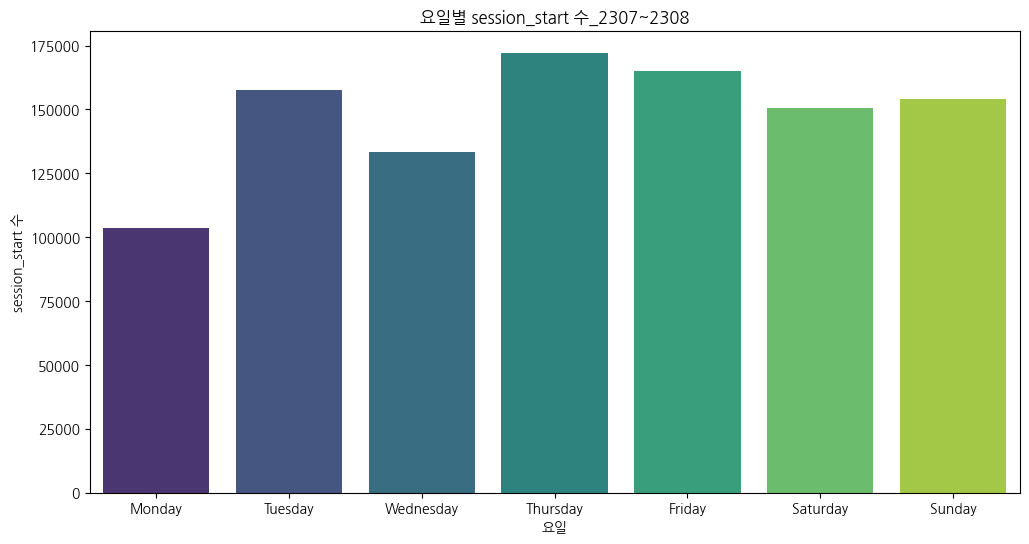

In [39]:
# session_idÎ≥ÑÎ°ú event_keyÍ∞Ä session_startÏù∏ Í≤ΩÏö∞Ïùò ÏöîÏùº, ÏãúÍ∞ÑÎåÄ ÏïåÏïÑÎÇ¥Í∏∞
session_start_df = hackle_events_df[hackle_events_df['event_key'] == '$session_start'].copy()

# ÏöîÏùºÎ≥ÑÎ°ú session_start Ïàò ÏßëÍ≥Ñ
session_start_week_counts = session_start_df.groupby(['event_day_of_week', 'event_day_name']).size().reset_index(name='session_start_count')
display(session_start_week_counts)
display(session_start_week_counts['session_start_count'].describe())

# ÏöîÏùºÎ≥ÑÎ°ú session_start Ïàò ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
sns.barplot(data = session_start_week_counts, x = 'event_day_of_week', y = 'session_start_count', palette='viridis')
plt.title('ÏöîÏùºÎ≥Ñ session_start Ïàò_2307~2308')
plt.xlabel('ÏöîÏùº')
plt.ylabel('session_start Ïàò')   
plt.xticks(ticks = range(7), labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()  
                                                                                                                                                                                                                                                               

event_hour   count
0            0   60560
1            1   42052
2            2   26708
3            3   15375
4            4    8228
5            5    5714
6            6    7192
7            7   16187
8            8   24154
9            9   25329
10          10   31021
11          11   35455
12          12   38741
13          13   38870
14          14   38351
15          15   38721
16          16   43274
17          17   70247
18          18   89097
19          19   77405
20          20  103491
21          21   72974
22          22   66009
23          23   61697

count        24.000000
mean      43202.166667
std       26676.819856
min        5714.000000
25%       25035.250000
50%       38731.000000
75%       62775.000000
max      103491.000000
Name: count, dtype: float64

/tmp/ipykernel_64348/2454863591.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = session_start_hour_counts, x = 'event_hour', y = 'count', palette='viridis')


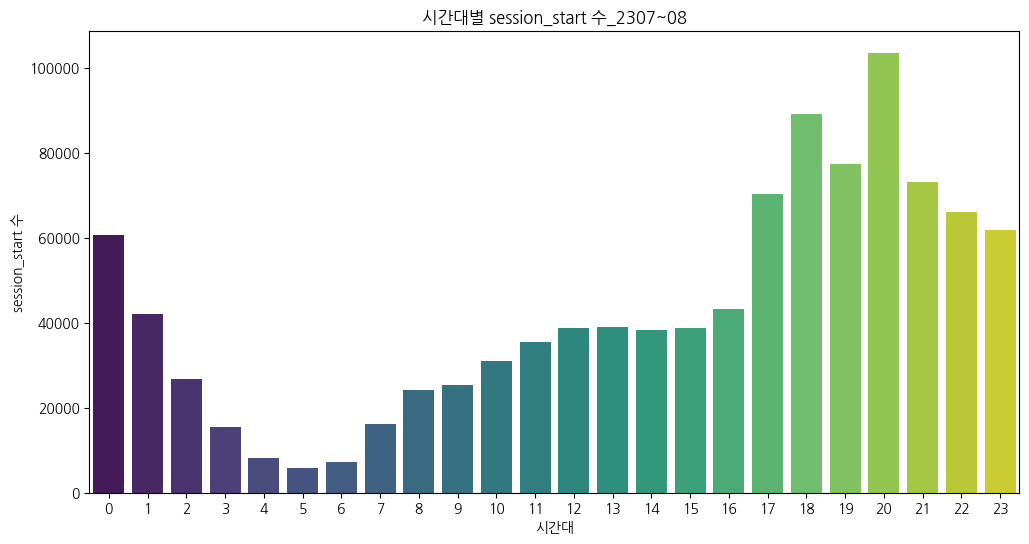

In [47]:
# ÏãúÍ∞ÑÎåÄÎ≥ÑÎ°ú session_start Ïù¥Î≤§Ìä∏ Í∞úÏàò ÏßëÍ≥Ñ
session_start_hour_counts = session_start_df['event_hour'].value_counts().sort_index().reset_index()
display(session_start_hour_counts)
display(session_start_hour_counts['count'].describe())

# ÏãúÍ∞ÑÎåÄÎ≥ÑÎ°ú session_start Ïù¥Î≤§Ìä∏ Í∞úÏàò ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
sns.barplot(data = session_start_hour_counts, x = 'event_hour', y = 'count', palette='viridis')
plt.title('ÏãúÍ∞ÑÎåÄÎ≥Ñ session_start Ïàò_2307~08')
plt.xlabel('ÏãúÍ∞ÑÎåÄ')   
plt.ylabel('session_start Ïàò')   
plt.show()    

# ÏßÄÌëú ÎèÑÏ∂ú_ÏÑ∏ÏÖò ÏßÄÏÜç ÏãúÍ∞Ñ

In [3]:
# ÌååÏùº Î∂àÎü¨Ïò§Í∏∞ (properties + events ÌååÏùºÎ°ú! // final.parquet; Ï†ïÏ†ú ÌõÑ Î≥ëÌï©)
# Í≤ΩÎ°ú ÏÑ§Ï†ï
file_path = "gs://part4_project/hackle/final.parquet"
key_path = "../config/codeit_project_vm_key.json"

# GCSÏóêÏÑú parquet Î∂àÎü¨Ïò§Í∏∞
final_hackle_df = pd.read_parquet(file_path, storage_options={"token": key_path})

# ÌôïÏù∏
print(final_hackle_df.shape)

(11406944, 12)


In [4]:
show_df_info(final_hackle_df, 'final_hackle_df')


final_hackle_df ÌòïÌÉú:


(11406944, 12)


final_hackle_df Ï≤´ 5Ìñâ:


event_id      event_datetime  \
0  00000533-3f1c-4b3b-81f1-0c8f35754b4e 2023-07-18 19:40:17   
1  00114c10-8321-4978-a73f-fd452162b9f2 2023-07-31 19:11:51   
2  01f136ac-3257-4cf9-b0a9-c0c37fe7e572 2023-07-31 19:14:34   
3  02cc364e-23ec-46cf-a02f-14cf60f97ec1 2023-07-31 19:13:18   
4  05d05a79-cdb3-43fe-b931-5cb0992a36a1 2023-07-31 19:12:50   

             event_key                    session_id  friend_count  \
0       $session_start  4OzYh3seq3VKytpSn5pvQkZNQii1           NaN   
1  click_notice_detail  4OzYh3seq3VKytpSn5pvQkZNQii1          51.0   
2  click_question_open  4OzYh3seq3VKytpSn5pvQkZNQii1          51.0   
3  click_question_open  4OzYh3seq3VKytpSn5pvQkZNQii1          51.0   
4  click_question_open  4OzYh3seq3VKytpSn5pvQkZNQii1          51.0   

   question_id  heart_balance      id  user_id  \
0          NaN            NaN  367093  1041414   
1          NaN         1719.0  367093  1041414   
2          NaN         1719.0  367093  1041414   
3          NaN         1719.0  367093  1041414   
4          NaN         1719.0  367093  1041414   

                              device_id osname osversion  
0  590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74    iOS      16.0  
1  590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74    iOS      16.0  
2  590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74    iOS      16.0  
3  590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74    iOS      16.0  
4  590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74    iOS      16.0


final_hackle_df Ï†ïÎ≥¥:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11406944 entries, 0 to 11406943
Data columns (total 12 columns):
 #   Column          Dtype         
---  ------          -----         
 0   event_id        object        
 1   event_datetime  datetime64[ms]
 2   event_key       object        
 3   session_id      object        
 4   friend_count    float64       
 5   question_id     float64       
 6   heart_balance   float64       
 7   id              int64         
 8   user_id         object        
 9   device_id       object        
 10  osname          object        
 11  osversion       object        
dtypes: datetime64[ms](1), float64(3), int64(1), object(7)
memory usage: 1.0+ GB

final_hackle_df ÌÜµÍ≥Ñ ÏöîÏïΩ:


event_datetime  friend_count    question_id  heart_balance  \
count                    11406944  1.068659e+07  449484.000000   1.071048e+07   
mean   2023-07-29 02:00:13.502000  5.434417e+01    2766.385262   1.627222e+04   
min           2023-07-18 00:00:00  0.000000e+00      99.000000   0.000000e+00   
25%           2023-07-22 21:34:18  3.200000e+01    1393.000000   4.340000e+02   
50%           2023-07-28 17:09:13  4.900000e+01    2569.000000   1.249000e+03   
75%    2023-08-04 17:59:48.250000  7.100000e+01    4459.000000   3.188000e+03   
max           2023-08-10 23:59:59  1.365000e+03    5133.000000   8.849998e+08   
std                           NaN  3.350873e+01    1599.967343   3.317680e+06   

                 id  
count  1.140694e+07  
mean   1.703786e+05  
min    2.000000e+00  
25%    4.501400e+04  
50%    1.292080e+05  
75%    2.665000e+05  
max    5.253470e+05  
std    1.466598e+05


final_hackle_df ÌÜµÍ≥Ñ ÏöîÏïΩ:


event_id     event_key  \
count                               11406944      11406944   
unique                              11406944            44   
top     00000533-3f1c-4b3b-81f1-0c8f35754b4e  view_lab_tap   
freq                                       1       1266665   

                                  session_id   user_id  \
count                               11406944  11406944   
unique                                242445    239650   
top     A40CA2FA-CEB6-4E94-857D-7C229ECC2598   1134987   
freq                                    8157     17526   

                                   device_id    osname osversion  
count                               11406944  11406944  11406944  
unique                                242118         2        73  
top     A40CA2FA-CEB6-4E94-857D-7C229ECC2598       iOS    16.5.1  
freq                                    8157   7174703   4107821


final_hackle_df Í≤∞Ï∏°Ïπò ÌôïÏù∏:


event_id                 0
event_datetime           0
event_key                0
session_id               0
friend_count        720352
question_id       10957460
heart_balance       696462
id                       0
user_id                  0
device_id                0
osname                   0
osversion                0
dtype: int64

In [5]:
# id Ïª¨Îüº Ï†úÏô∏ÌïòÍ≥† Ï§ëÎ≥µÍ∞í ÌôïÏù∏ 
final_hackle_df.drop(columns = ['id']).duplicated().sum() # Ï§ëÎ≥µÏóÜÏùå !

0

## ÏÑ∏ÏÖò Í¥ÄÎ†® EDA (ÏÑ∏ÏÖò ÏãúÏûëÍ≥º ÎÅùÏùÑ Î¨¥ÏóáÏúºÎ°ú Î≥º Í≤ÉÏù∏Í∞Ä?)

### session start/end Í∞úÏàò Í∏∞Î∞ò ÌÉêÏÉâ

In [ ]:
# ÏÑ∏ÏÖò ÏïÑÏù¥Îîî Î≥ÑÎ°ú event_keyÎ≥Ñ Í∞úÏàò ÌôïÏù∏ 
group_session_event_cnt_df = hackle_events_df.groupby('session_id')['event_key'].value_counts().reset_index(name='count')
print(group_session_event_cnt_df.shape)
group_session_event_cnt_df.head()

(2804315, 3)


session_id            event_key  count
0  000137bc-80de-4bb5-b61d-df7f217a4501           launch_app      1
1  000137bc-80de-4bb5-b61d-df7f217a4501       $session_start      1
2  00025EE1-BA46-4853-8FDD-B991FABA328F    view_timeline_tap      6
3  00025EE1-BA46-4853-8FDD-B991FABA328F         view_lab_tap      6
4  00025EE1-BA46-4853-8FDD-B991FABA328F  click_notice_detail      6

In [49]:
group_session_event_cnt_df['session_id'].nunique() # session_id 253616 Í∞ú 

253616

In [47]:
# event_keyÍ∞Ä session_startÏôÄ session_endÏù∏ Í≤ΩÏö∞Îßå ÌïÑÌÑ∞ÎßÅ
group_session_start_end_df = group_session_event_cnt_df[group_session_event_cnt_df['event_key'].isin(['$session_start', '$session_end'])]

# session_idÎ≥ÑÎ°ú session_startÏôÄ session_endÏùò Í∞úÏàò ÌôïÏù∏ 
pivot_session_start_end_df = group_session_start_end_df.pivot(index='session_id', columns='event_key', values='count').fillna(0).reset_index()

# Í≤∞Í≥º ÌôïÏù∏
show_df_info(pivot_session_start_end_df,'pivot_session_start_end_df')


pivot_session_start_end_df ÌòïÌÉú:


(252883, 3)


pivot_session_start_end_df Ï≤´ 5Ìñâ:


event_key                            session_id  $session_end  $session_start
0          000137bc-80de-4bb5-b61d-df7f217a4501           0.0             1.0
1          00025EE1-BA46-4853-8FDD-B991FABA328F           0.0             3.0
2          00039F52-AC9A-4474-A645-DFE225C56753           0.0             1.0
3          0004482B-03B0-4638-8C5A-C2E49C085C7F           0.0             1.0
4          0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD           2.0             4.0


pivot_session_start_end_df Ï†ïÎ≥¥:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252883 entries, 0 to 252882
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   session_id      252883 non-null  object 
 1   $session_end    252883 non-null  float64
 2   $session_start  252883 non-null  float64
dtypes: float64(2), object(1)
memory usage: 5.8+ MB

pivot_session_start_end_df ÌÜµÍ≥Ñ ÏöîÏïΩ:


event_key   $session_end  $session_start
count      252883.000000   252883.000000
mean            2.569006        4.100125
std             7.389767        7.616743
min             0.000000        0.000000
25%             1.000000        2.000000
50%             1.000000        2.000000
75%             2.000000        4.000000
max           285.000000      284.000000


pivot_session_start_end_df ÌÜµÍ≥Ñ ÏöîÏïΩ:


event_key                            session_id
count                                    252883
unique                                   252883
top        000137bc-80de-4bb5-b61d-df7f217a4501
freq                                          1


pivot_session_start_end_df Í≤∞Ï∏°Ïπò ÌôïÏù∏:


event_key
session_id        0
$session_end      0
$session_start    0
dtype: int64

- Ï†ÑÏ≤¥ Í≥†Ïú†Ìïú session_id 253616Í∞ú Ï§ëÏóê, session_start/end Í∞Ä ÏóÜÎäî session_id 733Í∞ú (ÏïΩ 0.29 %)
- session_startÍ∞Ä ÏûàÏñ¥ÎèÑ session_endÎäî ÏóÜÎäî Í≤ΩÏö∞ÎèÑ Ï°¥Ïû¨
- session_startÏôÄ session_end Í∞úÏàò max Í∞íÏù¥ ÎπÑÏ†ïÏÉÅÏ†ÅÏúºÎ°ú ÌÅº?! 

In [45]:
# session_start/end Î≥Ñ 0 Í∞úÏàò 
print((pivot_session_start_end_df['$session_start'] == 0).sum())
print((pivot_session_start_end_df['$session_end'] == 0).sum())

6
51334


- session_startÎäî Í±∞Ïùò 0Ïù¥ ÏóÜÏùå (6Í∞ú)
- session_endÎäî 0Ïù∏ Í≤ΩÏö∞Í∞Ä ÎßéÏùå

In [74]:
# session_startÎäî 0Ïù¥Í≥† session_endÎäî 1Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞
print(((pivot_session_start_end_df['$session_start'] == 0) & (pivot_session_start_end_df['$session_end'] >= 1)).sum())

# session_endÍ∞Ä 0Ïù¥Í≥† session_startÎäî 1Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞ 
print(((pivot_session_start_end_df['$session_end'] == 0) & (pivot_session_start_end_df['$session_start'] >= 1)).sum())

6
51334


- sesion_startÍ∞Ä Ï∞çÌûàÏßÄ ÏïäÍ≥† session_endÎßå ÏûàÎäî Í≤ΩÏö∞ 6Í∞ú 
- session_endÍ∞Ä Ï∞çÌûàÏßÄ ÏïäÍ≥† session_startÎßå ÏûàÎäî Í≤ΩÏö∞ 51334Í∞ú (ÏïΩ 20.3%)

In [ ]:
# session_startÏôÄ session_end Í∞úÏàòÍ∞Ä ÎèôÏùºÌïú Í≤ΩÏö∞ Ï∂îÏ∂ú 
pivot_session_start_end_df[pivot_session_start_end_df['$session_end'] == pivot_session_start_end_df['$session_start']] 

event_key                            session_id  $session_end  $session_start
30         001B9F54-531A-4460-9440-526CC96F2463           2.0             2.0
94         005C4D5D-BF73-428A-96D0-160B200497E3           3.0             3.0
141        008DAA55-8DF3-4405-9E11-D4A95E76825C         178.0           178.0
156                009l5WfLYVTlVCItggiEJyKwWtv2           1.0             1.0
275                00kFYscZytOemEnsUJjkVmgtwNP2           2.0             2.0
...                                         ...           ...             ...
252414             zqDRFKkjlvZSePNWWHdhDrcITLZ2           4.0             4.0
252445             zqxoadIXYCMnteAw85HIwgBcRyb2           2.0             2.0
252446             zqzSSNaGHkPNTh2VZBxiS3Vjm382           2.0             2.0
252637             zugUBuAPZiOpH5CWXeSbGAriJaN2           2.0             2.0
252829             zyz8YybbD8a4nNtA2ISEwoggV6w2           1.0             1.0

[3924 rows x 3 columns]

- 252883Í∞ú session_id Ï§ëÏóê 3924Í∞úÎßå session_startÏôÄ session_end Í∞úÏàòÍ∞Ä ÎèôÏùºÌï® (ÏïΩ 1.55%)

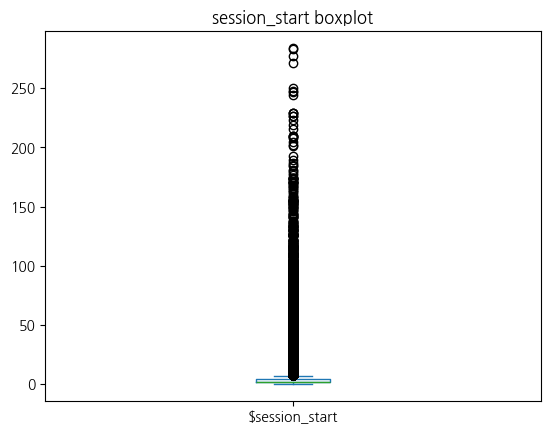

In [88]:
pivot_session_start_end_df['$session_start'].plot(kind = 'box')
plt.title('session_start boxplot')
plt.show()

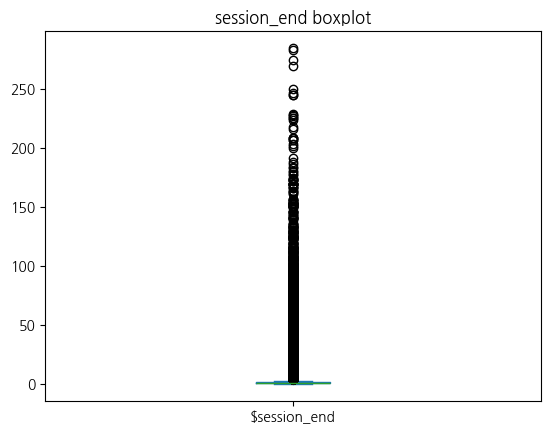

In [89]:
pivot_session_start_end_df['$session_end'].plot(kind = 'box')
plt.title('session_end boxplot')
plt.show()

In [97]:
# Ïù¥ÏÉÅÏπò ÌôïÏù∏ÌïòÍ∏∞
q3 = pivot_session_start_end_df['$session_start'].quantile(0.75)
q1 = pivot_session_start_end_df['$session_start'].quantile(0.25)
iqr = q3 - q1

upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr

# Ïù¥ÏÉÅÏπò Ìñâ ÌÉêÏÉâ
pivot_session_start_end_df[(pivot_session_start_end_df['$session_start'] >= upper) | ((pivot_session_start_end_df['$session_start'] <= lower))]
    

event_key                            session_id  $session_end  $session_start
5          00057831-A672-4163-9C02-AB920A371F2C           6.0             8.0
9          000C66B7-BD0A-4238-9560-A86E4A3A60A4           5.0             7.0
16         00132348-2ae9-4622-96ab-eabca19e1899          16.0            18.0
18         001384f2-7407-479c-a260-c5b525549274           4.0             7.0
22         00150b66-4b8c-44aa-9005-e4fbdda9506e          51.0            54.0
...                                         ...           ...             ...
252838             zz8I7PEUOiS7P3Yd0gpqwoa47En2          15.0            17.0
252845             zzM1vj0lTSaztBEYG8yoV8NptCC3           4.0             8.0
252863             zzeFmOTzkLPa4kJ9kWsWnWRJPML2          13.0            16.0
252870             zzmI60yQ07Y0kHefIyC3NMk8oTX2           6.0             7.0
252871             zzmejla6kTSFw2iDl00M44BPRMb2          10.0            13.0

[26981 rows x 3 columns]

- Ïù¥ÏÉÅÏπòÎ°ú Î∂ÑÎ•òÎêú session_id ÏïΩ 10.67%

In [90]:
# Ïù¥ÏÉÅÏπò ÌôïÏù∏ÌïòÍ∏∞
q3 = pivot_session_start_end_df['$session_end'].quantile(0.75)
q1 = pivot_session_start_end_df['$session_end'].quantile(0.25)
iqr = q3 - q1

upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr

# Ïù¥ÏÉÅÏπò Ìñâ ÌÉêÏÉâ
pivot_session_start_end_df[(pivot_session_start_end_df['$session_end'] >= upper) | ((pivot_session_start_end_df['$session_end'] <= lower))]
    

event_key                            session_id  $session_end  $session_start
5          00057831-A672-4163-9C02-AB920A371F2C           6.0             8.0
6          000638C3-2BC2-4068-A482-861B526B2651           4.0             5.0
9          000C66B7-BD0A-4238-9560-A86E4A3A60A4           5.0             7.0
16         00132348-2ae9-4622-96ab-eabca19e1899          16.0            18.0
18         001384f2-7407-479c-a260-c5b525549274           4.0             7.0
...                                         ...           ...             ...
252840             zz9NMJdDkRaXsS6XXchFYEsiNyH3           4.0             6.0
252845             zzM1vj0lTSaztBEYG8yoV8NptCC3           4.0             8.0
252863             zzeFmOTzkLPa4kJ9kWsWnWRJPML2          13.0            16.0
252870             zzmI60yQ07Y0kHefIyC3NMk8oTX2           6.0             7.0
252871             zzmejla6kTSFw2iDl00M44BPRMb2          10.0            13.0

[33050 rows x 3 columns]

- Ïù¥ÏÉÅÏπòÎ°ú Î∂ÑÎ•òÎêú session_id ÏïΩ 13.07%

### session start/end ÌéòÏñ¥ÎßÅ Í∏∞Î∞ò ÌÉêÏÉâ

In [6]:
# ÌïÑÏöîÌïú Ïª¨ÎüºÎßå Ï∂îÏ∂ú
session_df = final_hackle_df[final_hackle_df['event_key'].isin(['$session_start', '$session_end'])][['user_id','event_key','event_datetime']]
show_df_info(session_df,'session_df')


session_df ÌòïÌÉú:


(1669091, 3)


session_df Ï≤´ 5Ìñâ:


user_id       event_key      event_datetime
0   1041414  $session_start 2023-07-18 19:40:17
21  1041414  $session_start 2023-07-18 19:40:21
37  1041414  $session_start 2023-07-31 19:11:17
44  1041414    $session_end 2023-07-18 19:40:17
62  1046711  $session_start 2023-07-18 21:01:38


session_df Ï†ïÎ≥¥:
<class 'pandas.core.frame.DataFrame'>
Index: 1669091 entries, 0 to 11406942
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   user_id         1669091 non-null  object        
 1   event_key       1669091 non-null  object        
 2   event_datetime  1669091 non-null  datetime64[ms]
dtypes: datetime64[ms](1), object(2)
memory usage: 50.9+ MB

session_df ÌÜµÍ≥Ñ ÏöîÏïΩ:


event_datetime
count                     1669091
mean   2023-07-28 04:48:07.695000
min           2023-07-18 00:00:00
25%    2023-07-21 20:28:59.500000
50%           2023-07-27 17:00:25
75%           2023-08-03 11:03:48
max           2023-08-10 23:59:58


session_df ÌÜµÍ≥Ñ ÏöîÏïΩ:


user_id       event_key
count   1669091         1669091
unique   239210               2
top     1239557  $session_start
freq        573         1022128


session_df Í≤∞Ï∏°Ïπò ÌôïÏù∏:


user_id           0
event_key         0
event_datetime    0
dtype: int64

In [7]:
# Ï§ëÎ≥µÍ∞í ÌôïÏù∏
session_df.duplicated().sum()

2640

In [8]:
# Ï§ëÎ≥µÍ∞í ÌÉêÏÉâ
session_df[session_df.duplicated()] # ÎèôÏãúÍ∞ÑÎåÄÏóê session_start or  session_endÍ∞Ä 2Í∞ú Ïù¥ÏÉÅ Ï∞çÌûå Í≤ΩÏö∞ (ÎèôÏùº event_keyÏù∏Îç∞ event_idÍ∞Ä Îã§Î¶Ñ! )

user_id       event_key      event_datetime
10921                          1106511  $session_start 2023-07-20 21:44:55
30560                          1510437  $session_start 2023-08-05 21:20:08
44413                          1022880  $session_start 2023-07-28 17:42:01
114810                         1211927  $session_start 2023-08-01 02:58:18
157926                         1306560  $session_start 2023-07-22 02:40:03
...                                ...             ...                 ...
11401947  Pe3nY7CXizMiqUrfbarBLfy1z2x2  $session_start 2023-07-19 11:11:56
11401973                        962500  $session_start 2023-07-21 20:20:40
11402726  lcIGV9P3i5NtuNr5jJskem9hgBx1  $session_start 2023-08-04 21:23:36
11404472  tJsMCD6KnoglffY1MA7r1EqCmVu2  $session_start 2023-07-20 21:49:45
11406053                       1509331  $session_start 2023-07-24 19:08:36

[2640 rows x 3 columns]

In [20]:
# ÏÉòÌîå ÌôïÏù∏
final_hackle_df[final_hackle_df['user_id'] == '1510437'].sort_values('event_datetime').head(10)

event_id      event_datetime  \
30566  c666a6d2-813e-4e18-9059-2321eaf16ff5 2023-07-25 22:57:00   
30574  f1d93c19-6636-4b25-a5c8-cdb720a90422 2023-07-25 22:57:00   
30555  88f8e6cc-7a8b-429d-aed9-4def1767edd6 2023-08-05 21:20:08   
30543  29888d09-d28d-440f-bdee-7dad541dfad5 2023-08-05 21:20:08   
30560  a6831b9f-4bc1-4cdb-ad64-240d67dff321 2023-08-05 21:20:08   
30539  00ef597b-cbd8-4783-affe-86eab8062203 2023-08-05 21:20:08   
30571  e82cc05d-694e-4b18-ad0c-51ad363f6f67 2023-08-05 21:20:33   
30573  ee91a1d2-a883-4491-acff-e82f25bd5598 2023-08-05 21:20:33   
30563  c4f98ee5-4cf5-4c8f-82dd-f6c9181e7ac6 2023-08-05 21:20:33   
30537  0000683d-7cfe-4b78-8ee7-c59593187d04 2023-08-05 21:20:33   

                             event_key                    session_id  \
30566                       launch_app  P96SFNCiviS9nOCyNudzLR1bs2B2   
30574                   $session_start  P96SFNCiviS9nOCyNudzLR1bs2B2   
30555                       launch_app  P96SFNCiviS9nOCyNudzLR1bs2B2   
30543                   $session_start  P96SFNCiviS9nOCyNudzLR1bs2B2   
30560                   $session_start  P96SFNCiviS9nOCyNudzLR1bs2B2   
30539                     $session_end  P96SFNCiviS9nOCyNudzLR1bs2B2   
30571                view_timeline_tap  P96SFNCiviS9nOCyNudzLR1bs2B2   
30573  click_bottom_navigation_profile  P96SFNCiviS9nOCyNudzLR1bs2B2   
30563                 view_profile_tap  P96SFNCiviS9nOCyNudzLR1bs2B2   
30537                     view_lab_tap  P96SFNCiviS9nOCyNudzLR1bs2B2   

       friend_count  question_id  heart_balance  id  user_id  \
30566           NaN          NaN            NaN  76  1510437   
30574           NaN          NaN            NaN  76  1510437   
30555           NaN          NaN            NaN  76  1510437   
30543           NaN          NaN            NaN  76  1510437   
30560           NaN          NaN            NaN  76  1510437   
30539           NaN          NaN            NaN  76  1510437   
30571          67.0          NaN         3354.0  76  1510437   
30573          67.0          NaN         3354.0  76  1510437   
30563          67.0          NaN         3354.0  76  1510437   
30537          67.0          NaN         3354.0  76  1510437   

                                  device_id   osname osversion  
30566  e19e3713-7c35-4514-990b-9191eaa77a79  Android         9  
30574  e19e3713-7c35-4514-990b-9191eaa77a79  Android         9  
30555  e19e3713-7c35-4514-990b-9191eaa77a79  Android         9  
30543  e19e3713-7c35-4514-990b-9191eaa77a79  Android         9  
30560  e19e3713-7c35-4514-990b-9191eaa77a79  Android         9  
30539  e19e3713-7c35-4514-990b-9191eaa77a79  Android         9  
30571  e19e3713-7c35-4514-990b-9191eaa77a79  Android         9  
30573  e19e3713-7c35-4514-990b-9191eaa77a79  Android         9  
30563  e19e3713-7c35-4514-990b-9191eaa77a79  Android         9  
30537  e19e3713-7c35-4514-990b-9191eaa77a79  Android         9

In [16]:
# ÏÉòÌîå ÌôïÏù∏
hackle_properties_df[hackle_properties_df['user_id'] == '1510437']

id                    session_id  user_id language   osname osversion  \
75  76  P96SFNCiviS9nOCyNudzLR1bs2B2  1510437       ko  Android         9   

   versionname                             device_id  
75       2.0.5  e19e3713-7c35-4514-990b-9191eaa77a79

In [19]:
# ÏÉòÌîå ÌôïÏù∏Ïù∏
hackle_events_df[hackle_events_df['session_id'] == 'P96SFNCiviS9nOCyNudzLR1bs2B2'].sort_values('event_datetime').head(10)

event_id      event_datetime  \
8867844   c666a6d2-813e-4e18-9059-2321eaf16ff5 2023-07-25 22:57:00   
10809981  f1d93c19-6636-4b25-a5c8-cdb720a90422 2023-07-25 22:57:00   
6124309   88f8e6cc-7a8b-429d-aed9-4def1767edd6 2023-08-05 21:20:08   
1856183   29888d09-d28d-440f-bdee-7dad541dfad5 2023-08-05 21:20:08   
7442471   a6831b9f-4bc1-4cdb-ad64-240d67dff321 2023-08-05 21:20:08   
41520     00ef597b-cbd8-4783-affe-86eab8062203 2023-08-05 21:20:08   
10377044  e82cc05d-694e-4b18-ad0c-51ad363f6f67 2023-08-05 21:20:33   
10663418  ee91a1d2-a883-4491-acff-e82f25bd5598 2023-08-05 21:20:33   
8803853   c4f98ee5-4cf5-4c8f-82dd-f6c9181e7ac6 2023-08-05 21:20:33   
75        0000683d-7cfe-4b78-8ee7-c59593187d04 2023-08-05 21:20:33   

                                event_key                    session_id  \
8867844                        launch_app  P96SFNCiviS9nOCyNudzLR1bs2B2   
10809981                   $session_start  P96SFNCiviS9nOCyNudzLR1bs2B2   
6124309                        launch_app  P96SFNCiviS9nOCyNudzLR1bs2B2   
1856183                    $session_start  P96SFNCiviS9nOCyNudzLR1bs2B2   
7442471                    $session_start  P96SFNCiviS9nOCyNudzLR1bs2B2   
41520                        $session_end  P96SFNCiviS9nOCyNudzLR1bs2B2   
10377044                view_timeline_tap  P96SFNCiviS9nOCyNudzLR1bs2B2   
10663418  click_bottom_navigation_profile  P96SFNCiviS9nOCyNudzLR1bs2B2   
8803853                  view_profile_tap  P96SFNCiviS9nOCyNudzLR1bs2B2   
75                           view_lab_tap  P96SFNCiviS9nOCyNudzLR1bs2B2   

                                            id item_name page_name  \
8867844   c666a6d2-813e-4e18-9059-2321eaf16ff5                       
10809981  f1d93c19-6636-4b25-a5c8-cdb720a90422                       
6124309   88f8e6cc-7a8b-429d-aed9-4def1767edd6                       
1856183   29888d09-d28d-440f-bdee-7dad541dfad5                       
7442471   a6831b9f-4bc1-4cdb-ad64-240d67dff321                       
41520     00ef597b-cbd8-4783-affe-86eab8062203                       
10377044  e82cc05d-694e-4b18-ad0c-51ad363f6f67                       
10663418  ee91a1d2-a883-4491-acff-e82f25bd5598                       
8803853   c4f98ee5-4cf5-4c8f-82dd-f6c9181e7ac6                       
75        0000683d-7cfe-4b78-8ee7-c59593187d04                       

          friend_count  votes_count  heart_balance  question_id  
8867844            NaN          NaN            NaN          NaN  
10809981           NaN          NaN            NaN          NaN  
6124309            NaN          NaN            NaN          NaN  
1856183            NaN          NaN            NaN          NaN  
7442471            NaN          NaN            NaN          NaN  
41520              NaN          NaN            NaN          NaN  
10377044          67.0        136.0         3354.0          NaN  
10663418          67.0        136.0         3354.0          NaN  
8803853           67.0        136.0         3354.0          NaN  
75                67.0        136.0         3354.0          NaN

- ÎèôÏãúÍ∞ÑÎåÄÏóê session_start or session_endÍ∞Ä 2Í∞ú Ïù¥ÏÉÅ Ï∞çÌûå Í≤ΩÏö∞Í∞Ä Ï§ëÎ≥µÍ∞íÏúºÎ°ú Ïû°Ìûò (ÎèôÏùº event_keyÏù∏Îç∞ event_idÍ∞Ä Îã§Î¶Ñ!)
- session_startÏôÄ session_endÍ∞Ä ÎèôÏãúÍ∞ÑÎåÄÏù∏ Í≤ΩÏö∞ÎèÑ ÏûàÏßÄÎßå, Ïù¥Í±¥ Ïßù ÏßÄÏñ¥Ï£ºÍ≥† ÎÇòÏÑú ÎÇòÏ§ëÏóê Ï≤òÎ¶¨! 
- Ïö∞ÏÑ† Ï§ëÎ≥µÍ∞í Ï†úÍ±∞ Í≤∞Ï†ï!

In [22]:
# Ï§ëÎ≥µÍ∞í Ï†úÍ±∞
session_df = session_df.drop_duplicates()
session_df.shape

(1666451, 3)

In [23]:
session_df.describe(include='all')

user_id       event_key              event_datetime
count   1666451         1666451                     1666451
unique   239210               2                         NaN
top     1239557  $session_start                         NaN
freq        573         1019954                         NaN
mean        NaN             NaN  2023-07-28 04:50:52.596000
min         NaN             NaN         2023-07-18 00:00:00
25%         NaN             NaN         2023-07-21 20:29:47
50%         NaN             NaN         2023-07-27 17:05:40
75%         NaN             NaN  2023-08-03 11:08:24.500000
max         NaN             NaN         2023-08-10 23:59:58

In [ ]:
# final_hackle : 327380 Ïú†Ï†Ä Ï§ë 326940 Ïú†Ï†ÄÎßå session_start/end Î≥¥Ïú†! -> 440Î™ÖÏùò Ïú†Ï†ÄÎäî ÎëòÎã§ ÏóÜÏùå (0.13%)
# final : 239650 Ïú†Ï†Ä Ï§ë 239210 Ïú†Ï†ÄÎßå session_start/end Î≥¥Ïú†! -> 440Î™ÖÏùò Ïú†Ï†ÄÎäî ÎëòÎã§ ÏóÜÏùå (0.18%)

In [27]:
# session_df Ï†ïÎ†¨ 
session_df = session_df.sort_values(by=['user_id', 'event_datetime']).reset_index(drop=True)

matched_sessions = []

for user_id, group in session_df.groupby('user_id'):
    starts = []
    used_indices = set()
    group = group.sort_values(by='event_datetime').reset_index(drop=True)

    for idx, row in group.iterrows():
        if row['event_key'] == '$session_start':
            starts.append({
                'index': idx,
                'start_time': row['event_datetime'],
                'end_time': pd.NaT,
                'matched': False
            })

    for idx, row in group.iterrows():
        if row['event_key'] == '$session_end':
            # Í∞ÄÎä•Ìïú start Ï§ë endÎ≥¥Îã§ Í∞ôÍ±∞ÎÇò ÏûëÍ≥†, ÏïÑÏßÅ Îß§Ïπ≠ÎêòÏßÄ ÏïäÏùÄ Í∞ÄÏû• ÏµúÍ∑º start Ï∞æÍ∏∞
            candidates = [s for s in starts if not s['matched'] and s['start_time'] <= row['event_datetime']]
            if candidates:
                latest_start = max(candidates, key=lambda x: x['start_time'])
                latest_start['end_time'] = row['event_datetime']
                latest_start['matched'] = True
            else:
                # Îß§Ïπ≠ Ïïà ÎêòÎäî endÎäî Îî∞Î°ú Í∏∞Î°ù
                matched_sessions.append({
                    'user_id': user_id,
                    'start_time': pd.NaT,
                    'end_time': row['event_datetime'],
                    'session_duration_sec': np.nan
                })

    # ÏµúÏ¢Ö ÏÑ∏ÏÖò Î¶¨Ïä§Ìä∏Î°ú Íµ¨ÏÑ±
    for s in starts:
        matched_sessions.append({
            'user_id': user_id,
            'start_time': s['start_time'],
            'end_time': s['end_time'],
            'session_duration_sec': (
                (s['end_time'] - s['start_time']).total_seconds() if pd.notna(s['end_time']) else np.nan
            )
        })

matched_session_df = pd.DataFrame(matched_sessions)
matched_session_df = matched_session_df.sort_values(by=['user_id', 'start_time', 'end_time']).reset_index(drop=True)

print(matched_session_df.shape)

# 4Î∂Ñ 8Ï¥à Í±∏Î¶º

(1023842, 4)


In [28]:
# matched_session_id Í∏∞Î≥∏ ÏÇ¨Ìï≠ ÌôïÏù∏ 
show_df_info(matched_session_df,'matched_session_df')


matched_session_df ÌòïÌÉú:


(1023842, 4)


matched_session_df Ï≤´ 5Ìñâ:


user_id          start_time            end_time  \
0  012Si5t33QgB3g18oOpcd2RDx5U2 2023-07-25 12:59:58                 NaT   
1  01BFWYlo11eFmY64kiY6n5PQAcs1 2023-07-18 20:45:12                 NaT   
2  01pPQO7oPmgKZOU7f8XGc93rCWg2 2023-07-25 22:15:41                 NaT   
3  02Ika66GtzVQj5Epl6xtwcGf72u1 2023-07-20 21:59:56                 NaT   
4  02QVyNBCraNN7i04MPRQVrGbGPR2 2023-07-21 08:59:54 2023-07-21 08:59:58   

   session_duration_sec  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   4.0


matched_session_df Ï†ïÎ≥¥:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023842 entries, 0 to 1023841
Data columns (total 4 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   user_id               1023842 non-null  object        
 1   start_time            1019954 non-null  datetime64[ns]
 2   end_time              646497 non-null   datetime64[ns]
 3   session_duration_sec  642609 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 31.2+ MB

matched_session_df ÌÜµÍ≥Ñ ÏöîÏïΩ:


start_time                       end_time  \
count                        1019954                         646497   
mean   2023-07-28 10:42:17.204904704  2023-07-27 19:36:28.201991168   
min              2023-07-18 00:00:00            2023-07-18 00:00:00   
25%    2023-07-21 23:19:15.249999872            2023-07-21 17:35:10   
50%              2023-07-27 19:10:43            2023-07-26 20:54:51   
75%              2023-08-03 21:10:44            2023-08-02 15:48:59   
max              2023-08-10 23:59:58            2023-08-10 23:59:54   
std                              NaN                            NaN   

       session_duration_sec  
count          6.426090e+05  
mean           1.646716e+03  
min            0.000000e+00  
25%            1.000000e+00  
50%            1.900000e+01  
75%            1.240000e+02  
max            1.972598e+06  
std            2.910615e+04


matched_session_df ÌÜµÍ≥Ñ ÏöîÏïΩ:


user_id
count   1023842
unique   239210
top     1239557
freq        287


matched_session_df Í≤∞Ï∏°Ïπò ÌôïÏù∏:


user_id                      0
start_time                3888
end_time                377345
session_duration_sec    381233
dtype: int64

In [29]:
# start_timeÍ≥º end_time Î™®Îëê ÏûàÎäî Í≤ΩÏö∞ : matched
# startÎßå : start_only
# endÎßå : end_only

# ÌéòÏñ¥ÎßÅ Ïó¨Î∂Ä Ïª¨Îüº Ï∂îÍ∞Ä 
def check_matched(row):
    if pd.notnull(row['start_time']) and pd.notnull(row['end_time']):
        return 'matched'
    elif pd.notnull(row['start_time']) and pd.isna(row['end_time']):
        return 'start_only'
    elif pd.isna(row['start_time']) and pd.notnull(row['end_time']):
        return 'end_only'
    else:
        return 'unknown'

matched_session_df['session_flag'] = matched_session_df.apply(check_matched, axis=1) 
print(matched_session_df.shape)

(1023842, 5)


In [3]:
## matched_session_df Î∂àÎü¨Ïò§Í∏∞ 
matched_session_df = pd.read_parquet("/home/codeit_project_vm/codeit_project/codeit-project-docker/data/matched_session_df.parquet")

print(matched_session_df.shape)

(1023842, 5)


In [30]:
# Ï§ëÎ≥µÍ∞í ÌôïÏù∏
matched_session_df.duplicated().sum() # Ï§ëÎ≥µÍ∞í ÏóÜÏùå

0

In [6]:
# session_flag Î≥Ñ ÌôïÏù∏
print('\nsession Îß§Ïπ≠ Ïó¨Î∂Ä Î≥Ñ Í∞úÏàò')
print(matched_session_df['session_flag'].value_counts())
print('\nsession Îß§Ïπ≠ Ïó¨Î∂Ä Î≥Ñ Í∞úÏàò ÎπÑÏú®')
print(matched_session_df['session_flag'].value_counts(normalize=True))  # ÎπÑÏú®


session Îß§Ïπ≠ Ïó¨Î∂Ä Î≥Ñ Í∞úÏàò
session_flag
matched       642609
start_only    377345
end_only        3888
Name: count, dtype: int64

session Îß§Ïπ≠ Ïó¨Î∂Ä Î≥Ñ Í∞úÏàò ÎπÑÏú®
session_flag
matched       0.627645
start_only    0.368558
end_only      0.003797
Name: proportion, dtype: float64


In [32]:
show_df_info(matched_session_df,'matched_session_df')


matched_session_df ÌòïÌÉú:


(1023842, 5)


matched_session_df Ï≤´ 5Ìñâ:


user_id          start_time            end_time  \
0  012Si5t33QgB3g18oOpcd2RDx5U2 2023-07-25 12:59:58                 NaT   
1  01BFWYlo11eFmY64kiY6n5PQAcs1 2023-07-18 20:45:12                 NaT   
2  01pPQO7oPmgKZOU7f8XGc93rCWg2 2023-07-25 22:15:41                 NaT   
3  02Ika66GtzVQj5Epl6xtwcGf72u1 2023-07-20 21:59:56                 NaT   
4  02QVyNBCraNN7i04MPRQVrGbGPR2 2023-07-21 08:59:54 2023-07-21 08:59:58   

   session_duration_sec session_flag  
0                   NaN   start_only  
1                   NaN   start_only  
2                   NaN   start_only  
3                   NaN   start_only  
4                   4.0      matched


matched_session_df Ï†ïÎ≥¥:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023842 entries, 0 to 1023841
Data columns (total 5 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   user_id               1023842 non-null  object        
 1   start_time            1019954 non-null  datetime64[ns]
 2   end_time              646497 non-null   datetime64[ns]
 3   session_duration_sec  642609 non-null   float64       
 4   session_flag          1023842 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 39.1+ MB

matched_session_df ÌÜµÍ≥Ñ ÏöîÏïΩ:


start_time                       end_time  \
count                        1019954                         646497   
mean   2023-07-28 10:42:17.204904704  2023-07-27 19:36:28.201991168   
min              2023-07-18 00:00:00            2023-07-18 00:00:00   
25%    2023-07-21 23:19:15.249999872            2023-07-21 17:35:10   
50%              2023-07-27 19:10:43            2023-07-26 20:54:51   
75%              2023-08-03 21:10:44            2023-08-02 15:48:59   
max              2023-08-10 23:59:58            2023-08-10 23:59:54   
std                              NaN                            NaN   

       session_duration_sec  
count          6.426090e+05  
mean           1.646716e+03  
min            0.000000e+00  
25%            1.000000e+00  
50%            1.900000e+01  
75%            1.240000e+02  
max            1.972598e+06  
std            2.910615e+04


matched_session_df ÌÜµÍ≥Ñ ÏöîÏïΩ:


user_id session_flag
count   1023842      1023842
unique   239210            3
top     1239557      matched
freq        287       642609


matched_session_df Í≤∞Ï∏°Ïπò ÌôïÏù∏:


user_id                      0
start_time                3888
end_time                377345
session_duration_sec    381233
session_flag                 0
dtype: int64

In [33]:
517357 / 1340790 * 100 # Ï†ÑÏ≤¥ ÌñâÏùò ÏïΩ 47% Í≤∞Ï∏°Ïπò -> 37% -> user_idÎ°ú Î∞îÍæ∏Î©¥ 38.6% -> final_hackle 38.5%
381233 / 1023842 * 100 # Ï†ÑÏ≤¥ ÌñâÏùò ÏïΩ 37% Í≤∞Ï∏°Ïπò (final)

37.23553048224238

In [28]:
# session Îß§Ïπ≠ ÌôïÏù∏ 
# session_id == 003C3A7D-E37A-43DE-B34D-BDB80CFBAB2B
# session_id == 0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD

In [34]:
matched_session_df[matched_session_df['session_flag'] == 'matched']['user_id'].nunique() 

# final_hackle : 326940 Ïú†Ï†Ä Ï§ë 284547 Ïú†Ï†ÄÍ∞Ä matched ÏÑ∏ÏÖò Î≥¥Ïú† (ÏïΩ 87%)
# final : 239210 Ïú†Ï†Ä Ï§ë 196997 Ïú†Ï†ÄÍ∞Ä matched ÏÑ∏ÏÖò Î≥¥Ïú† (ÏïΩ 82.4%)

196997

In [40]:
matched_session_df[matched_session_df['start_time'] > matched_session_df['end_time']] # end_timeÏù¥ Îçî Îπ†Î•∏ Í≤ΩÏö∞ ÏóÜÏùå

Empty DataFrame
Columns: [user_id, start_time, end_time, session_duration_sec, session_flag]
Index: []

In [41]:
# matched_session_df parquetÏúºÎ°ú ÎÇ¥Î≥¥ÎÇ¥Í∏∞ 
matched_session_df.to_parquet("../data/matched_session_df.parquet", engine="pyarrow", compression="snappy")

### start_only, end_only Î≥¥Ï†ï? 
- ÏßÅÏ†Ñ Ïù¥Î≤§Ìä∏ÏôÄ end_timeÏùò ÏãúÍ∞Ñ Ï∞®Ïù¥, ÏßÅÌõÑ Ïù¥Î≤§Ìä∏ÏôÄ start_timeÏùò ÏãúÍ∞Ñ Ï∞®Ïù¥ Íµ¨ÌïòÍ≥† Í≤∞Ï†ïÌïòÏûê

(Ï≤òÏùå ÏÉùÍ∞Å)     
session_startÏôÄ session_end Í∞Ä ÏßùÏßÄÏñ¥ÏßÑ Í≤ÉÏúºÎ°ú Î∂ÄÌÑ∞ Íµ¨ÌïòÍ∏∞
- session_end ÏóÜÎäî Í≤ΩÏö∞          
session_endÏôÄ Î∞îÎ°ú ÏßÅÏ†Ñ eventÏùò ÏãúÍ∞Ñ Ï∞®Ïù¥Î•º Íµ¨ÌïòÍ≥†, Í∑∏ ÏãúÍ∞ÑÏ∞®Ïùò ÌèâÍ∑†,Ï§ëÏïôÍ∞í Îì±ÏúºÎ°ú end ÏóÜÎäî Í≤ΩÏö∞ Î≥¥Ï†ï

- session_start ÏóÜÎäî Í≤ΩÏö∞      
session_startÏôÄ Î∞îÎ°ú ÏßÅÌõÑ eventÏùò ÏãúÍ∞Ñ Ï∞®Ïù¥Î°ú Î≥¥Ï†ï! 

In [ ]:
# # 1. user_events_dfÎ•º ÏãúÍ∞Ñ Í∏∞Ï§Ä Ï†ïÎ†¨ (ÎßåÏïΩ Ï†ïÎ†¨Ïù¥ Ïïà ÎêòÏñ¥ ÏûàÏúºÎ©¥)
# user_events_df = user_events_df.sort_values(['user_id', 'event_datetime']).reset_index(drop=True)

# # 2. session_start Ïù¥Î≤§Ìä∏ Îã§Ïùå Ïù¥Î≤§Ìä∏ Ï∞æÍ∏∞
# # shift(-1)ÏúºÎ°ú Îã§Ïùå Ïù¥Î≤§Ìä∏ Í∞ÄÏ†∏Ïò§Í∏∞
# user_events_df['next_event_key'] = user_events_df.groupby('user_id')['event_key'].shift(-1)
# user_events_df['next_event_time'] = user_events_df.groupby('user_id')['event_datetime'].shift(-1)
# # shift(1)Î°ú Ïù¥Ï†Ñ Ïù¥Î≤§Ìä∏ Í∞ÄÏ†∏Ïò§Í∏∞
# user_events_df['prev_event_key'] = user_events_df.groupby('user_id')['event_key'].shift(1)
# user_events_df['prev_event_time'] = user_events_df.groupby('user_id')['event_datetime'].shift(1)

# # 3. start Ïù¥Î≤§Ìä∏ÏóêÏÑú Îã§Ïùå Ïù¥Î≤§Ìä∏ÏôÄ ÏãúÍ∞ÑÏ∞® Í≥ÑÏÇ∞
# start_events = user_events_df[user_events_df['event_key'] == '$session_start'].copy()
# start_events['time_to_next'] = (start_events['next_event_time'] - start_events['event_datetime']).dt.total_seconds()

# # 4. end Ïù¥Î≤§Ìä∏ÏóêÏÑú Ïù¥Ï†Ñ Ïù¥Î≤§Ìä∏ÏôÄ ÏãúÍ∞ÑÏ∞® Í≥ÑÏÇ∞
# end_events = user_events_df[user_events_df['event_key'] == '$session_end'].copy()
# end_events['time_from_prev'] = (end_events['event_datetime'] - end_events['prev_event_time']).dt.total_seconds()

# # 5. Í≤∞Í≥º ÌôïÏù∏
# print("Start events + next event ÏãúÍ∞ÑÏ∞® Î∂ÑÌè¨")
# print(start_events['time_to_next'].describe())

# print("End events + prev event ÏãúÍ∞ÑÏ∞® Î∂ÑÌè¨")
# print(end_events['time_from_prev'].describe())


Start events + next event ÏãúÍ∞ÑÏ∞® Î∂ÑÌè¨
count    1.296429e+06
mean     1.524910e+04
std      1.135809e+05
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+00
75%      7.000000e+00
max      2.036672e+06
Name: time_to_next, dtype: float64
End events + prev event ÏãúÍ∞ÑÏ∞® Î∂ÑÌè¨
count    7.680660e+05
mean     5.365429e+03
std      5.940002e+04
min      0.000000e+00
25%      1.000000e+00
50%      4.000000e+00
75%      1.200000e+01
max      2.043603e+06
Name: time_from_prev, dtype: float64


- startÏôÄ ÏßÅÌõÑ Ïù¥Î≤§Ìä∏ ÏãúÍ∞ÑÏ∞®Ïù¥Ïùò Ï§ëÏïôÍ∞í : 2Ï¥à   
- endÏôÄ ÏßÅÏ†Ñ Ïù¥Î≤§Ìä∏ ÏãúÍ∞ÑÏ∞®Ïù¥Ïùò Ï§ëÏïôÍ∞í : 4Ï¥à

### ‚ùå Î≥¥Ï†ïÌïú Îç∞Ïù¥ÌÑ∞Î•º Ïì∏ ÎïåÏùò ÏúÑÌóò

| Î≥¥Ï†ï Î∞©Ïãù | ÏúÑÌóò ÏöîÏÜå |
| --- | --- |
| Ï§ëÏïôÍ∞í duration ÎçßÏÖà Î∞©Ïãù(Ï∂îÍ∞Ä hackle) | Ïã§Ï†úÎ°ú Îß§Ïö∞ ÏßßÍ±∞ÎÇò Í∏¥ ÏÑ∏ÏÖòÏùÑ ÌèâÍ∑†Ï†ÅÏúºÎ°ú ÎçÆÏñ¥Î≤ÑÎ¶º ‚Üí ÌèâÍ∑† ÏÑ∏ÏÖò ÏãúÍ∞ÑÏù¥ **ÏôúÍ≥°**Îê® |
| ÏßÅÌõÑ/ÏßÅÏ†Ñ Ïù¥Î≤§Ìä∏ ÏãúÍ∞ÑÏ∞® Í∏∞Î∞ò Ï∂îÏ†ï(Í∏∞Ï°¥ hackle) | ÏßÅÌõÑ/ÏßÅÏ†Ñ Ïù¥Î≤§Ìä∏Í∞Ä session Í≤ΩÍ≥ÑÍ∞Ä ÏïÑÎãê Ïàò ÏûàÏùå ‚Üí **Ï†ïÌôïÌïú Ï¢ÖÎ£å/ÏãúÏûë ÏãúÏ†êÏù¥ ÏïÑÎãê Ïàò ÏûàÏùå** |
| Îëò Îã§ Í≥µÌÜµ | Í≤∞Íµ≠ **Ï†ïÌôïÌïú session_durationÏù¥ ÏïÑÎãò** ‚Üí ÌèâÍ∑† Í≥ÑÏÇ∞Ïóê **ÎÖ∏Ïù¥Ï¶àÎ•º ÎÑ£Îäî ÏÖà** |

---

### ‚úÖ Í≤∞Î°†: **Ï†ïÌôïÌïú ÌèâÍ∑†ÏùÑ ÏõêÌïúÎã§Î©¥, Î≥¥Ï†ïÌïòÏßÄ ÎßàÎùº**

> "Ï†ïÌôïÌïú ÏÑ∏ÏÖò ÏßÄÏÜç ÏãúÍ∞Ñ"Ïù¥ Î™©Ï†ÅÏù¥ÎùºÎ©¥
> 
> 
> ‚Üí **startÏôÄ endÍ∞Ä Ï†ïÌôïÌûà ÏßùÏßÄÏñ¥ÏßÑ ÏåçÎßå ÏÇ¨Ïö©Ìï¥Ïïº Ìï®**
> 
- ÏßÄÍ∏à Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ï§ë **ÏïΩ 60%Í∞Ä ÏßùÏßÄÏñ¥ÏßÑ ÏÉÅÌÉú**Î©¥ Ï∂©Î∂ÑÌûà Ïú†ÏùòÎØ∏Ìïú ÏàòÏπòÎ•º ÎèÑÏ∂úÌï† Ïàò ÏûàÏùå
- Ïò§ÌûàÎ†§ ÎÇòÎ®∏ÏßÄ 40%Î•º Î≥¥Ï†ïÌïòÎ†§Îã§Í∞Ä **Ï†ïÌôïÎèÑÎ•º Ìù¨ÏÉù**ÌïòÎäî Í≤å Îçî ÏúÑÌóò

## ÏßÄÌëú ÏûëÏóÖ

### matched_df Ï†ïÏ†ú

In [4]:
# matchedÏù∏ Í≤ΩÏö∞Îßå Îî∞Î°ú Ï∂îÏ∂ú
matched_df = matched_session_df[matched_session_df['session_flag'] == 'matched']

In [5]:
show_df_info(matched_df,'matched_df')


matched_df ÌòïÌÉú:


(642609, 5)


matched_df Ï≤´ 5Ìñâ:


user_id          start_time            end_time  \
4   02QVyNBCraNN7i04MPRQVrGbGPR2 2023-07-21 08:59:54 2023-07-21 08:59:58   
9   02XESxpLLGgCRmrko2FsQJgmr0Z2 2023-08-06 19:53:16 2023-08-06 19:53:16   
13  03dEZCajSgbBSj7wPNeXjBp8QnI2 2023-07-18 07:22:11 2023-07-18 07:22:12   
15  03dEZCajSgbBSj7wPNeXjBp8QnI2 2023-07-25 17:01:31 2023-07-25 17:01:32   
16  03dEZCajSgbBSj7wPNeXjBp8QnI2 2023-07-25 21:15:39 2023-07-25 21:15:46   

    session_duration_sec session_flag  
4                    4.0      matched  
9                    0.0      matched  
13                   1.0      matched  
15                   1.0      matched  
16                   7.0      matched


matched_df Ï†ïÎ≥¥:
<class 'pandas.core.frame.DataFrame'>
Index: 642609 entries, 4 to 1023840
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   user_id               642609 non-null  object        
 1   start_time            642609 non-null  datetime64[ns]
 2   end_time              642609 non-null  datetime64[ns]
 3   session_duration_sec  642609 non-null  float64       
 4   session_flag          642609 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 29.4+ MB

matched_df ÌÜµÍ≥Ñ ÏöîÏïΩ:


start_time                       end_time  \
count                         642609                         642609   
mean   2023-07-27 19:47:02.039316480  2023-07-27 20:14:28.755688704   
min              2023-07-18 00:00:00            2023-07-18 00:00:00   
25%              2023-07-21 17:59:12            2023-07-21 18:23:12   
50%              2023-07-26 21:13:32            2023-07-26 21:44:38   
75%              2023-08-02 15:58:21            2023-08-02 16:34:27   
max              2023-08-10 23:59:54            2023-08-10 23:59:54   
std                              NaN                            NaN   

       session_duration_sec  
count          6.426090e+05  
mean           1.646716e+03  
min            0.000000e+00  
25%            1.000000e+00  
50%            1.900000e+01  
75%            1.240000e+02  
max            1.972598e+06  
std            2.910615e+04


matched_df ÌÜµÍ≥Ñ ÏöîÏïΩ:


user_id session_flag
count    642609       642609
unique   196997            1
top     1239557      matched
freq        286       642609


matched_df Í≤∞Ï∏°Ïπò ÌôïÏù∏:


user_id                 0
start_time              0
end_time                0
session_duration_sec    0
session_flag            0
dtype: int64

In [11]:
matched_df['session_duration_sec'].value_counts()

session_duration_sec
0.0         154535
1.0          25330
5.0          13464
4.0          13115
6.0          12697
             ...  
5311.0           1
7403.0           1
5290.0           1
7357.0           1
236603.0         1
Name: count, Length: 10924, dtype: int64

In [12]:
matched_df[matched_df['start_time'] == matched_df['end_time']].shape # Ï†ÑÏ≤¥ ÌñâÏùò ÏïΩ 24% 

(154535, 5)

- start_timeÍ≥º end_timeÏù¥ ÎèôÏùºÌïú Í≤ΩÏö∞ Ï°¥Ïû¨..! 
- ÌèâÍ∑† ÏôúÍ≥° Í∞ÄÎä•ÏÑ± Ï°¥Ïû¨, ÎπÑÏ†ïÏÉÅÏ†ÅÏù∏ Î°úÍ∑∏Ïù¥Í∏∞ÎèÑ Ìï®! ÌÇ§ÏûêÎßàÏûê ÎèôÏãúÏóê Ï¢ÖÎ£å? 
- Ïö∞ÏÑ† Îî∞Î°ú ÎπºÎëêÍ≥† matched_dfÏóêÎäî start_time != end_time Í≤ΩÏö∞Îßå ÎÇ®Í∏∞Í∏∞

In [6]:
# start_time == end_time Îßå Ï∂îÏ∂úÌï¥ÎÜìÍ∏∞
same_time_df = matched_df[matched_df['start_time'] == matched_df['end_time']]
# start_time == end_time Ï†úÏô∏
matched_df = matched_df[matched_df['start_time'] != matched_df['end_time']]

In [73]:
matched_df.describe()

start_time                       end_time  \
count                         488074                         488074   
mean   2023-07-28 00:47:30.812720896  2023-07-28 01:23:38.915837952   
min              2023-07-18 00:00:03            2023-07-18 00:00:09   
25%              2023-07-21 19:40:13            2023-07-21 19:49:59   
50%              2023-07-27 00:43:51     2023-07-27 01:21:25.500000   
75%    2023-08-02 21:32:39.249999872            2023-08-02 22:12:08   
max              2023-08-10 23:58:48            2023-08-10 23:59:53   
std                              NaN                            NaN   

       session_duration_sec  
count          4.880740e+05  
mean           2.168103e+03  
min            1.000000e+00  
25%            1.000000e+01  
50%            5.400000e+01  
75%            1.980000e+02  
max            1.972598e+06  
std            3.338068e+04

In [14]:
# Ï¥à ‚Üí HH:MM:SS Î≥ÄÌôò Ìï®Ïàò
def seconds_to_hms(seconds):
    seconds = int(seconds)
    hours = seconds // 3600
    minutes = (seconds % 3600) // 60
    secs = seconds % 60
    return f'{hours:02}:{minutes:02}:{secs:02}'

# ÏÉÅÏúÑ 1% ~ 0.1%ÍπåÏßÄ ÌôïÏù∏
percentiles = [0.990, 0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999]
summary_list = []

# Î∞òÎ≥µ Ï≤òÎ¶¨
for p in percentiles:
    cut = matched_df['session_duration_sec'].quantile(p)
    temp = matched_df[matched_df['session_duration_sec'] > cut]
    
    summary = {
        'ÏÉÅÏúÑ ÎπÑÏú®': f'{round((1 - p) * 100, 1)}%',
        'Ïª∑Ïò§ÌîÑ (Ï¥à)': round(cut, 2),
        'Ïª∑Ïò§ÌîÑ (Ïãú:Î∂Ñ:Ï¥à)': seconds_to_hms(cut),
        'Í∞úÏàò': temp.shape[0],
        'ÏµúÏÜå': seconds_to_hms(temp['session_duration_sec'].min()),
        '25%': seconds_to_hms(temp['session_duration_sec'].quantile(0.25)),
        '50% (Ï§ëÏïôÍ∞í)': seconds_to_hms(temp['session_duration_sec'].quantile(0.5)),
        '75%': seconds_to_hms(temp['session_duration_sec'].quantile(0.75)),
        'ÌèâÍ∑†': seconds_to_hms(temp['session_duration_sec'].mean()),
        'ÏµúÎåÄ': seconds_to_hms(temp['session_duration_sec'].max())
    }
    summary_list.append(summary)

# Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
summary_df = pd.DataFrame(summary_list)
display(summary_df)



ÏÉÅÏúÑ ÎπÑÏú®    Ïª∑Ïò§ÌîÑ (Ï¥à) Ïª∑Ïò§ÌîÑ (Ïãú:Î∂Ñ:Ï¥à)    Í∞úÏàò         ÏµúÏÜå        25%  50% (Ï§ëÏïôÍ∞í)  \
0  1.0%    8420.08    02:20:20  4881   02:20:23   05:30:32   20:40:17   
1  0.9%   10873.34    03:01:13  4393   03:01:14   08:52:51   24:09:11   
2  0.8%   15384.08    04:16:24  3905   04:16:27   13:24:17   29:27:35   
3  0.7%   27561.49    07:39:21  3417   07:39:22   18:36:17   39:46:50   
4  0.6%   48248.24    13:24:08  2929   13:24:17   24:09:11   49:16:23   
5  0.5%   74416.27    20:40:16  2441   20:40:17   34:48:17   64:38:59   
6  0.4%  106046.24    29:27:26  1953   29:27:35   49:16:23   80:05:44   
7  0.3%  177365.70    49:16:05  1465   49:16:23   71:45:52  106:59:23   
8  0.2%  288336.26    80:05:36   977   80:05:44  106:59:23  147:29:40   
9  0.1%  530933.06   147:28:53   489  147:29:40  181:30:56  220:27:49   

         75%         ÌèâÍ∑†         ÏµúÎåÄ  
0   64:38:59   52:10:55  547:56:38  
1   71:45:52   57:41:08  547:56:38  
2   80:05:44   64:27:02  547:56:38  
3   92:53:49   72:50:27  547:56:38  
4  106:59:23   83:15:20  547:56:38  
5  123:52:50   96:32:56  547:56:38  
6  147:29:40  114:34:39  547:56:38  
7  181:30:56  139:35:04  547:56:38  
8  220:27:49  177:28:52  547:56:38  
9  287:09:13  245:05:21  547:56:38

In [ ]:
# ÏÉÅÏúÑ 0.5% -> 0.005 -> 0.995 // min : 74417Ï¥à (20ÏãúÍ∞Ñ 40Î∂Ñ)
# ÏÉÅÏúÑ 0.6% 
# ÏÉÅÏúÑ 0.7% -> 0.007 -> 0.993 // min : 27562Ï¥à (7ÏãúÍ∞Ñ 40Î∂Ñ), 25% : 66977Ï¥à (18ÏãúÍ∞Ñ 36Î∂Ñ), median : 143210Ï¥à (1Ïùº 15ÏãúÍ∞Ñ)
# ÏÉÅÏúÑ 0.8% -> 0.008 -> 0.992 // min : 15387Ï¥à (4ÏãúÍ∞Ñ 16Î∂Ñ), 25% : 48257Ï¥à(13ÏãúÍ∞Ñ 24Î∂Ñ), median : 106055Ï¥à (1Ïùº 5ÏãúÍ∞Ñ)
# ÏÉÅÏúÑ 1% -> 0.01 -> 0.99 //     min : 8423Ï¥à (2ÏãúÍ∞Ñ 20Î∂Ñ),  25% : 19832Ï¥à (5ÏãúÍ∞Ñ 30Î∂Ñ), median : 74417Ï¥à (20ÏãúÍ∞Ñ 40Î∂Ñ)

In [7]:
# ÏÉÅÏúÑ 0.5% Ïª§Ìä∏ Í∏∞Ï§Ä
cutoff = matched_df['session_duration_sec'].quantile(0.995)

# Ïù¥ÏÉÅÏπò Ï†úÍ±∞Îêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
cleaned_df = matched_df[matched_df['session_duration_sec'] <= cutoff]

# ÏÉÅÏúÑ 0.5% Ïù¥ÏÉÅÏπò Îî∞Î°ú Ï†ÄÏû• 
outliers_df = matched_df[matched_df['session_duration_sec'] > cutoff]


In [8]:
print(cleaned_df.shape) # matched_dfÏùò ÏïΩ 99% Ïú†ÏßÄÎê®! (start_time != end_time Ïù∏ Í≤ΩÏö∞Ïùò matched_df)
cleaned_df.describe(include = 'all')

(485633, 5)


user_id                     start_time                       end_time  \
count    485633                         485633                         485633   
unique   116812                            NaN                            NaN   
top     1253311                            NaN                            NaN   
freq        283                            NaN                            NaN   
mean        NaN  2023-07-28 00:59:54.254381312  2023-07-28 01:07:06.186667520   
min         NaN            2023-07-18 00:00:03            2023-07-18 00:00:09   
25%         NaN            2023-07-21 19:40:53            2023-07-21 19:46:17   
50%         NaN            2023-07-27 00:55:29            2023-07-27 01:02:19   
75%         NaN            2023-08-02 21:56:39            2023-08-02 22:03:14   
max         NaN            2023-08-10 23:58:48            2023-08-10 23:59:34   
std         NaN                            NaN                            NaN   

        session_duration_sec session_flag  
count          485633.000000       485633  
unique                   NaN            1  
top                      NaN      matched  
freq                     NaN       485633  
mean              431.932286          NaN  
min                 1.000000          NaN  
25%                10.000000          NaN  
50%                53.000000          NaN  
75%               193.000000          NaN  
max             74415.000000          NaN  
std              2494.476092          NaN

### Ïú†Ï†ÄÎ≥Ñ ÌèâÍ∑† ÏÑ∏ÏÖò ÏßÄÏÜç ÏãúÍ∞Ñ ÏßëÍ≥Ñ

In [9]:
# Ïú†Ï†ÄÎ≥Ñ ÌèâÍ∑† ÏÑ∏ÏÖò ÏßÄÏÜçÏãúÍ∞Ñ
avg_duration_df = cleaned_df.groupby('user_id')['session_duration_sec'].mean().reset_index(name = 'avg_duration_sec')
show_df_info(avg_duration_df, 'avg_duration_df')


avg_duration_df ÌòïÌÉú:


(116812, 2)


avg_duration_df Ï≤´ 5Ìñâ:


user_id  avg_duration_sec
0  02QVyNBCraNN7i04MPRQVrGbGPR2               4.0
1  03dEZCajSgbBSj7wPNeXjBp8QnI2               2.2
2  07JXIRPEnuSSpzQ5cKYrvwrMq3I3               1.0
3  08g6HjWIPUZttChnM4McJAlbgyl1             174.0
4  08tcnzqYmaZ81F7s29QPu5PUrP13               4.0


avg_duration_df Ï†ïÎ≥¥:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116812 entries, 0 to 116811
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           116812 non-null  object 
 1   avg_duration_sec  116812 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.8+ MB

avg_duration_df ÌÜµÍ≥Ñ ÏöîÏïΩ:


avg_duration_sec
count     116812.000000
mean         299.900599
std         1625.894811
min            1.000000
25%           18.000000
50%           75.333333
75%          231.333333
max        73566.000000


avg_duration_df ÌÜµÍ≥Ñ ÏöîÏïΩ:


user_id
count                         116812
unique                        116812
top     02QVyNBCraNN7i04MPRQVrGbGPR2
freq                               1


avg_duration_df Í≤∞Ï∏°Ïπò ÌôïÏù∏:


user_id             0
avg_duration_sec    0
dtype: int64

In [153]:
avg_duration_df.sort_values('avg_duration_sec',ascending=False)

user_id  avg_duration_sec
65492                        1361836           73566.0
30441                        1159331           73463.0
78949                        1452437           72726.0
37109                        1193947           72361.0
92994                        1544364           71263.0
...                              ...               ...
57425                        1310993               1.0
57422                        1310969               1.0
57421                        1310967               1.0
57393                        1310795               1.0
116811  zsalFOpLioX5cdt1rQrLpvTZyIB2               1.0

[116812 rows x 2 columns]

In [115]:
# ÏµúÏû• ÏÑ∏ÏÖòÍ∏∏Ïù¥ ÌÉêÏÉâ
matched_df[matched_df['user_id'] == '1361836']

user_id          start_time            end_time  session_duration_sec  \
538930  1361836 2023-08-04 18:15:54 2023-08-05 14:42:00               73566.0   

       session_flag  
538930      matched

In [121]:
final_hackle_df[final_hackle_df['user_id'] == '1361836'].sort_values('event_datetime')

event_id      event_datetime  \
8032019  dc8a6202-6ed8-477a-97d8-1e6a83d64004 2023-08-04 18:15:54   
8031993  7987966b-f8e9-4e9b-9888-0df0a7d11295 2023-08-04 18:15:54   
8031986  3c69645c-cf8c-41fc-be38-fa14b70ab689 2023-08-05 14:39:21   
8032017  d6695582-d1ee-4bd6-8b40-b6c60bba41da 2023-08-05 14:39:21   
8031971  0e84ac50-0afe-4824-a297-79a13db03289 2023-08-05 14:39:21   
8031997  8d1476fb-d826-459a-ac90-e170e3667397 2023-08-05 14:39:21   
8032000  8f9a97e3-58f9-45a8-9260-c238bb27a651 2023-08-05 14:39:26   
8031984  30a1f50f-4ac6-49a6-b25b-5c40cb7c6747 2023-08-05 14:39:28   
8032020  dc952bcd-53a9-4003-837a-270970bd184e 2023-08-05 14:39:29   
8032002  9694ebcf-6496-43a0-abb0-15b4fde43a08 2023-08-05 14:39:29   
8032023  fcfa4f7f-582e-4b0c-86da-1f8058807a5e 2023-08-05 14:39:29   
8032003  9d28db40-8e15-4e00-a9e4-26973a0571de 2023-08-05 14:39:30   
8032006  aac57a9c-ae6b-465d-99d1-6d284acb748e 2023-08-05 14:39:30   
8031991  70803d8f-2376-4922-9573-6bf4d1309aae 2023-08-05 14:39:30   
8031990  6d0b4778-7af3-4856-9291-db2a398bc02f 2023-08-05 14:39:30   
8031985  3baff0fb-bc3d-4c5f-b727-1566d14c4f32 2023-08-05 14:39:31   
8032022  f6b11500-8281-4867-8ca3-6b2b8b971a42 2023-08-05 14:39:31   
8031967  04184e6c-b6a2-4f95-85d2-b8f10c7aa67c 2023-08-05 14:39:31   
8031969  0d5095d3-9f83-4dc3-addd-cbfb6b220037 2023-08-05 14:39:31   
8031970  0e667e2c-92ef-408d-90a2-0b3dd5a700ff 2023-08-05 14:39:31   
8031978  2162a88e-ba33-4f21-8b76-3fbd253a023a 2023-08-05 14:39:31   
8032012  c3d6cfae-9cf3-48a1-a9b8-becb28193667 2023-08-05 14:39:32   
8032013  c58b984e-9ee8-4048-8156-aec748090288 2023-08-05 14:39:46   
8031972  11ffe46f-a4a9-458a-a81d-838378ef8585 2023-08-05 14:39:46   
8032005  a73befb1-0c2f-49f1-99d4-4d598d738bcd 2023-08-05 14:39:46   
8032016  d3989089-53ee-40ee-959d-bc25b4de5c8d 2023-08-05 14:39:56   
8031974  1a22a993-2a91-4e8e-84a4-feaa718907fb 2023-08-05 14:39:56   
8031982  2bac948e-7fe4-4338-a5c0-c70c6fa64fd1 2023-08-05 14:40:02   
8031994  7aee5cbc-40d4-44ae-988c-243c75c40970 2023-08-05 14:40:02   
8031973  1882cb90-e9ec-47e9-8416-eda546b55fba 2023-08-05 14:40:02   
8031995  7af417a9-3a3f-4d37-bcea-8ee8e921b487 2023-08-05 14:41:55   
8031981  2ba75b7a-2feb-4e14-8c82-04fd815c5328 2023-08-05 14:41:55   
8031998  8ef10ff1-dd6b-4565-b8e7-dc79c41d18ea 2023-08-05 14:41:56   
8031976  209a4298-45f1-4bec-aaf5-9dc32bb7afa3 2023-08-05 14:41:56   
8032009  ad7a2cbb-61df-4f85-afba-e2782ad1dce8 2023-08-05 14:42:00   
8031996  7cfa3a19-3b69-47b9-b498-e20d0c081980 2023-08-07 00:40:15   
8031988  5125bb60-088f-4c27-b77f-dde757163743 2023-08-07 00:40:15   
8031980  261e4c7f-71c8-4832-8f9b-438ec002d429 2023-08-07 00:40:15   
8032021  e33f97cf-8861-4c3a-b96f-662c990f98c8 2023-08-08 23:48:04   
8031989  655954ec-f197-436c-ab9f-f0269381a9fc 2023-08-08 23:48:04   
8031983  2f4bf037-c1a5-4518-b063-ae4954f943c5 2023-08-08 23:48:13   
8032018  d818149c-913a-4ef1-9a3c-8eea2d9cfa60 2023-08-08 23:48:21   
8031999  8f062e56-de59-4550-903a-1704c6a84b81 2023-08-08 23:48:27   
8032015  ccd2b0d3-a009-4b89-aeaf-1ac75b00eefd 2023-08-08 23:48:34   
8032010  ae5748e3-163b-46a9-b3b8-fa6ee5fe93c2 2023-08-08 23:48:34   
8032001  939768b3-593f-492f-ab87-d6b80226b5d9 2023-08-08 23:48:34   
8032011  bb943fd0-0d92-41eb-b0b1-4f91afc4bfdd 2023-08-08 23:48:35   
8032008  ac1029a7-f597-4265-8985-d4714ff6791e 2023-08-08 23:49:50   
8032014  ca0e6d3b-18e0-4dc7-9edd-1d04e55ab873 2023-08-08 23:49:50   
8031992  71894586-b1e2-49bf-846f-6f7df9c8404b 2023-08-08 23:49:50   
8031977  20a5293b-ad64-44e6-8265-5c5924091450 2023-08-08 23:49:50   
8031975  1a50596f-72d8-479b-9558-399b5e5f935e 2023-08-08 23:49:50   
8032004  a12b10c0-5b6e-4758-8faa-23c79966ed35 2023-08-08 23:49:50   
8031979  21c5edf0-ae42-4a1e-9eab-eb0e8abef847 2023-08-08 23:49:51   
8031987  4b0cd15c-fefa-4d8c-9f8c-1edc52952402 2023-08-08 23:49:51   
8031968  07d73a31-5807-4a15-947f-e314bad4724a 2023-08-08 23:49:51   
8032007  aad9ccee-8981-4747-ae3a-339e19f3faab 2023-08-08 23:49:54   

                                 e

- 2023-08-04 18:15:54 Ïóê session_start Ìïú ÌõÑ Ï†úÎåÄÎ°ú session_endÍ∞Ä ÎÇ®ÏßÄ ÏïäÏùå!
- 2023-08-05 14:39:21 session_start 2Í∞úÏó¨ÏÑú -> Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ 1Í∞úÎßå ÎÇ®ÏïòÏùÑ Í≤É 
- ÎèôÏãúÍ∞ÑÎåÄÏóê session_start, session_endÍ∞Ä Ï∞çÌòÄÏÑú -> Ïù¥Í±¥ matched_dfÏóêÏÑúÎäî Ï†úÏô∏Îê®!
- Í∑∏ Îã§Ïùå Ï≤òÏùå ÎÇòÏò® session_endÍ∞Ä 2023-08-05 14:42:00! 

In [154]:
avg_duration_df['avg_duration_sec'].describe() # max Í∞í 73566Ï¥à (20ÏãúÍ∞Ñ 26Î∂Ñ)

count    116812.000000
mean        299.900599
std        1625.894811
min           1.000000
25%          18.000000
50%          75.333333
75%         231.333333
max       73566.000000
Name: avg_duration_sec, dtype: float64

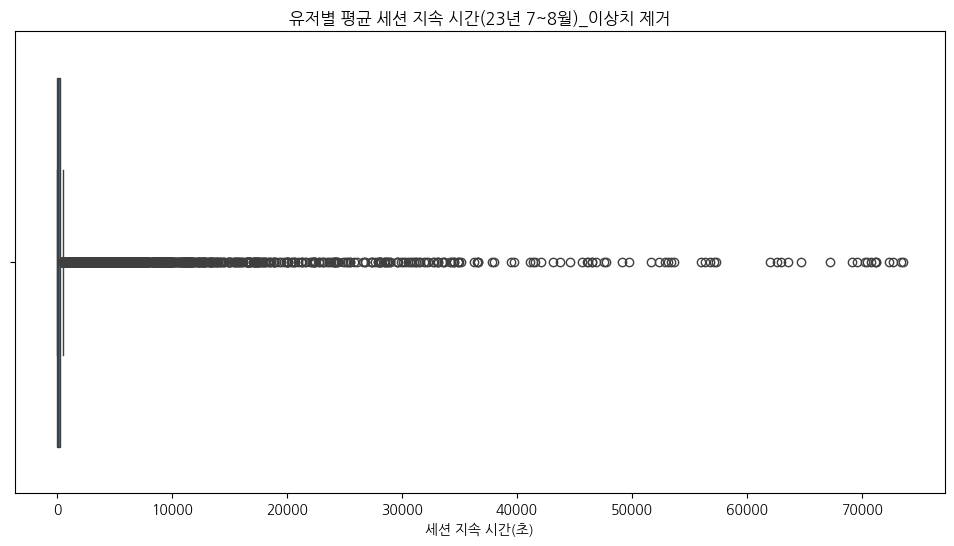

In [155]:
plt.figure(figsize=(12,6))
sns.boxplot(data=avg_duration_df, x='avg_duration_sec')
plt.title('Ïú†Ï†ÄÎ≥Ñ ÌèâÍ∑† ÏÑ∏ÏÖò ÏßÄÏÜç ÏãúÍ∞Ñ(23ÎÖÑ 7~8Ïõî)_Ïù¥ÏÉÅÏπò Ï†úÍ±∞')
plt.xlabel('ÏÑ∏ÏÖò ÏßÄÏÜç ÏãúÍ∞Ñ(Ï¥à)')
plt.show()

In [127]:
# # ÏãúÍ∞ÅÌôî
# plt.figure(figsize=(12,6))
# sns.histplot(data=avg_duration_df[avg_duration_df['avg_duration_sec'] < 60000], # 16ÏãúÍ∞Ñ 
#              x='avg_duration_sec')
# plt.title('Ïú†Ï†ÄÎ≥Ñ ÌèâÍ∑† ÏÑ∏ÏÖò ÏßÄÏÜç ÏãúÍ∞Ñ (16ÏãúÍ∞Ñ ÎØ∏Îßå)_Ïù¥ÏÉÅÏπò Ï†úÍ±∞')
# plt.xlabel('ÏÑ∏ÏÖò ÏßÄÏÜç ÏãúÍ∞Ñ(Ï¥à)')
# plt.show()

### Ïú†Ï†ÄÎ≥Ñ ÏÑ∏ÏÖò Ïåç Í∞úÏàò ÏßëÍ≥Ñ

In [10]:
#  Ïú†Ï†ÄÎ≥Ñ ÏÑ∏ÏÖò Í∞úÏàò Íµ¨ÌïòÍ∏∞
session_counts_df = cleaned_df.groupby('user_id').size().reset_index(name='session_count')
show_df_info(session_counts_df,'session_counts_df')


session_counts_df ÌòïÌÉú:


(116812, 2)


session_counts_df Ï≤´ 5Ìñâ:


user_id  session_count
0  02QVyNBCraNN7i04MPRQVrGbGPR2              1
1  03dEZCajSgbBSj7wPNeXjBp8QnI2              5
2  07JXIRPEnuSSpzQ5cKYrvwrMq3I3              1
3  08g6HjWIPUZttChnM4McJAlbgyl1              1
4  08tcnzqYmaZ81F7s29QPu5PUrP13              1


session_counts_df Ï†ïÎ≥¥:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116812 entries, 0 to 116811
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        116812 non-null  object
 1   session_count  116812 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ MB

session_counts_df ÌÜµÍ≥Ñ ÏöîÏïΩ:


session_count
count  116812.000000
mean        4.157390
std        10.219206
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       283.000000


session_counts_df ÌÜµÍ≥Ñ ÏöîÏïΩ:


user_id
count                         116812
unique                        116812
top     02QVyNBCraNN7i04MPRQVrGbGPR2
freq                               1


session_counts_df Í≤∞Ï∏°Ïπò ÌôïÏù∏:


user_id          0
session_count    0
dtype: int64

In [158]:
# ÏÑ∏ÏÖò Ïåç Í∞úÏàò ÏµúÎåÄÏù∏ Ïú†Ï†Ä ÌÉêÏÉâ
session_counts_df[session_counts_df['session_count'] == 283]

user_id  session_count
48113  1253311            283

In [148]:
matched_df[matched_df['user_id'].isin(['1253311'])].sort_values('session_duration_sec', ascending = False) # ÏµúÎåÄ 6ÏãúÍ∞Ñ 13Î∂Ñ

user_id          start_time            end_time  session_duration_sec  \
391625  1253311 2023-07-20 22:01:36 2023-07-21 04:14:46               22390.0   
391670  1253311 2023-07-24 22:37:07 2023-07-25 03:09:04               16317.0   
391616  1253311 2023-07-20 00:30:57 2023-07-20 04:24:41               14024.0   
391812  1253311 2023-08-04 20:51:49 2023-08-05 00:45:06               13997.0   
391647  1253311 2023-07-23 00:03:50 2023-07-23 03:55:34               13904.0   
...         ...                 ...                 ...                   ...   
391673  1253311 2023-07-25 13:57:49 2023-07-25 13:57:53                   4.0   
391747  1253311 2023-07-31 07:26:05 2023-07-31 07:26:09                   4.0   
391800  1253311 2023-08-03 19:38:01 2023-08-03 19:38:04                   3.0   
391681  1253311 2023-07-25 21:47:45 2023-07-25 21:47:48                   3.0   
391653  1253311 2023-07-23 15:05:37 2023-07-23 15:05:40                   3.0   

       session_flag  
391625      matched  
391670      matched  
391616      matched  
391812      matched  
391647      matched  
...             ...  
391673      matched  
391747      matched  
391800      matched  
391681      matched  
391653      matched  

[283 rows x 5 columns]

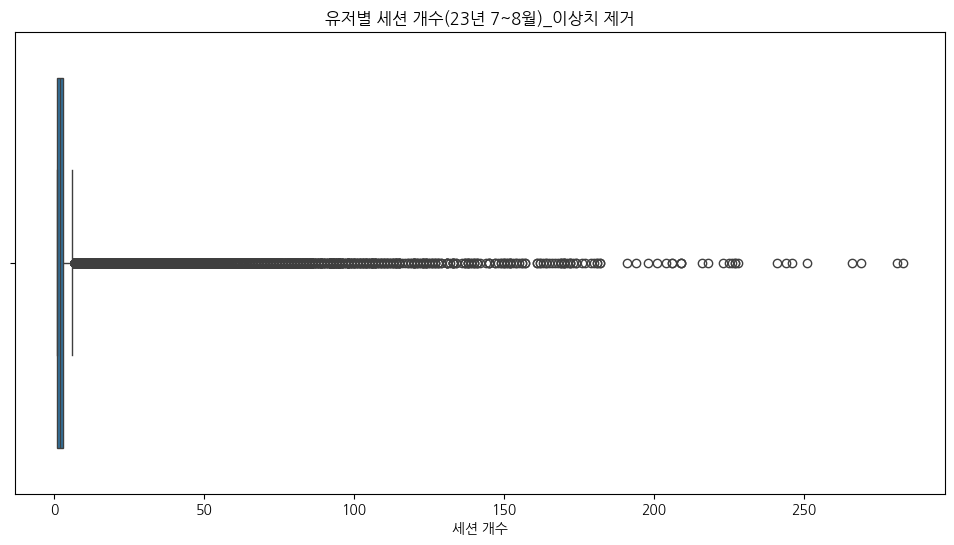

In [160]:
# Î∞ïÏä§ÌîåÎ°Ø
plt.figure(figsize=(12,6))
sns.boxplot(data=session_counts_df, x='session_count')
plt.title('Ïú†Ï†ÄÎ≥Ñ ÏÑ∏ÏÖò Í∞úÏàò(23ÎÖÑ 7~8Ïõî)_Ïù¥ÏÉÅÏπò Ï†úÍ±∞')
plt.xlabel('ÏÑ∏ÏÖò Í∞úÏàò')
plt.show()

In [49]:
# Ïú†Ï†ÄÎ≥Ñ ÌèâÍ∑† ÏÑ∏ÏÖò ÏßÄÏÜç ÏãúÍ∞Ñ + ÏÑ∏ÏÖò Ïåç Í∞úÏàò merge
session_cnt_duration_df = pd.merge(avg_duration_df, session_counts_df, on = 'user_id', how = 'left')
show_df_info(session_cnt_duration_df,'session_cnt_duration_df')


session_cnt_duration_df ÌòïÌÉú:


(116812, 3)


session_cnt_duration_df Ï≤´ 5Ìñâ:


user_id  avg_duration_sec  session_count
0  02QVyNBCraNN7i04MPRQVrGbGPR2               4.0              1
1  03dEZCajSgbBSj7wPNeXjBp8QnI2               2.2              5
2  07JXIRPEnuSSpzQ5cKYrvwrMq3I3               1.0              1
3  08g6HjWIPUZttChnM4McJAlbgyl1             174.0              1
4  08tcnzqYmaZ81F7s29QPu5PUrP13               4.0              1


session_cnt_duration_df Ï†ïÎ≥¥:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116812 entries, 0 to 116811
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           116812 non-null  object 
 1   avg_duration_sec  116812 non-null  float64
 2   session_count     116812 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ MB

session_cnt_duration_df ÌÜµÍ≥Ñ ÏöîÏïΩ:


avg_duration_sec  session_count
count     116812.000000  116812.000000
mean         299.900599       4.157390
std         1625.894811      10.219206
min            1.000000       1.000000
25%           18.000000       1.000000
50%           75.333333       2.000000
75%          231.333333       3.000000
max        73566.000000     283.000000


session_cnt_duration_df ÌÜµÍ≥Ñ ÏöîÏïΩ:


user_id
count                         116812
unique                        116812
top     02QVyNBCraNN7i04MPRQVrGbGPR2
freq                               1


session_cnt_duration_df Í≤∞Ï∏°Ïπò ÌôïÏù∏:


user_id             0
avg_duration_sec    0
session_count       0
dtype: int64

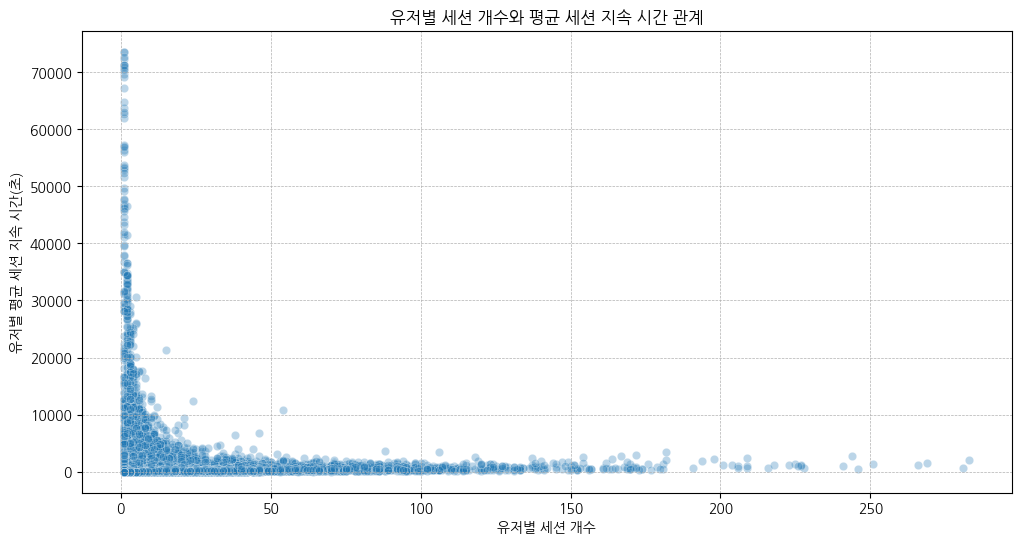

In [162]:
# Ïú†Ï†ÄÎ≥Ñ ÏÑ∏ÏÖò Í∞úÏàòÏôÄ ÌèâÍ∑† ÏÑ∏ÏÖò ÏßÄÏÜç ÏãúÍ∞Ñ Í¥ÄÍ≥Ñ
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=session_cnt_duration_df,
    x='session_count',
    y='avg_duration_sec',
    alpha=0.3
)
plt.xlabel('Ïú†Ï†ÄÎ≥Ñ ÏÑ∏ÏÖò Í∞úÏàò')
plt.ylabel('Ïú†Ï†ÄÎ≥Ñ ÌèâÍ∑† ÏÑ∏ÏÖò ÏßÄÏÜç ÏãúÍ∞Ñ(Ï¥à)')
plt.title('Ïú†Ï†ÄÎ≥Ñ ÏÑ∏ÏÖò Í∞úÏàòÏôÄ ÌèâÍ∑† ÏÑ∏ÏÖò ÏßÄÏÜç ÏãúÍ∞Ñ Í¥ÄÍ≥Ñ')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

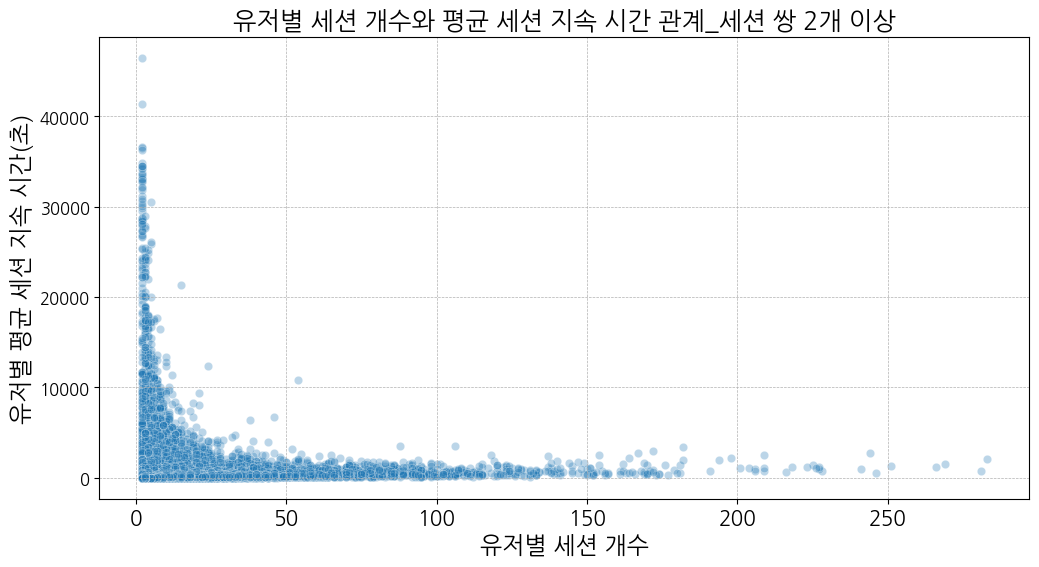

In [21]:
# ÏÑ∏ÏÖò Í∞úÏàòÍ∞Ä 2 Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞Îßå Ï∂îÏ∂ú
filtered_df = session_cnt_duration_df[session_cnt_duration_df['session_count'] >= 2]

# Ïú†Ï†ÄÎ≥Ñ ÏÑ∏ÏÖò Í∞úÏàòÏôÄ ÌèâÍ∑† ÏÑ∏ÏÖò ÏßÄÏÜç ÏãúÍ∞Ñ Í¥ÄÍ≥Ñ
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=filtered_df,
    x='session_count',
    y='avg_duration_sec',
    alpha=0.3
)
plt.xlabel('Ïú†Ï†ÄÎ≥Ñ ÏÑ∏ÏÖò Í∞úÏàò', fontsize = 17)
plt.ylabel('Ïú†Ï†ÄÎ≥Ñ ÌèâÍ∑† ÏÑ∏ÏÖò ÏßÄÏÜç ÏãúÍ∞Ñ(Ï¥à)', fontsize = 17)
plt.title('Ïú†Ï†ÄÎ≥Ñ ÏÑ∏ÏÖò Í∞úÏàòÏôÄ ÌèâÍ∑† ÏÑ∏ÏÖò ÏßÄÏÜç ÏãúÍ∞Ñ Í¥ÄÍ≥Ñ_ÏÑ∏ÏÖò Ïåç 2Í∞ú Ïù¥ÏÉÅ', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 12)
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

In [169]:
show_df_info(filtered_df, 'filtered_df')


filtered_df ÌòïÌÉú:


(58520, 3)


filtered_df Ï≤´ 5Ìñâ:


user_id  avg_duration_sec  session_count
1   03dEZCajSgbBSj7wPNeXjBp8QnI2          2.200000              5
7   0EdWWnQysUhSo2IyRy2PEoCmHfG2        312.142857              7
8   0FjtUACA86Qxiei4xRDuxuw1wco2        466.500000              2
10  0JaxYxyAuNQpxoc5SCkkFvaFcwe2        220.600000              5
11  0L7zluql9iUHjZKdU0xJcF1j1zM2          3.000000              3


filtered_df Ï†ïÎ≥¥:
<class 'pandas.core.frame.DataFrame'>
Index: 58520 entries, 1 to 116804
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           58520 non-null  object 
 1   avg_duration_sec  58520 non-null  float64
 2   session_count     58520 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.8+ MB

filtered_df ÌÜµÍ≥Ñ ÏöîÏïΩ:


avg_duration_sec  session_count
count      58520.000000   58520.000000
mean         376.140957       7.302478
std         1434.584982      13.734521
min            1.000000       2.000000
25%           51.500000       2.000000
50%          133.333333       3.000000
75%          330.443510       6.000000
max        46499.000000     283.000000


filtered_df ÌÜµÍ≥Ñ ÏöîÏïΩ:


user_id
count                          58520
unique                         58520
top     03dEZCajSgbBSj7wPNeXjBp8QnI2
freq                               1


filtered_df Í≤∞Ï∏°Ïπò ÌôïÏù∏:


user_id             0
avg_duration_sec    0
session_count       0
dtype: int64

In [170]:
# ÏµúÎåÄÍ∞í ÌÉêÏÉâ
filtered_df[filtered_df['avg_duration_sec'] == 46499.000000]

user_id  avg_duration_sec  session_count
53267  1284435           46499.0              2

In [171]:
matched_df[matched_df['user_id'] == '1284435']

user_id          start_time            end_time  session_duration_sec  \
434062  1284435 2023-07-24 14:27:57 2023-07-27 12:58:31              253834.0   
434064  1284435 2023-08-01 10:30:18 2023-08-01 17:49:11               26333.0   
434066  1284435 2023-08-05 20:34:40 2023-08-06 15:05:45               66665.0   

       session_flag  
434062      matched  
434064      matched  
434066      matched

In [174]:
final_hackle_df[final_hackle_df['user_id'] == '1284435'].sort_values('event_datetime')

event_id      event_datetime  \
6567285  f7ccc84a-754e-4624-81a2-7459aabcc067 2023-07-21 10:57:43   
6567281  d91dcef9-da04-42b3-a19d-924d0880137a 2023-07-21 10:57:43   
6567276  b3b6fcf1-2aec-44ba-b956-a557cbdce0ca 2023-07-21 10:57:43   
6567270  7a70fcba-c1e3-40ee-83c5-86a6ede966f6 2023-07-21 10:57:47   
6567264  3e3fbdb4-eba0-47a9-b817-087adf74a25f 2023-07-21 10:57:55   
6567256  02426b52-7255-45c5-9c49-c487ca1109ca 2023-07-24 09:47:52   
6567258  0789d60e-03ba-4048-adc5-d6a8486587ae 2023-07-24 09:47:52   
6567267  520b2fe4-13fa-43df-9ca0-4c9a5d383844 2023-07-24 09:47:52   
6567279  c1845835-8c39-49cc-ab05-13342f2c29f7 2023-07-24 14:27:57   
6567269  727ea177-d643-46ed-8f6f-1beeea37d646 2023-07-24 14:27:57   
6567268  5defcb11-4968-49b3-88e4-2cecc8ceebc1 2023-07-25 17:16:21   
6567271  7b027ae7-b290-4338-bb31-1beb23fa3cf7 2023-07-27 12:58:31   
6567287  f9c62db4-bcd9-47cc-bb4b-e33dd0e336a1 2023-07-27 12:58:31   
6567263  3ba6e498-bc3d-4e35-b4f9-60ab81f4a381 2023-07-28 17:13:32   
6567262  2f8cbf30-521a-4048-bad9-7391e7eb3c9a 2023-07-28 17:13:32   
6567259  0a110dae-7877-4101-b6fc-2885d6a3fa2e 2023-07-28 17:13:58   
6567286  f84d540d-7edd-494d-b019-b02f84c5b5d0 2023-07-28 17:14:01   
6567266  4d7a7bdc-20e6-4f18-b79f-6b1752113907 2023-07-28 17:14:03   
6567283  e1a43abd-99f2-4d05-85af-97ea4aecc7d1 2023-07-28 17:14:07   
6567277  b905e3e5-f9e8-4324-8bf0-e2bf6472c8cd 2023-07-28 17:14:07   
6567284  ee404233-a975-41e4-96ef-1da6a1368aa2 2023-08-01 10:30:18   
6567257  04acab0e-d348-4e7b-b311-1fde2ac68cd6 2023-08-01 10:30:18   
6567275  b06567d2-bd2f-45c7-9732-3edc9bf87feb 2023-08-01 17:49:11   
6567265  3ea71494-62c1-4174-8674-578e8261abf7 2023-08-01 17:49:11   
6567261  18c05aeb-82e4-4355-a756-c7353a56353f 2023-08-02 19:52:26   
6567280  c1da0f3b-77c3-44f9-b6a2-27daee159c23 2023-08-02 19:52:26   
6567273  9574de75-e829-4cc2-a291-4e050b9bb4ad 2023-08-05 20:34:40   
6567282  dffd4499-6f1b-4760-83c2-944b85dfa532 2023-08-05 20:34:40   
6567278  b9d6b5db-0de6-4dd8-95c9-9fd509f3ca15 2023-08-06 15:05:45   
6567260  1644f079-e5a1-4e55-94c1-245b9208368f 2023-08-06 15:05:45   
6567274  acf51b8d-cc5c-4c0a-850c-96ef58d4a71d 2023-08-06 18:24:15   
6567272  8a36e7c9-a253-4be3-ae79-856ffbbaaa7c 2023-08-06 18:24:15   

                                 event_key                    session_id  \
6567285                     $session_start  5I2DqPSXovfHbmYzunRZm8qQFnS2   
6567281                       $session_end  5I2DqPSXovfHbmYzunRZm8qQFnS2   
6567276                         launch_app  5I2DqPSXovfHbmYzunRZm8qQFnS2   
6567270                     $session_start  5I2DqPSXovfHbmYzunRZm8qQFnS2   
6567264  click_bottom_navigation_questions  5I2DqPSXovfHbmYzunRZm8qQFnS2   
6567256                       $session_end  5I2DqPSXovfHbmYzunRZm8qQFnS2   
6567258                         launch_app  5I2DqPSXovfHbmYzunRZm8qQFnS2   
6567267                     $session_start  5I2DqPSXovfHbmYzunRZm8qQFnS2   
6567279                     $session_start  5I2DqPSXovfHbmYzunRZm8qQFnS2   
6567269                         launch_app  5I2DqPSXovfHbmYzunRZm8qQFnS2   
6567268                         launch_app  5I2DqPSXovfHbmYzunRZm8qQFnS2   
6567271                         launch_app  5I2DqPSXovfHbmYzunRZm8qQFnS2   
6567287                       $session_end  5I2DqPSXovfHbmYzunRZm8qQFnS2   
6567263                     $session_start  5I2DqPSXovfHbmYzunRZm8qQFnS2   
6567262                         launch_app  5I2DqPSXovfHbmYzunRZm8qQFnS2   
6567259          click_appbar_alarm_center  5I2DqPSXovfHbmYzunRZm8qQFnS2   
6567286          click_appbar_alarm_center  5I2DqPSXovfHbmYzunRZm8qQFnS2   
6567266                click_notice_detail  5I2DqPSXovfHbmYzunRZm8qQFnS2   
6567283   click_bottom_navigation_timeline  5I2DqPSXovfHbmYzunRZm8qQFnS2   
6567277                  view_timeline_tap  5I2DqPSXovfHbmYzunRZm8qQFnS2   
6567284                         launch_app  5I2DqPSXovfHbmYzunRZm8qQFnS2   
6567257                     $session_start  5I2DqPSXovfHbmYzunRZm8qQFnS2   
6567275    

# Í∞ÄÏÑ§ ÌôïÏù∏
- Ïú†Ï†ÄÎ≥Ñ ÏÑ∏ÏÖò Ïåç Í∞úÏàò & ÌèâÍ∑† ÏÑ∏ÏÖò ÏßÄÏÜç ÏãúÍ∞ÑÏóê Îî∞Îùº ÏÑ∏Í∑∏Î®ºÌä∏ Î∂ÑÎ•ò -> Í∞Å ÏÑ∏Í∑∏Î®ºÌä∏ Î≥Ñ Ï£º ÌôúÎèô ÏãúÍ∞ÑÎåÄÏóêÎäî Ï∞®Ïù¥Í∞Ä ÏûàÏùÑ Í≤ÉÏù¥Îã§.
- Ï£º ÌôúÎèô ÏãúÍ∞ÑÎåÄ == session_startÏùò ÏãúÍ∞ÑÎåÄ?
- Ï£º ÌôúÎèô ÏãúÍ∞ÑÎåÄ == session_startÏùò ÏãúÍ∞ÑÎåÄÏùò ÏµúÎπàÍ∞í?
- Ï£º ÌôúÎèô ÏãúÍ∞ÑÎåÄ == start_time, end_timeÏùò ÏãúÍ∞ÑÎåÄ Î™®Îëê ?

In [22]:
show_df_info(session_cnt_duration_df,'session_cnt_duration_df')


session_cnt_duration_df ÌòïÌÉú:


(116812, 3)


session_cnt_duration_df Ï≤´ 5Ìñâ:


user_id  avg_duration_sec  session_count
0  02QVyNBCraNN7i04MPRQVrGbGPR2               4.0              1
1  03dEZCajSgbBSj7wPNeXjBp8QnI2               2.2              5
2  07JXIRPEnuSSpzQ5cKYrvwrMq3I3               1.0              1
3  08g6HjWIPUZttChnM4McJAlbgyl1             174.0              1
4  08tcnzqYmaZ81F7s29QPu5PUrP13               4.0              1


session_cnt_duration_df Ï†ïÎ≥¥:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116812 entries, 0 to 116811
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           116812 non-null  object 
 1   avg_duration_sec  116812 non-null  float64
 2   session_count     116812 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ MB

session_cnt_duration_df ÌÜµÍ≥Ñ ÏöîÏïΩ:


avg_duration_sec  session_count
count     116812.000000  116812.000000
mean         299.900599       4.157390
std         1625.894811      10.219206
min            1.000000       1.000000
25%           18.000000       1.000000
50%           75.333333       2.000000
75%          231.333333       3.000000
max        73566.000000     283.000000


session_cnt_duration_df ÌÜµÍ≥Ñ ÏöîÏïΩ:


user_id
count                         116812
unique                        116812
top     02QVyNBCraNN7i04MPRQVrGbGPR2
freq                               1


session_cnt_duration_df Í≤∞Ï∏°Ïπò ÌôïÏù∏:


user_id             0
avg_duration_sec    0
session_count       0
dtype: int64

## ÌÅ¥Îü¨Ïä§ÌÑ∞ Î∂ÑÏÑù

### EDA for ÌÅ¥Îü¨Ïä§ÌÑ∞ Î∂ÑÏÑù

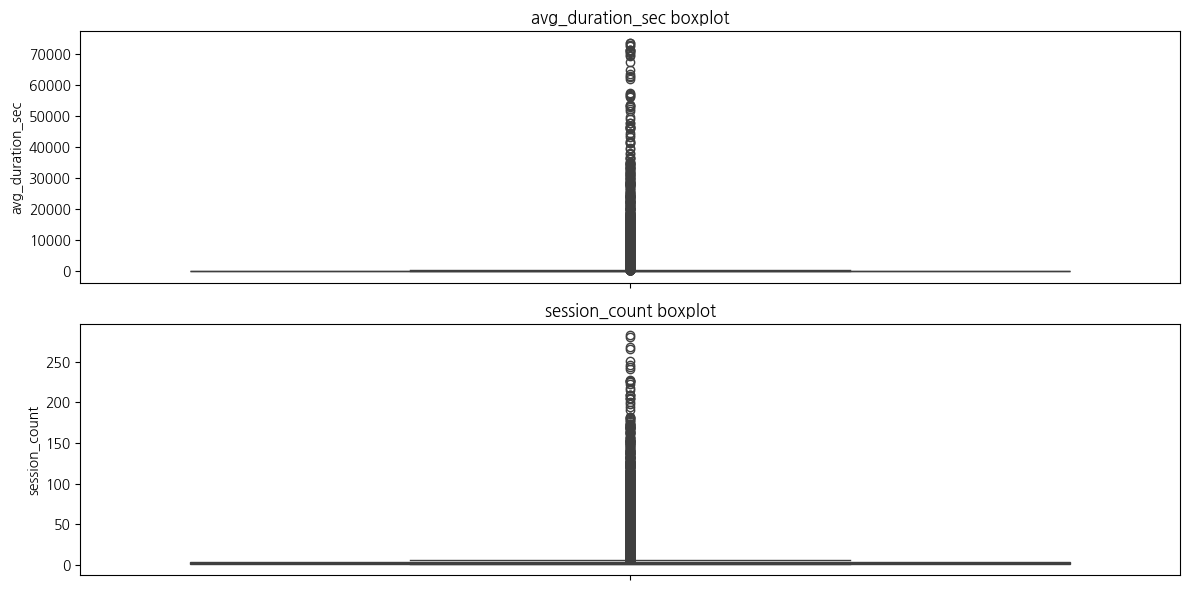

In [26]:
# Ïù¥ÏÉÅÏπò ÌôïÏù∏
fig, axes = plt.subplots(2,1, figsize = (12,6))

i = 0
for col in session_cnt_duration_df.columns[1:]:
    sns.boxplot(session_cnt_duration_df[col], ax = axes.flat[i])
    axes.flat[i].set_title(f'{col} boxplot')
    i += 1

fig.tight_layout()
plt.show()

In [33]:
# Ïù¥ÏÉÅÏπò ÌôïÏù∏ Ìï®Ïàò 
def outliers_idx(df, col):
    q3 = df[col].quantile(0.75)
    q1 = df[col].quantile(0.25)
    
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    outlier_check = (df[col] < lower) | (df[col] > upper)
    return outlier_check

# Ïª¨ÎüºÎ≥Ñ Ïù¥ÏÉÅÏπòÍ∞Ä Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ï∞®ÏßÄÌïòÎäî ÎπÑÏú® ÌôïÏù∏
original_size = session_cnt_duration_df.shape[0]
outlier_list = []

for col in session_cnt_duration_df.columns[1:]:
    outlier_mask = outliers_idx(session_cnt_duration_df, col)
    outlier_cnt = outlier_mask.sum() # Ïù¥ÏÉÅÏπò Í∞úÏàò
    ratio = outlier_cnt / original_size * 100 # Ïù¥ÏÉÅÏπò ÎπÑÏú®

    outlier_list.append(
        {'name' : col,
        'cnt' : outlier_cnt,
        'ratio' : ratio.round(2)}
    )

outlier_df = pd.DataFrame(outlier_list)  # Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò
display(outlier_df.sort_values(by = 'ratio', ascending = False))
outlier_df['ratio'].describe()

name    cnt  ratio
1     session_count  13909  11.91
0  avg_duration_sec  12115  10.37

count     2.000000
mean     11.140000
std       1.088944
min      10.370000
25%      10.755000
50%      11.140000
75%      11.525000
max      11.910000
Name: ratio, dtype: float64

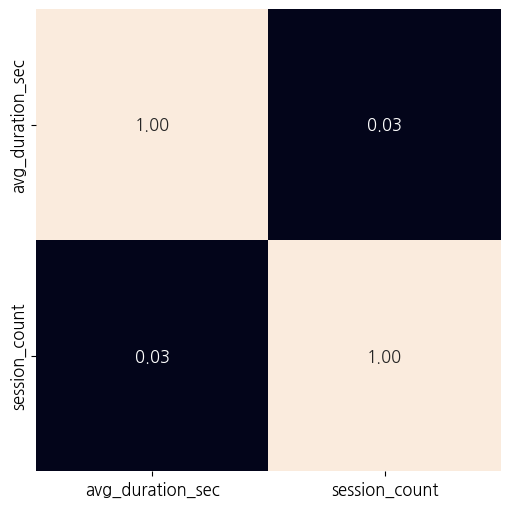

In [32]:
# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌôïÏù∏
plt.figure(figsize = (6,6))
sns.heatmap(session_cnt_duration_df.drop(columns = 'user_id').corr(), annot = True, annot_kws = {'size': 12},fmt = '.2f', cbar = False)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

### Ïä§ÏºÄÏùºÎü¨ Ï†ÅÏö©

In [50]:
# Í∞Å Î≥ÄÏàòÏóêÏÑú Ïù¥ÏÉÅÏπò ÎπÑÏú®Ïù¥ ÎÜíÏùå => Robust Scaler
# Î≥ÄÏàò Í∞Ñ Ïä§ÏºÄÏùº Ï∞®Ïù¥ ÌÅº => Standard Scaler

data = session_cnt_duration_df.drop(columns = 'user_id')
#numeric_cols = data.columns[(data.dtypes == 'int64') | (data.dtypes == 'float64')].to_list()

rs = RobustScaler()
ss = StandardScaler()

# RobustScaler Ï†ÅÏö©
rs_scaled_df = pd.DataFrame(rs.fit_transform(data), columns = data.columns)
display(rs_scaled_df.head())

# StandardScaler Ï†ÅÏö©
ss_scaled_df =  pd.DataFrame(ss.fit_transform(data), columns = data.columns)
display(ss_scaled_df.head())

avg_duration_sec  session_count
0         -0.334375           -0.5
1         -0.342812            1.5
2         -0.348437           -0.5
3          0.462500           -0.5
4         -0.334375           -0.5

avg_duration_sec  session_count
0         -0.181993      -0.308968
1         -0.183100       0.082454
2         -0.183838      -0.308968
3         -0.077435      -0.308968
4         -0.181993      -0.308968

### Î°úÍ∑∏Î≥ÄÌôò + Ïä§ÏºÄÏùºÎü¨ Ï†ÅÏö©

In [51]:
# Î°úÍ∑∏ Î≥ÄÌôò
log_transformed_df = np.log1p(session_cnt_duration_df[['session_count', 'avg_duration_sec']])

# Robust Scaler Ï†ÅÏö©
rs = RobustScaler()
rs_scaled_log_df = pd.DataFrame(rs.fit_transform(log_transformed_df), columns=log_transformed_df.columns)
display(rs_scaled_log_df.head())

# StandardScaler Ï†ÅÏö©
ss = StandardScaler()
ss_scaled_log_df =  pd.DataFrame(ss.fit_transform(log_transformed_df), columns = log_transformed_df.columns)
display(ss_scaled_log_df.head())

session_count  avg_duration_sec
0      -0.584963         -1.088643
1       1.000000         -1.266891
2      -0.584963         -1.454612
3      -0.584963          0.331376
4      -0.584963         -1.088643

session_count  avg_duration_sec
0      -0.684210         -1.413439
1       0.825645         -1.660875
2      -0.684210         -1.921461
3      -0.684210          0.557763
4      -0.684210         -1.413439

### KMEANS
- PCAÎäî Ï†ÅÏö© x (Î≥ÄÏàò 2Í∞úÎ°ú Í∞ÑÎã®Ìï®/ ÏùòÎØ∏Í∞Ä Í≤πÏπòÏßÄÎèÑ ÏïäÏùå)

In [13]:
# Í≤ΩÍ≥†Î©îÏãúÏßÄ Ï≤òÎ¶¨
os.environ['OMP_NUM_THREADS'] = '1'

In [14]:
# ÏóòÎ≥¥Ïö∞ Í∏∞Î≤ï, Ïã§Î£®Ïó£ Ï†êÏàòÎ°ú Ï†ÅÏ†àÌïú Íµ∞Ïßë Ïàò Ï∞æÍ∏∞
def elbow_silouette(df, max_range, title_el, title_sil):
    
    # ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Î∞è inertias, Ïã§Î£®Ïó£ Ï†êÏàò Í≥ÑÏÇ∞ 
    inertias = []
    sil_scores = []
    
    for k in range(1,max_range+1):
        km = KMeans(n_clusters = k, random_state = 42)
        km.fit(df)
        inertias.append(km.inertia_) # inertiasÏóê Ï†ÄÏû•

        if k >= 2: # Ïã§Î£®Ïó£ Ï†êÏàòÎäî k >=2 Ïùº Îïå Í∞ÄÎä•
            labels = km.predict(df)
            score = silhouette_score(df, labels, sample_size=5000, random_state = 42)
            sil_scores.append(score) # silhouette_scoresÏóê Ï†ÄÏû•
        
    # ÏóòÎ≥¥Ïö∞ Í∏∞Î≤ï - kÍ∞íÏóê Îî∞Î•∏ inertiaÍ∞í ÏãúÍ∞ÅÌôî
    fig, ax = plt.subplots(1,2, figsize = (10,5))
    
    sns.lineplot(x = range(1, max_range+1), y = inertias, marker='o', ax = ax[0])
    ax[0].set_title(title_el)
    ax[0].set_xlabel('n-clusters')
    ax[0].set_ylabel('inertia')
    ax[0].grid()
    
    # kÍ∞íÏóê Îî∞Î•∏ Ïã§Î£®Ïó£ Ï†êÏàò ÏãúÍ∞ÅÌôî
    sns.lineplot(x = range(2, max_range+1), y = sil_scores, marker = 'o', ax = ax[1])
    ax[1].set_title(title_sil)
    ax[1].set_xlabel('n_clusters')
    ax[1].set_ylabel('Silhouette Score')
    ax[1].grid()

    plt.tight_layout()
    plt.show()

    return df, inertias, sil_scores


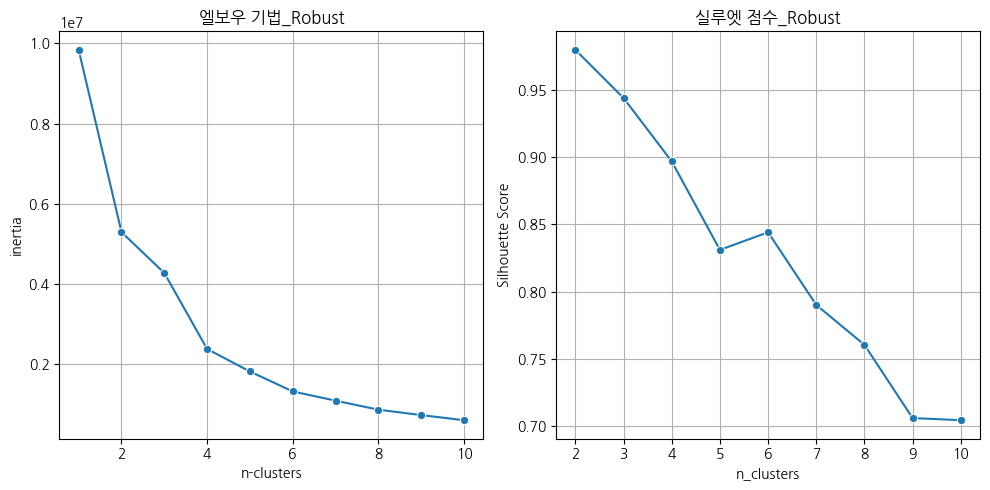

avg_duration_sec  session_count
0              -0.334375           -0.5
1              -0.342812            1.5
2              -0.348437           -0.5
3               0.462500           -0.5
4              -0.334375           -0.5
...                  ...            ...
116807          0.710938           -0.5
116808         -0.348437           -0.5
116809         -0.343750           -0.5
116810         -0.343750           -0.5
116811         -0.348437           -0.5

[116812 rows x 2 columns]

[9834727.800306479, 5295516.889189073, 4278435.260866721, 2384681.1038251165, 1823992.8544536326, 1327725.6862337529, 1097177.0420011128, 873272.2968798628, 738252.8445619792, 610753.1858159415]
[0.9797680273071172, 0.9439570880883422, 0.8968254014550967, 0.8310771798417927, 0.8441569255732269, 0.7901669426341035, 0.7604910667687554, 0.7060504060190584, 0.7044418315075988]


In [15]:
# robust Ï†ÅÏö© Î≤ÑÏ†Ñ
rs_scaled_df_test, inertias, sil_scores = elbow_silouette(rs_scaled_df, 10, 'ÏóòÎ≥¥Ïö∞ Í∏∞Î≤ï_Robust', 'Ïã§Î£®Ïó£ Ï†êÏàò_Robust')
display(rs_scaled_df_test)
print(inertias)
print(sil_scores)

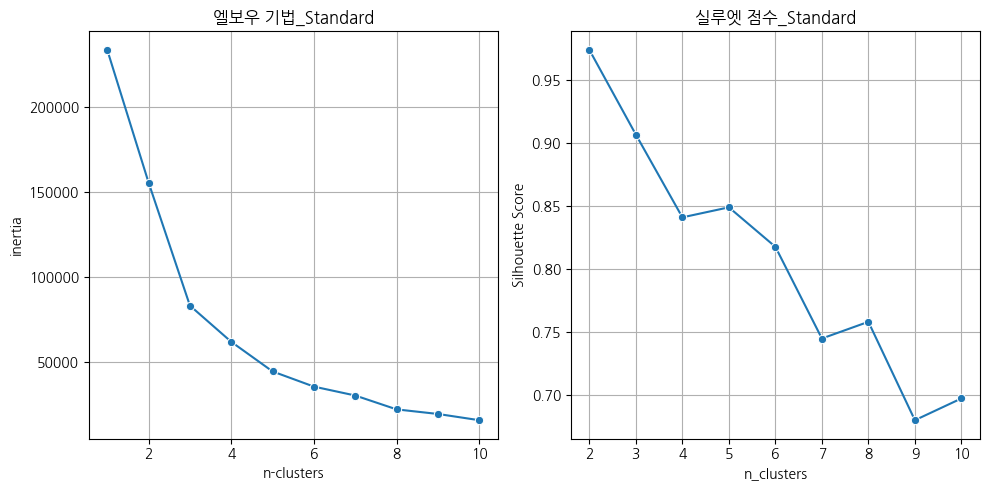

avg_duration_sec  session_count
0              -0.181993      -0.308968
1              -0.183100       0.082454
2              -0.183838      -0.308968
3              -0.077435      -0.308968
4              -0.181993      -0.308968
...                  ...            ...
116807         -0.044837      -0.308968
116808         -0.183838      -0.308968
116809         -0.183223      -0.308968
116810         -0.183223      -0.308968
116811         -0.183838      -0.308968

[116812 rows x 2 columns]

[233623.9999999862, 155472.0111956268, 83013.26797377861, 61700.24550105806, 44254.60914625593, 35318.28114787028, 30076.841963899657, 21907.918212071527, 19209.251450654825, 15536.57665112536]
[0.9738584190150088, 0.906576576650023, 0.8408956380821637, 0.8488578190075439, 0.817515271318164, 0.7447184492791199, 0.7579673746912897, 0.6798468179936974, 0.6971332975971263]


In [16]:
# standard Ï†ÅÏö© Î≤ÑÏ†Ñ
ss_scaled_df_test, inertias, sil_scores = elbow_silouette(ss_scaled_df, 10, 'ÏóòÎ≥¥Ïö∞ Í∏∞Î≤ï_Standard', 'Ïã§Î£®Ïó£ Ï†êÏàò_Standard')
display(ss_scaled_df_test)
print(inertias)
print(sil_scores)

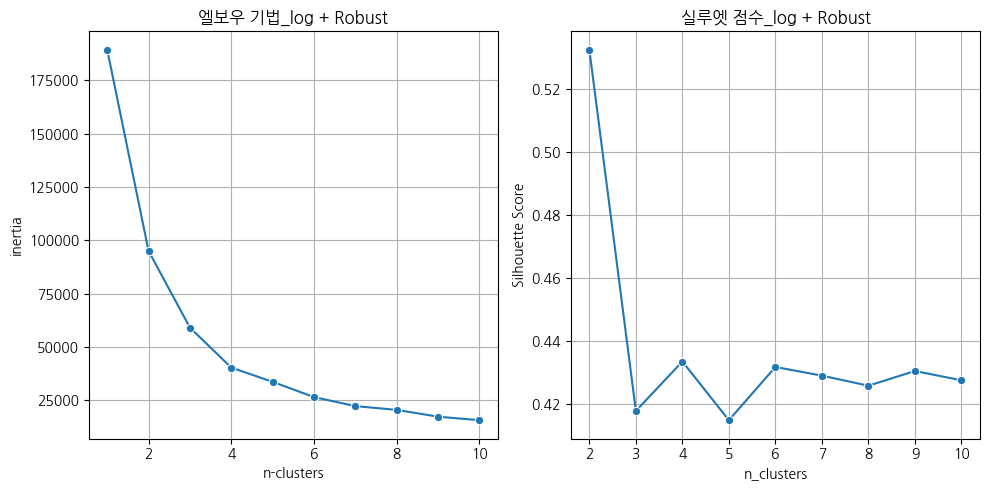

session_count  avg_duration_sec
0           -0.584963         -1.088643
1            1.000000         -1.266891
2           -0.584963         -1.454612
3           -0.584963          0.331376
4           -0.584963         -1.088643
...               ...               ...
116807      -0.584963          0.437042
116808      -0.584963         -1.454612
116809      -0.584963         -1.292668
116810      -0.584963         -1.292668
116811      -0.584963         -1.454612

[116812 rows x 2 columns]

[189342.29950499904, 94958.24980902098, 59011.667568728175, 40265.88005216252, 33581.28052800578, 26430.08965549073, 22185.8423018108, 20417.784741851792, 17237.6300197728, 15570.924967514316]
[0.5324666067563717, 0.4177725933313544, 0.43347185927026055, 0.41482653847571094, 0.43173602075075723, 0.4289875661789656, 0.42578205362363014, 0.430455480987903, 0.4275082348958085]


In [18]:
# Î°úÍ∑∏ Î≥ÄÌôò + robust Ï†ÅÏö© Î≤ÑÏ†Ñ
rs_scaled_log_df_test, inertias, sil_scores = elbow_silouette(rs_scaled_log_df, 10, 'ÏóòÎ≥¥Ïö∞ Í∏∞Î≤ï_log + Robust', 'Ïã§Î£®Ïó£ Ï†êÏàò_log + Robust')
display(rs_scaled_log_df_test)
print(inertias)
print(sil_scores)

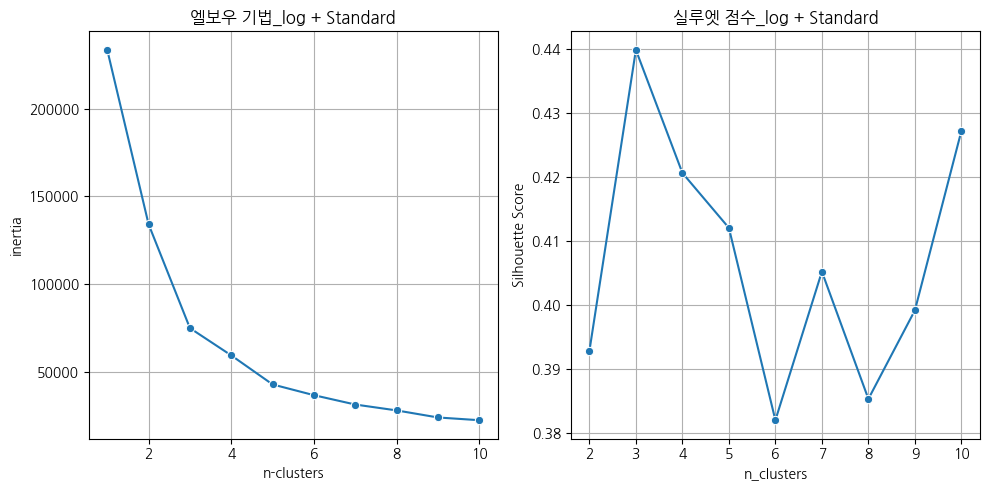

session_count  avg_duration_sec
0           -0.684210         -1.413439
1            0.825645         -1.660875
2           -0.684210         -1.921461
3           -0.684210          0.557763
4           -0.684210         -1.413439
...               ...               ...
116807      -0.684210          0.704444
116808      -0.684210         -1.921461
116809      -0.684210         -1.696658
116810      -0.684210         -1.696658
116811      -0.684210         -1.921461

[116812 rows x 2 columns]

[233624.0000000106, 134128.32300004756, 74883.42443243344, 59310.045307407134, 42737.7829358968, 36608.092546963744, 31271.73370802588, 27919.795211647346, 23893.06496071856, 22331.40959655031]
[0.39280403578133066, 0.43984327126804457, 0.42063012523275595, 0.41204785175616415, 0.38201492786264535, 0.4052167597596361, 0.3853376789563592, 0.39917590291044847, 0.42719513231651207]


In [19]:
# Î°úÍ∑∏ Î≥ÄÌôò + standard Ï†ÅÏö© Î≤ÑÏ†Ñ
ss_scaled_log_df_test, inertias, sil_scores = elbow_silouette(ss_scaled_log_df, 10, 'ÏóòÎ≥¥Ïö∞ Í∏∞Î≤ï_log + Standard', 'Ïã§Î£®Ïó£ Ï†êÏàò_log + Standard')
display(ss_scaled_log_df_test)
print(inertias)
print(sil_scores)

- Î°úÍ∑∏ Î≥ÄÌôò + Ïä§ÏºÄÏùºÎßÅ Ï†ÅÏö© Ìïú Í≤ΩÏö∞ÏóêÎäî, Î°úÍ∑∏ Î≥ÄÌôò Ï†ÅÏö©ÌïòÏßÄ ÏïäÏùÄ Í≤ΩÏö∞Î≥¥Îã§ Ïã§Î£®Ïó£ Ï†êÏàòÍ∞Ä Ìôï ÎÇÆÏïÑÏßê!
- Î°úÍ∑∏ Î≥ÄÌôò Ï†ÅÏö© ÏïàÌïú Í≤ΩÏö∞ Ï§ë, Robust Ïä§ÏºÄÏùºÎßÅÏù¥ Standard Ïä§ÏºÄÏùºÎßÅÎ≥¥Îã§ Ïã§Î£®Ïó£ Ï†êÏàòÍ∞Ä ÎÜíÏùå
- Í∞ÄÏû• Ï†êÏàò ÎÜíÏùÄ Í±¥ K = 2Ïùº ÎïåÏßÄÎßå, Í∑∏Îüº ÌÅ¥Îü¨Ïä§ÌÑ∞Í∞Ä ÎÑàÎ¨¥ Ï†ÅÏñ¥ÏÑú Ï†ÅÌï©ÌïòÏßÄ ÏïäÎã§Í≥† ÌåêÎã®
- Í∑∏ Îã§ÏùåÏúºÎ°ú ÎÜíÏùÄ Ï†êÏàòÏù∏ k = 3 Ïö∞ÏÑ† Ï†ÅÏö© -> k=4ÍπåÏßÄÎèÑ ÏãúÎèÑÌï¥Î≥ºÎßåÌï®

In [24]:
# KMeans (k = 3)
kmeans = KMeans(n_clusters=2, random_state=42)
# robust Î≤ÑÏ†Ñ
kmeans.fit(rs_scaled_df)
predict = kmeans.predict(rs_scaled_df)
session_cnt_duration_df['cluster'] = predict


# ÌôïÏù∏
display(session_cnt_duration_df)


user_id  avg_duration_sec  session_count  cluster
0       02QVyNBCraNN7i04MPRQVrGbGPR2               4.0              1        0
1       03dEZCajSgbBSj7wPNeXjBp8QnI2               2.2              5        0
2       07JXIRPEnuSSpzQ5cKYrvwrMq3I3               1.0              1        0
3       08g6HjWIPUZttChnM4McJAlbgyl1             174.0              1        0
4       08tcnzqYmaZ81F7s29QPu5PUrP13               4.0              1        0
...                              ...               ...            ...      ...
116807  zkGvpRUY1sRXZXNW3QfF8b9M6U93             227.0              1        0
116808  zlRu2eL7juSaImYcPIQiN0U4RSg2               1.0              1        0
116809  zpax5JqWpSW5WNHCMbediX7KfxZ2               2.0              1        0
116810  zrbn6Jt89dPg02zWzvUkpvYAoDD3               2.0              1        0
116811  zsalFOpLioX5cdt1rQrLpvTZyIB2               1.0              1        0

[116812 rows x 4 columns]

count
cluster        
0        116601
1           211

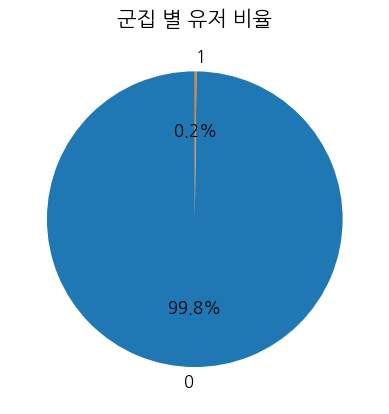

In [25]:
# Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Í≥†Í∞ù Î∂ÑÌè¨
cluster_df = session_cnt_duration_df['cluster'].value_counts().to_frame()
display(cluster_df)

# ÏãúÍ∞ÅÌôî
plt.pie(data = cluster_df, labels = cluster_df.index, x = 'count', autopct='%1.1f%%', startangle = 90, textprops = {'size': 12})
plt.title('Íµ∞Ïßë Î≥Ñ Ïú†Ï†Ä ÎπÑÏú®', fontsize = 15)
plt.show()

- k = 2 ~ 4 Î™®Îëê ÌÅ¥Îü¨Ïä§ÌÑ∞ 0Ïóê Ïã¨Í∞ÅÌïòÍ≤å ÎßéÏùå // Î∂àÍ∑†Ìòï! ÌÅ¥Îü¨Ïä§ÌÑ∞Í∞Ä Ïûò ÎÇòÎàÑÏñ¥ÏßÄÏßÄ ÏïäÏùå
- KMeansÎäî Ï†ÅÌï©ÌïòÏßÄ ÏïäÏùå
- GMM ÏãúÎèÑÌï¥Î≥¥Í∏∞

### GMM

In [52]:
# AIC, BIC Ï†êÏàò Í≥ÑÏÇ∞Ìï¥ÏÑú kÍ∞í Ï∞æÍ∏∞

def gmm_aic_bic_plot(rs_df, ss_df, max_k):
    # AIC, BIC Í∞í Ï†ÄÏû• Î¶¨Ïä§Ìä∏
    results = {
        'Robust' : {'aic': [], 'bic' : []},
        'Standard' : {'aic': [], 'bic' : []}
    }


    for k in range(1,max_k + 1):
        # robust Ï†ÅÏö©Ìïú Í≤ΩÏö∞
        gmm_rs = GaussianMixture(n_components = k, random_state = 24)
        gmm_rs.fit(rs_df)
        results['Robust']['aic'].append(gmm_rs.aic(rs_df))
        results['Robust']['bic'].append(gmm_rs.bic(rs_df))
        
        # standard Ï†ÅÏö©Ìïú Í≤ΩÏö∞
        gmm_ss= GaussianMixture(n_components = k, random_state = 24)
        gmm_ss.fit(ss_df)
        results['Standard']['aic'].append(gmm_ss.aic(ss_df))
        results['Standard']['bic'].append(gmm_ss.bic(ss_df))


    # ÏãúÍ∞ÅÌôî
    fig, axes = plt.subplots(1,2,figsize = (12,6))
    scaler_titles = ['Robust','Standard']

    for i, scaler in enumerate(scaler_titles):
        ax = axes[i]
        sns.lineplot(x = range(1,max_k + 1), y = results[scaler]["aic"], label="AIC", marker='o', ax=ax)
        sns.lineplot(x = range(1,max_k + 1), y = results[scaler]["bic"], label="BIC", marker='o', ax=ax)
        ax.set_title(f'{scaler} Ïä§ÏºÄÏùºÎü¨')
        ax.set_xlabel('Íµ∞Ïßë Í∞úÏàò')
        ax.set_ylabel('Ï†êÏàò')
        ax.grid()

    fig.suptitle('GMM AIC & BIC Ï†êÏàò ÎπÑÍµê')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return results

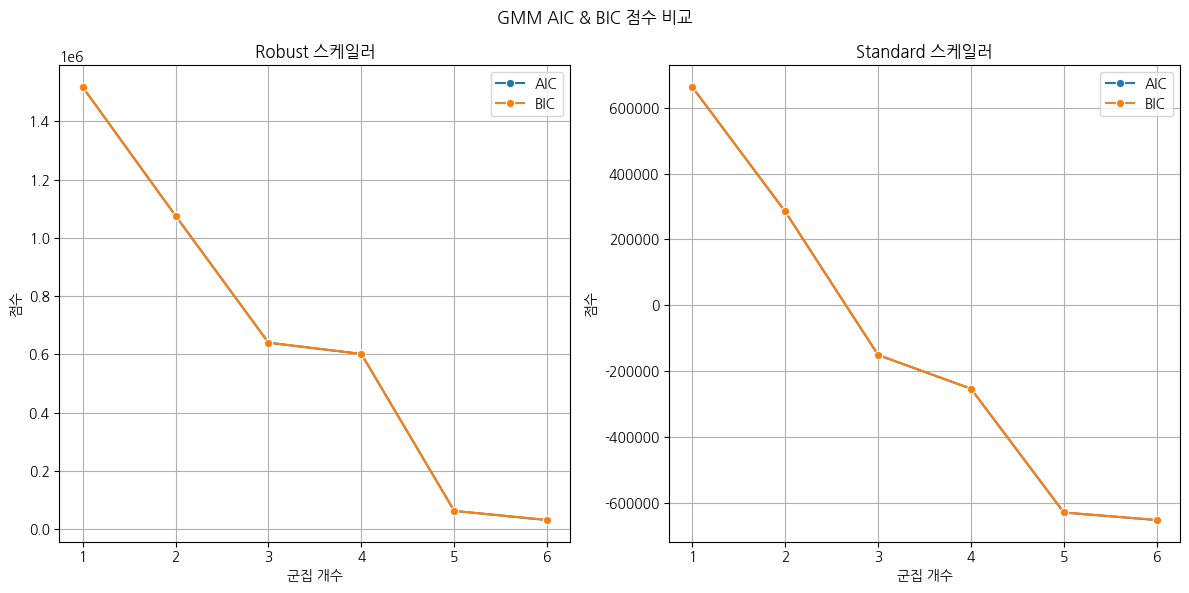

In [53]:
# Î°úÍ∑∏ Î≥ÄÌôò Ï†ÅÏö© ÏïàÌïú Î≤ÑÏ†Ñ
results_nolog = gmm_aic_bic_plot(rs_scaled_df, ss_scaled_df, max_k=6)

In [37]:
results_nolog

{'Robust': {'aic': [1518426.2848790367,
   1076398.2806312,
   640502.961795312,
   601768.0567728565,
   62838.263561442676,
   31425.52583056958],
  'bic': [1518474.6264844558,
   1076504.632163122,
   640667.3232537371,
   601990.4281577845,
   63118.6448728736,
   31763.91706850345]},
 'Standard': {'aic': [662878.6329199733,
   284720.8562136957,
   -151259.98635102808,
   -253839.81340382365,
   -629950.9629660194,
   -652845.5222858051],
  'bic': [662926.9745253925,
   284827.2077456178,
   -151095.62489260305,
   -253617.44201889567,
   -629670.5816545885,
   -652507.1310478712]}}

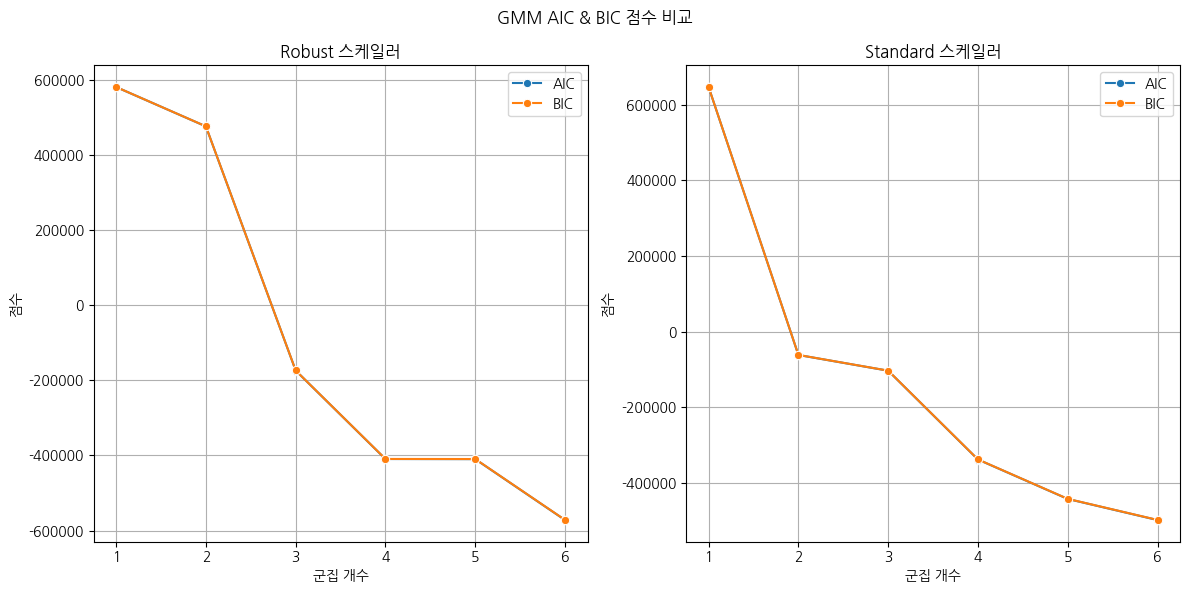

In [38]:
# Î°úÍ∑∏ Î≥ÄÌôò Ï†ÅÏö©Ìïú Î≤ÑÏ†Ñ
results_log = gmm_aic_bic_plot(rs_scaled_log_df, ss_scaled_log_df, max_k=6)

In [39]:
results_log

{'Robust': {'aic': [581531.6688576853,
   476641.2169599813,
   -173796.28902986305,
   -409575.0154912306,
   -409851.8748289682,
   -572164.9637467678],
  'bic': [581580.0104631045,
   476747.56849190337,
   -173631.92757143802,
   -409352.64410630264,
   -409571.49351753725,
   -571826.572508834]},
 'Standard': {'aic': [646812.4031688896,
   -61237.948444409325,
   -102828.65002072083,
   -337484.08298571245,
   -441697.90843468567,
   -497447.003951407],
  'bic': [646860.7447743088,
   -61131.59691248725,
   -102664.28856229581,
   -337261.7116007845,
   -441417.5271232547,
   -497108.6127134731]}}

- aic, bicÎäî ÏûëÏùÑ ÏàòÎ°ù Ï¢ãÏùå! -> Î°úÍ∑∏ Î≥ÄÌôò ÌïúÍ≤å Îçî Ï¢ãÎã§
- Î°úÍ∑∏ Î≥ÄÌôò Ìïú Í≤É Ï§ëÏóêÎäî Robust Ïä§ÏºÄÏùºÎü¨ Ï†ÅÏö©Ìïú Í≤å Îçî ÏûëÏùÄ Ïà´Ïûê 
- Î°úÍ∑∏ Î≥ÄÌôò & Robust Ïä§ÏºÄÏùºÎü¨ Ï†ÅÏö©ÌïòÏó¨ GMM ÏãúÌñâ
- k = 3 or 4 Ï†ïÎèÑÍ∞Ä Ï¢ãÏùÑ Í≤ÉÏù¥Îùº ÏòàÏÉÅ
- Ïö∞ÏÑ† k = 3 ~ 6ÍπåÏßÄ ÌÖåÏä§Ìä∏

In [57]:
# k = 3~6ÍπåÏßÄ Íµ∞ÏßëÎ≥Ñ ÎπÑÏú®, ÏãúÍ∞ÅÌôî, ÌÜµÍ≥Ñ Îì± ÌôïÏù∏ 
def plot_gmm_cluster_summary(scaled_df, k_range, original_df):
    """
    GMM ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùÑ Ïó¨Îü¨ kÍ∞íÏóê ÎåÄÌï¥ ÏàòÌñâÌïòÍ≥†,
    Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò ÎπÑÏú®, ÌèâÍ∑†, ÌÜµÍ≥Ñ ÏöîÏïΩ(describe), ÏãúÍ∞ÅÌôîÎ•º Ï∂úÎ†•Ìï®.

    Parameters:
    - scaled_df: Ïä§ÏºÄÏùºÎßÅÎêú ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞
    - k_range: range(3, 7)Ï≤òÎüº ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàò Î≤îÏúÑ
    - original_df: ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ (Ìï¥ÏÑùÏùÑ ÏúÑÌï¥ ÏÇ¨Ïö©)
    """

    for k in k_range:
        print(f"\n====================  k = {k}  ====================\n")
        gmm = GaussianMixture(n_components=k, random_state=24)
        clusters = gmm.fit_predict(scaled_df)

        # Íµ∞Ïßë Î∂ÑÌè¨
        cluster_counts = pd.Series(clusters).value_counts().sort_index()
        cluster_ratio = (cluster_counts / cluster_counts.sum() * 100).round(2)

        print("üìå Íµ∞ÏßëÎ≥Ñ Í∞úÏàò:")
        print(cluster_counts)
        print("\nüìå Íµ∞ÏßëÎ≥Ñ ÎπÑÏú® (%):")
        print(cluster_ratio)

        # ÏãúÍ∞ÅÌôî
        plt.figure(figsize=(6, 4))
        sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
        plt.title(f'Cluster Size Distribution (k={k})')
        plt.xlabel('Cluster')
        plt.ylabel('Count')
        plt.grid(True)
        plt.show()

        # Íµ∞ÏßëÎ≥Ñ ÌèâÍ∑† + describe
        temp_df = original_df.copy()
        temp_df['cluster'] = clusters

        # print("\nüìå Íµ∞ÏßëÎ≥Ñ ÌèâÍ∑†Í∞í:")
        # display(temp_df.groupby('cluster').mean().round(2))

        print("üìå Íµ∞ÏßëÎ≥Ñ ÌÜµÍ≥Ñ ÏöîÏïΩ:")
        display(temp_df.groupby('cluster').describe().round(2))



====================  k = 3  ====================



üìå Íµ∞ÏßëÎ≥Ñ Í∞úÏàò:
0    58292
1    38557
2    19963
Name: count, dtype: int64

üìå Íµ∞ÏßëÎ≥Ñ ÎπÑÏú® (%):
0    49.90
1    33.01
2    17.09
Name: count, dtype: float64


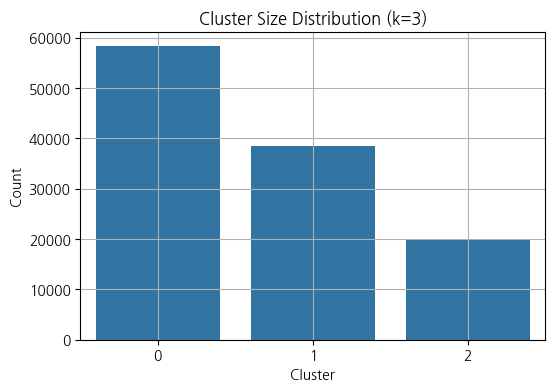

üìå Íµ∞ÏßëÎ≥Ñ ÌÜµÍ≥Ñ ÏöîÏïΩ:


avg_duration_sec                                              \
                   count    mean      std  min   25%     50%     75%   
cluster                                                                
0                58292.0  223.36  1794.35  1.0   7.0   32.00  123.00   
1                38557.0  356.98  1638.92  1.0  39.5  101.67  276.00   
2                19963.0  413.15   918.17  1.0  93.4  204.00  400.15   

                  session_count                                            
              max         count   mean    std  min  25%  50%   75%    max  
cluster                                                                    
0        73566.00       58292.0   1.00   0.00  1.0  1.0  1.0   1.0    1.0  
1        46499.00       38557.0   2.57   0.74  2.0  2.0  2.0   3.0    5.0  
2        21301.33       19963.0  16.44  20.62  5.0  6.0  9.0  18.0  283.0


====================  k = 4  ====================

üìå Íµ∞ÏßëÎ≥Ñ Í∞úÏàò:
0    24516
1    22340
2    11664
3    58292
Name: count, dtype: int64

üìå Íµ∞ÏßëÎ≥Ñ ÎπÑÏú® (%):
0    20.99
1    19.12
2     9.99
3    49.90
Name: count, dtype: float64


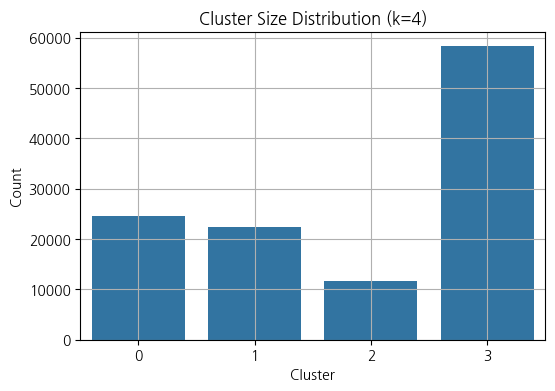

üìå Íµ∞ÏßëÎ≥Ñ ÌÜµÍ≥Ñ ÏöîÏïΩ:


avg_duration_sec                                                \
                   count    mean      std  min     25%     50%     75%   
cluster                                                                  
0                24516.0  424.58  1481.62  1.0   60.00  144.33  351.52   
1                22340.0  316.47  1653.03  1.0   32.00   85.50  234.50   
2                11664.0  388.62   682.83  1.1  105.47  222.91  408.65   
3                58292.0  223.36  1794.35  1.0    7.00   32.00  123.00   

                  session_count                                              
              max         count   mean    std  min   25%   50%   75%    max  
cluster                                                                      
0        30533.40       24516.0   4.22   1.37  3.0   3.0   4.0   5.0   11.0  
1        46499.00       22340.0   2.00   0.00  2.0   2.0   2.0   2.0    2.0  
2        21301.33       11664.0  23.94  24.33  8.0  10.0  15.0  27.0  283.0  
3        73566.00       58292.0   1.00   0.00  1.0   1.0   1.0   1.0    1.0


====================  k = 5  ====================

üìå Íµ∞ÏßëÎ≥Ñ Í∞úÏàò:
0    22340
1    24585
2    11595
3    58292
Name: count, dtype: int64

üìå Íµ∞ÏßëÎ≥Ñ ÎπÑÏú® (%):
0    19.12
1    21.05
2     9.93
3    49.90
Name: count, dtype: float64


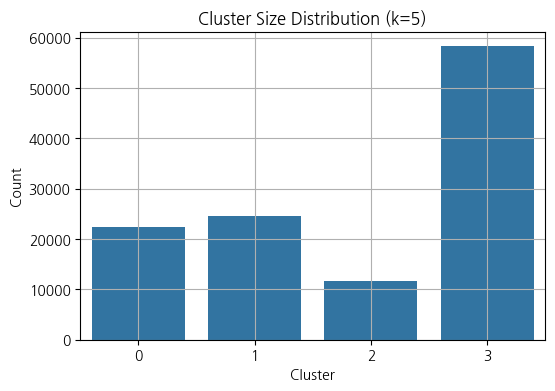

üìå Íµ∞ÏßëÎ≥Ñ ÌÜµÍ≥Ñ ÏöîÏïΩ:


avg_duration_sec                                                \
                   count    mean      std  min     25%     50%     75%   
cluster                                                                  
0                22340.0  316.47  1653.03  1.0   32.00   85.50  234.50   
1                24585.0  425.14  1480.24  1.0   60.00  144.75  354.50   
2                11595.0  387.22   681.57  1.1  105.13  222.00  405.24   
3                58292.0  223.36  1794.35  1.0    7.00   32.00  123.00   

                  session_count                                              
              max         count   mean    std  min   25%   50%   75%    max  
cluster                                                                      
0        46499.00       22340.0   2.00   0.00  2.0   2.0   2.0   2.0    2.0  
1        30533.40       24585.0   4.23   1.39  3.0   3.0   4.0   5.0   11.0  
2        21301.33       11595.0  24.03  24.37  8.0  10.0  15.0  27.0  283.0  
3        73566.00       58292.0   1.00   0.00  1.0   1.0   1.0   1.0    1.0


====================  k = 6  ====================

üìå Íµ∞ÏßëÎ≥Ñ Í∞úÏàò:
0     5767
1    11691
2     8341
3    22340
4    58292
5    10381
Name: count, dtype: int64

üìå Íµ∞ÏßëÎ≥Ñ ÎπÑÏú® (%):
0     4.94
1    10.01
2     7.14
3    19.12
4    49.90
5     8.89
Name: count, dtype: float64


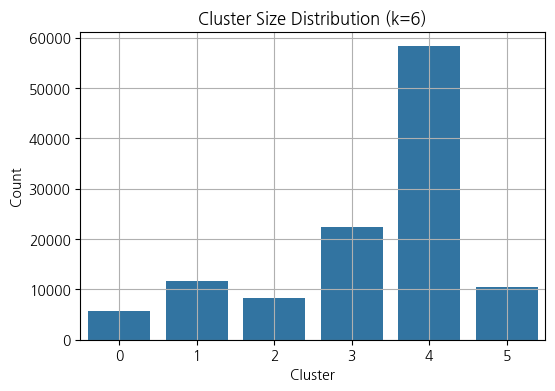

üìå Íµ∞ÏßëÎ≥Ñ ÌÜµÍ≥Ñ ÏöîÏïΩ:


avg_duration_sec                                                 \
                   count    mean      std   min     25%     50%     75%   
cluster                                                                   
0                 5767.0  395.37  1374.07  1.00   62.00  147.25  358.50   
1                11691.0  462.26  1318.14  1.00   82.00  180.12  375.17   
2                 8341.0  404.36   631.77  1.86  113.96  238.05  439.47   
3                22340.0  316.47  1653.03  1.00   32.00   85.50  234.50   
4                58292.0  223.36  1794.35  1.00    7.00   32.00  123.00   
5                10381.0  374.21  1542.29  1.00   48.00  117.00  304.00   

                  session_count                                               
              max         count   mean    std   min   25%   50%   75%    max  
cluster                                                                       
0        25255.75        5767.0   4.00   0.00   4.0   4.0   4.0   4.0    4.0  
1        30533.40       11691.0   6.78   1.69   5.0   5.0   6.0   8.0   15.0  
2        12359.00        8341.0  29.88  26.52  11.0  14.0  21.0  35.0  283.0  
3        46499.00       22340.0   2.00   0.00   2.0   2.0   2.0   2.0    2.0  
4        73566.00       58292.0   1.00   0.00   1.0   1.0   1.0   1.0    1.0  
5        28987.33       10381.0   3.00   0.00   3.0   3.0   3.0   3.0    3.0

In [58]:
plot_gmm_cluster_summary(rs_scaled_log_df, range(3, 7), session_cnt_duration_df)


- k = 3ÏùÄ session_countÏóêÏÑú 1, 2~5, 5~283 ÏúºÎ°ú Íµ¨Í∞ÑÏù¥ ÎÑàÎ¨¥ ÌÅº
- k = 5,6ÏùÄ ÏùòÎØ∏ÏóÜÏù¥ ÎÑàÎ¨¥ ÎÇòÎâòÏñ¥ÏßÄÎäî ÎäêÎÇå! (Í≤åÎã§Í∞Ä k = 5Îäî Ï†úÎåÄÎ°ú 5Í∞úÎ°ú ÎÇòÎàÑÏñ¥ÏßÄÏßÄÎèÑ ÏïäÏùå)
- Îî∞ÎùºÏÑú, k = 4 Ï±ÑÌÉù

user_id  avg_duration_sec  session_count  \
0       02QVyNBCraNN7i04MPRQVrGbGPR2               4.0              1   
1       03dEZCajSgbBSj7wPNeXjBp8QnI2               2.2              5   
2       07JXIRPEnuSSpzQ5cKYrvwrMq3I3               1.0              1   
3       08g6HjWIPUZttChnM4McJAlbgyl1             174.0              1   
4       08tcnzqYmaZ81F7s29QPu5PUrP13               4.0              1   
...                              ...               ...            ...   
116807  zkGvpRUY1sRXZXNW3QfF8b9M6U93             227.0              1   
116808  zlRu2eL7juSaImYcPIQiN0U4RSg2               1.0              1   
116809  zpax5JqWpSW5WNHCMbediX7KfxZ2               2.0              1   
116810  zrbn6Jt89dPg02zWzvUkpvYAoDD3               2.0              1   
116811  zsalFOpLioX5cdt1rQrLpvTZyIB2               1.0              1   

        gmm_4_label  
0                 0  
1                 1  
2                 0  
3                 0  
4                 0  
...             ...  
116807            0  
116808            0  
116809            0  
116810            0  
116811            0  

[116812 rows x 4 columns]

count
gmm_4_label       
0            58292
1            24517
2            22340
3            11663

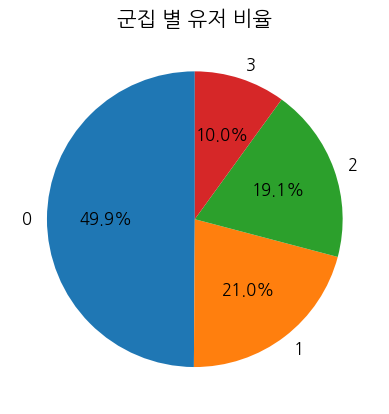

In [59]:
# Íµ∞Ïßë 4Í∞ú 
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(rs_scaled_log_df)
session_cnt_duration_df['gmm_4_label'] = gmm_labels

# ÌôïÏù∏
display(session_cnt_duration_df)

# Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Í≥†Í∞ù Î∂ÑÌè¨
gmm_4_cluster_df = session_cnt_duration_df['gmm_4_label'].value_counts().to_frame()
display(gmm_4_cluster_df)

# ÏãúÍ∞ÅÌôî
plt.pie(data = gmm_4_cluster_df, labels = gmm_4_cluster_df.index, x = 'count', autopct='%1.1f%%', startangle = 90, textprops = {'size': 12})
plt.title('Íµ∞Ïßë Î≥Ñ Ïú†Ï†Ä ÎπÑÏú®', fontsize = 15)
plt.show()

In [68]:
session_cnt_duration_df.drop(columns = 'user_id').groupby('gmm_4_label').mean().round(2)

avg_duration_sec  session_count
gmm_4_label                                 
0                      223.36           1.00
1                      424.58           4.22
2                      316.47           2.00
3                      388.60          23.94

- üéà ÌÅ¥Îü¨Ïä§ÌÑ∞ 0 (49.9%) : Ïù¥ÌÉà Ïú†Ï†Ä
    - ÌèâÍ∑† Ï≤¥Î•ò ÏãúÍ∞Ñ : 223Ï¥à (3Î∂Ñ 43Ï¥à)
    - ÌèâÍ∑† ÏÑ∏ÏÖò Ïåç Í∞úÏàò : 1Í∞ú
    -> 1Î≤àÎßå ÏÇ¨Ïö©ÌïòÍ≥† Îñ†ÎÇú Ïú†Ï†Ä

- üå± ÌÅ¥Îü¨Ïä§ÌÑ∞ 1 (21%) : Ïû†Ïû¨ ÌïµÏã¨ Ïú†Ï†Ä
    - ÌèâÍ∑† Ï≤¥Î•ò ÏãúÍ∞Ñ : 425Ï¥à (7Î∂Ñ 5Ï¥à)
    - ÌèâÍ∑† ÏÑ∏ÏÖò Ïåç Í∞úÏàò : 4Í∞ú
    -> Ï≤¥Î•ò ÏãúÍ∞Ñ Í∏∏Í≥†, Ïû¨Î∞©Î¨∏ÎèÑ ÏûàÏùå

- ‚ö†Ô∏è ÌÅ¥Îü¨Ïä§ÌÑ∞ 2 (19.1%) :Îã®Î∞úÏÑ± ÏÇ¨Ïö© Ïú†Ï†Ä
    - ÌèâÍ∑† Ï≤¥Î•ò ÏãúÍ∞Ñ : 316Ï¥à (5Î∂Ñ 16Ï¥à)
    - ÌèâÍ∑† ÏÑ∏ÏÖò Ïåç Í∞úÏàò : 2Í∞ú
    -> ÌïúÎëêÎ≤à Ï†ïÎèÑÎßå ÏÇ¨Ïö©ÌïòÍ≥† ÏïàÏò¥

- üëë ÌÅ¥Îü¨Ïä§ÌÑ∞ 3 (10%) : ÌïµÏã¨ Ï∂©ÏÑ± Ïú†Ï†Ä
    - ÌèâÍ∑† Ï≤¥Î•ò ÏãúÍ∞Ñ : 389Ï¥à (6Î∂Ñ 29Ï¥à)
    - ÌèâÍ∑† ÏÑ∏ÏÖò Ïåç Í∞úÏàò : 24Í∞ú
    -> ÏïïÎèÑÏ†Å Ïû¨Î∞©Î¨∏ ÌöüÏàò, Ï∂©ÏÑ± Í≥†Í∞ù 

---
ÌÅ¥Îü¨Ïä§ÌÑ∞ 0, 2: Ïù¥ÌÉà Í∞ÄÎä•ÏÑ± ÎÜíÏùå ‚Üí Ïò®Î≥¥Îî©/Î¶¨ÌÖêÏÖò Í∞úÏÑ† ÎåÄÏÉÅ     
ÌÅ¥Îü¨Ïä§ÌÑ∞ 1: Ï†ÑÌôò Ïó¨ÏßÄ ÏûàÏùå ‚Üí Ï∂©ÏÑ± Í≥†Í∞ùÏúºÎ°ú Ïú°ÏÑ± ÌÉÄÍ≤ü     
ÌÅ¥Îü¨Ïä§ÌÑ∞ 3: ÌïµÏã¨ Ïú†Ï†Ä ‚Üí Ïö∞ÎåÄ ÌòúÌÉù Î∞è Ï∂îÏ≤ú Ïú†ÎèÑ ÎåÄÏÉÅ


## Í∞ÄÏÑ§ Í≤ÄÏ†ï

In [78]:
session_cnt_duration_df['user_id'].nunique(), session_cnt_duration_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116812 entries, 0 to 116811
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           116812 non-null  object 
 1   avg_duration_sec  116812 non-null  float64
 2   session_count     116812 non-null  int64  
 3   gmm_4_label       116812 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.6+ MB


(116812, None)

In [79]:
cleaned_df['user_id'].nunique(), cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 485633 entries, 4 to 1023818
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   user_id               485633 non-null  object        
 1   start_time            485633 non-null  datetime64[ns]
 2   end_time              485633 non-null  datetime64[ns]
 3   session_duration_sec  485633 non-null  float64       
 4   session_flag          485633 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 22.2+ MB


(116812, None)

In [83]:
# session_cnt_duration_df ÏôÄ cleaned_df Î≥ëÌï©
session_cluster_df = pd.merge(cleaned_df, session_cnt_duration_df, on = 'user_id', how = 'left')
show_df_info(session_cluster_df,'session_cluster_df')


session_cluster_df ÌòïÌÉú:


(485633, 8)


session_cluster_df Ï≤´ 5Ìñâ:


user_id          start_time            end_time  \
0  02QVyNBCraNN7i04MPRQVrGbGPR2 2023-07-21 08:59:54 2023-07-21 08:59:58   
1  03dEZCajSgbBSj7wPNeXjBp8QnI2 2023-07-18 07:22:11 2023-07-18 07:22:12   
2  03dEZCajSgbBSj7wPNeXjBp8QnI2 2023-07-25 17:01:31 2023-07-25 17:01:32   
3  03dEZCajSgbBSj7wPNeXjBp8QnI2 2023-07-25 21:15:39 2023-07-25 21:15:46   
4  03dEZCajSgbBSj7wPNeXjBp8QnI2 2023-07-27 14:56:15 2023-07-27 14:56:16   

   session_duration_sec session_flag  avg_duration_sec  session_count  \
0                   4.0      matched               4.0              1   
1                   1.0      matched               2.2              5   
2                   1.0      matched               2.2              5   
3                   7.0      matched               2.2              5   
4                   1.0      matched               2.2              5   

   gmm_4_label  
0            0  
1            1  
2            1  
3            1  
4            1


session_cluster_df Ï†ïÎ≥¥:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485633 entries, 0 to 485632
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   user_id               485633 non-null  object        
 1   start_time            485633 non-null  datetime64[ns]
 2   end_time              485633 non-null  datetime64[ns]
 3   session_duration_sec  485633 non-null  float64       
 4   session_flag          485633 non-null  object        
 5   avg_duration_sec      485633 non-null  float64       
 6   session_count         485633 non-null  int64         
 7   gmm_4_label           485633 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(2)
memory usage: 29.6+ MB

session_cluster_df ÌÜµÍ≥Ñ ÏöîÏïΩ:


start_time                       end_time  \
count                         485633                         485633   
mean   2023-07-28 00:59:54.254381312  2023-07-28 01:07:06.186667520   
min              2023-07-18 00:00:03            2023-07-18 00:00:09   
25%              2023-07-21 19:40:53            2023-07-21 19:46:17   
50%              2023-07-27 00:55:29            2023-07-27 01:02:19   
75%              2023-08-02 21:56:39            2023-08-02 22:03:14   
max              2023-08-10 23:58:48            2023-08-10 23:59:34   
std                              NaN                            NaN   

       session_duration_sec  avg_duration_sec  session_count    gmm_4_label  
count         485633.000000     485633.000000  485633.000000  485633.000000  
mean             431.932286        431.932286      29.276826       2.121703  
min                1.000000          1.000000       1.000000       0.000000  
25%               10.000000         74.000000       3.000000       1.000000  
50%               53.000000        207.142857      11.000000       3.000000  
75%              193.000000        457.878049      38.000000       3.000000  
max            74415.000000      73566.000000     283.000000       3.000000  
std             2494.476092       1177.008955      41.708731       1.119503


session_cluster_df ÌÜµÍ≥Ñ ÏöîÏïΩ:


user_id session_flag
count    485633       485633
unique   116812            1
top     1253311      matched
freq        283       485633


session_cluster_df Í≤∞Ï∏°Ïπò ÌôïÏù∏:


user_id                 0
start_time              0
end_time                0
session_duration_sec    0
session_flag            0
avg_duration_sec        0
session_count           0
gmm_4_label             0
dtype: int64

In [84]:
# ÏãúÍ∞ÑÎåÄ Ïª¨Îüº Ï∂îÍ∞Ä 
session_cluster_df['start_hour'] = session_cluster_df['start_time'].dt.hour

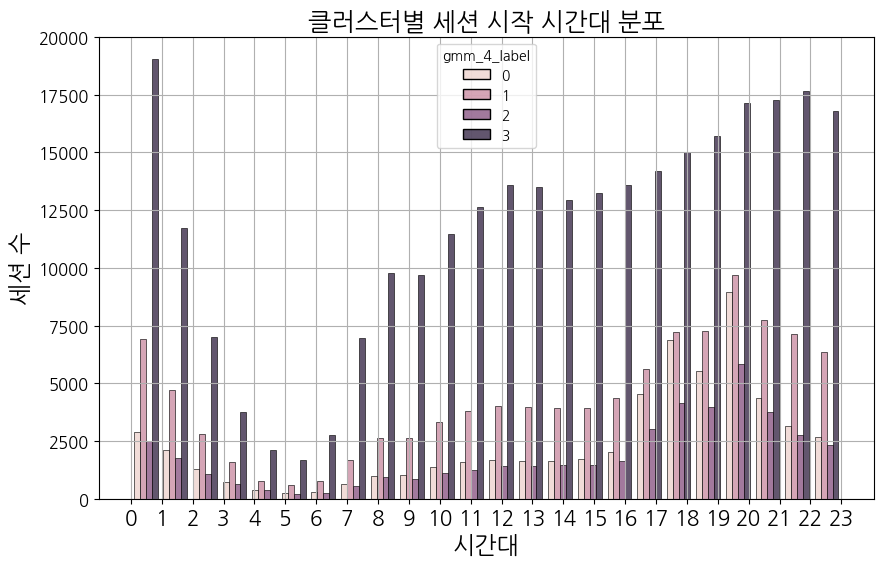

In [115]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ session_start_time Î∂ÑÌè¨ 
plt.figure(figsize=(10, 6))
sns.histplot(data=session_cluster_df, x='start_hour', hue='gmm_4_label', bins=24, multiple='dodge', shrink=0.8)
plt.title('ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÑ∏ÏÖò ÏãúÏûë ÏãúÍ∞ÑÎåÄ Î∂ÑÌè¨', fontsize = 18)
plt.xlabel('ÏãúÍ∞ÑÎåÄ', fontsize = 17)
plt.ylabel('ÏÑ∏ÏÖò Ïàò', fontsize = 17)
plt.xticks(range(0, 24), fontsize = 15)
plt.yticks(fontsize = 12)
plt.grid(True)
plt.show()

In [91]:
# 1. ÏÑ∏ÏÖòÎ≥Ñ ÌôúÎèô ÏãúÍ∞Ñ Î¶¨Ïä§Ìä∏ ÏÉùÏÑ± Ìï®Ïàò
def expand_hours(row):
    start = row['start_time']
    end = row['end_time']

    # ÎãπÏùº ÎÑòÎäî Í≤ΩÏö∞ Î∞©ÏßÄ
    if end < start:
        end += pd.Timedelta(days=1)

    return list(range(start.hour, end.hour + 1))

# 2. Í∞Å ÏÑ∏ÏÖòÎ≥Ñ ÌôúÎèô ÏãúÍ∞ÑÎåÄ Ï∂îÏ∂ú
session_cluster_df['active_hours'] = session_cluster_df.apply(expand_hours, axis=1)

# 3. ÌôúÎèô ÏãúÍ∞ÑÎåÄ Îã®ÏúÑÎ°ú explode (long format)
exploded_df = session_cluster_df.explode('active_hours')


üìå [Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï Í≤∞Í≥º]
Chi2 ÌÜµÍ≥ÑÎüâ: 20428.61
p-value:  0.000000
‚Üí Ïú†ÏùòÏàòÏ§Ä 0.05 ÌïòÏóê Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å: ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌôúÎèô ÏãúÍ∞ÑÎåÄÏóê ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïú Ï∞®Ïù¥Í∞Ä ÏûàÏùå!


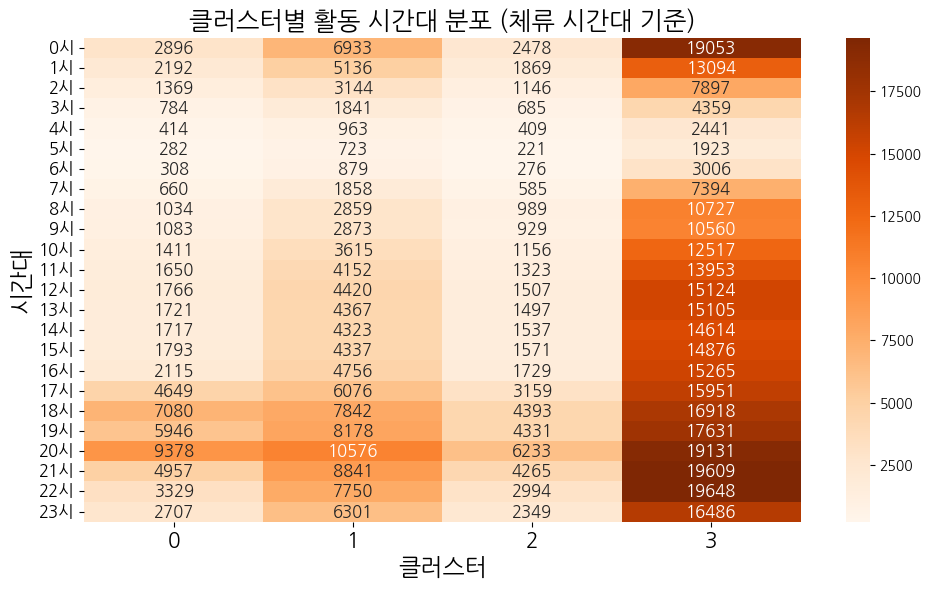

In [114]:
# 4. ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏãúÍ∞ÑÎåÄÎ≥Ñ ÎπàÎèÑÌëú ÏÉùÏÑ±
hourly_cluster_table = pd.crosstab(exploded_df['active_hours'], exploded_df['gmm_4_label'])

# 5. Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï ÏàòÌñâ
chi2, p, dof, expected = chi2_contingency(hourly_cluster_table)

print(f"\nüìå [Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï Í≤∞Í≥º]")
print(f"Chi2 ÌÜµÍ≥ÑÎüâ: {chi2:.2f}")
print(f"p-value: {p: .6f}")
if p < 0.05:
    print("‚Üí Ïú†ÏùòÏàòÏ§Ä 0.05 ÌïòÏóê Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å: ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌôúÎèô ÏãúÍ∞ÑÎåÄÏóê ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïú Ï∞®Ïù¥Í∞Ä ÏûàÏùå!")
else:
    print("‚Üí Ïú†ÏùòÏàòÏ§Ä 0.05 ÌïòÏóê Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù: ÌôúÎèô ÏãúÍ∞ÑÎåÄ Î∂ÑÌè¨ Ï∞®Ïù¥Í∞Ä Ïú†ÏùòÌïòÏßÄ ÏïäÏùå.")

# 6. ÏãúÍ∞ÅÌôî: heatmapÏúºÎ°ú ÌôúÎèô ÏãúÍ∞Ñ Î∂ÑÌè¨ Î≥¥Í∏∞
plt.figure(figsize=(10, 6))
sns.heatmap(hourly_cluster_table, cmap='Oranges', annot=True, annot_kws = {'size': 12}, fmt='d', )
plt.title("ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌôúÎèô ÏãúÍ∞ÑÎåÄ Î∂ÑÌè¨ (Ï≤¥Î•ò ÏãúÍ∞ÑÎåÄ Í∏∞Ï§Ä)", fontsize = 18)
plt.xlabel("ÌÅ¥Îü¨Ïä§ÌÑ∞", fontsize = 17)
plt.ylabel("ÏãúÍ∞ÑÎåÄ", fontsize = 17)
plt.yticks(np.arange(0.5, 24.5), labels=[f"{i}Ïãú" for i in range(24)], rotation=0, fontsize = 12)
plt.xticks(rotation=0, fontsize = 15)
plt.tight_layout()
plt.show()

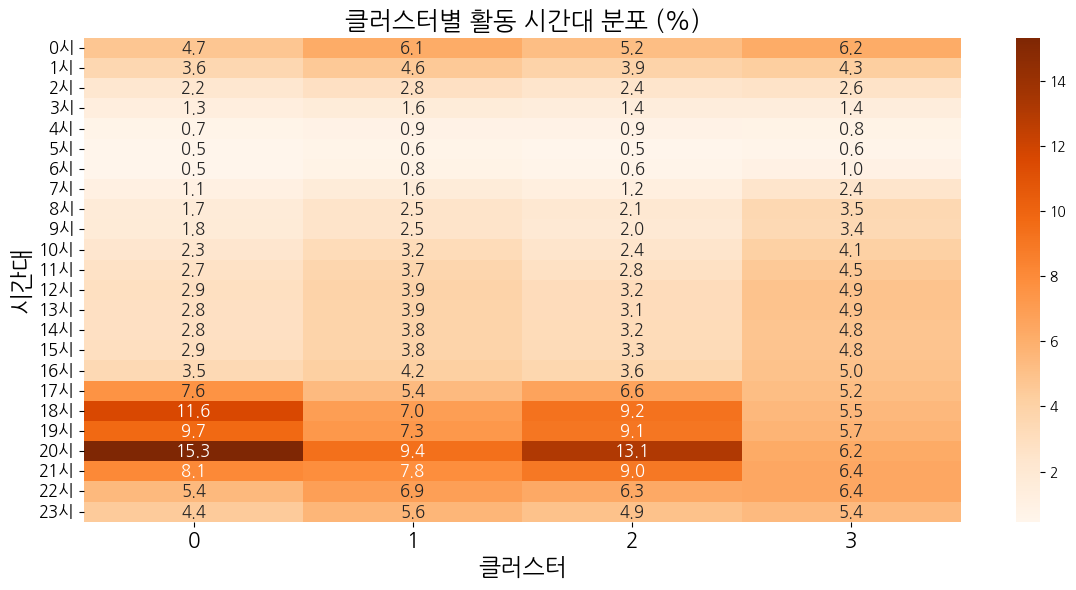

In [116]:
# ÎπÑÏú® Í≥ÑÏÇ∞: Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞ ÎÇ¥ÏóêÏÑúÏùò ÏãúÍ∞ÑÎåÄ Î∂ÑÌè¨ (column-wise)
hourly_cluster_ratio = hourly_cluster_table.div(hourly_cluster_table.sum(axis=0), axis=1) * 100

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
sns.heatmap(hourly_cluster_ratio, cmap='Oranges', annot=True, fmt=".1f", annot_kws={'size': 12})
plt.title("ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌôúÎèô ÏãúÍ∞ÑÎåÄ Î∂ÑÌè¨ (%)", fontsize=18)
plt.xlabel("ÌÅ¥Îü¨Ïä§ÌÑ∞", fontsize=17)
plt.ylabel("ÏãúÍ∞ÑÎåÄ", fontsize=17)
plt.yticks(np.arange(0.5, 24.5), labels=[f"{i}Ïãú" for i in range(24)], rotation=0, fontsize=12)
plt.xticks(rotation=0, fontsize=15)
plt.tight_layout()
plt.show()